# Collective Quantum Exhaustive Search Experiments
These are defiend by the instructions in an email from 19.5.24 from IA to DM and TM.
These are, or are at least supposed to be, all the experiments that we want to include in the paper.

## Used external notebooks

In [1]:
from ipynb.fs.full.ansatz import get_twolocal

### Imports

In [2]:
from qiskit.quantum_info import SparsePauliOp
import networkx as nx
import random

from hamiltonians import gen_trans_ising_op, get_exact_ground, gen_maxcut_op, gen_maxcut_op_from_graph
from experiment_utils import *

random.seed(5)

# Landscape Calculation Experiments

## Two-qubit experiments
These experiments are run on two hamiltonians: H2 and HeH.

For these, we will present:
-   The energy landscape sampled using all MUB states (without an appended ansatz).

### Hamiltonian Generation

In [3]:
H2_ham_0_75 = SparsePauliOp(data= ['II', 'IZ', 'ZI', 'ZZ', 'XX'],
coeffs= [-1.06324002+0.j,  0.38913654+0.j, -0.38913654+0.j, -0.01121274+0.j,  0.18206025+0.j])

HeH_ham_1 = SparsePauliOp(data= ['II', 'IZ', 'IX', 'ZI', 'XI', 'ZZ', 'ZX', 'XZ', 'XX'],
coeffs= [-3.04506092+0.j,  0.50258052+0.j,  0.11926278+0.j, -0.50258052+0.j, 0.11926278+0.j, -0.13894646+0.j, -0.11926145+0.j,  0.11926145+0.j,  0.11714671+0.j])

molecular_hams_2q = [H2_ham_0_75, HeH_ham_1]
molecular_descs_2q = ["$H_2$, 0.75A, 2 qubits", "HeH, 1A, 2 qubits"]

### Calculate Landscape

===Calculating Molecular Landscapes===
attempting all MUB states over the operator $H_2$, 0.75A, 2 qubits
Energy Landscape:


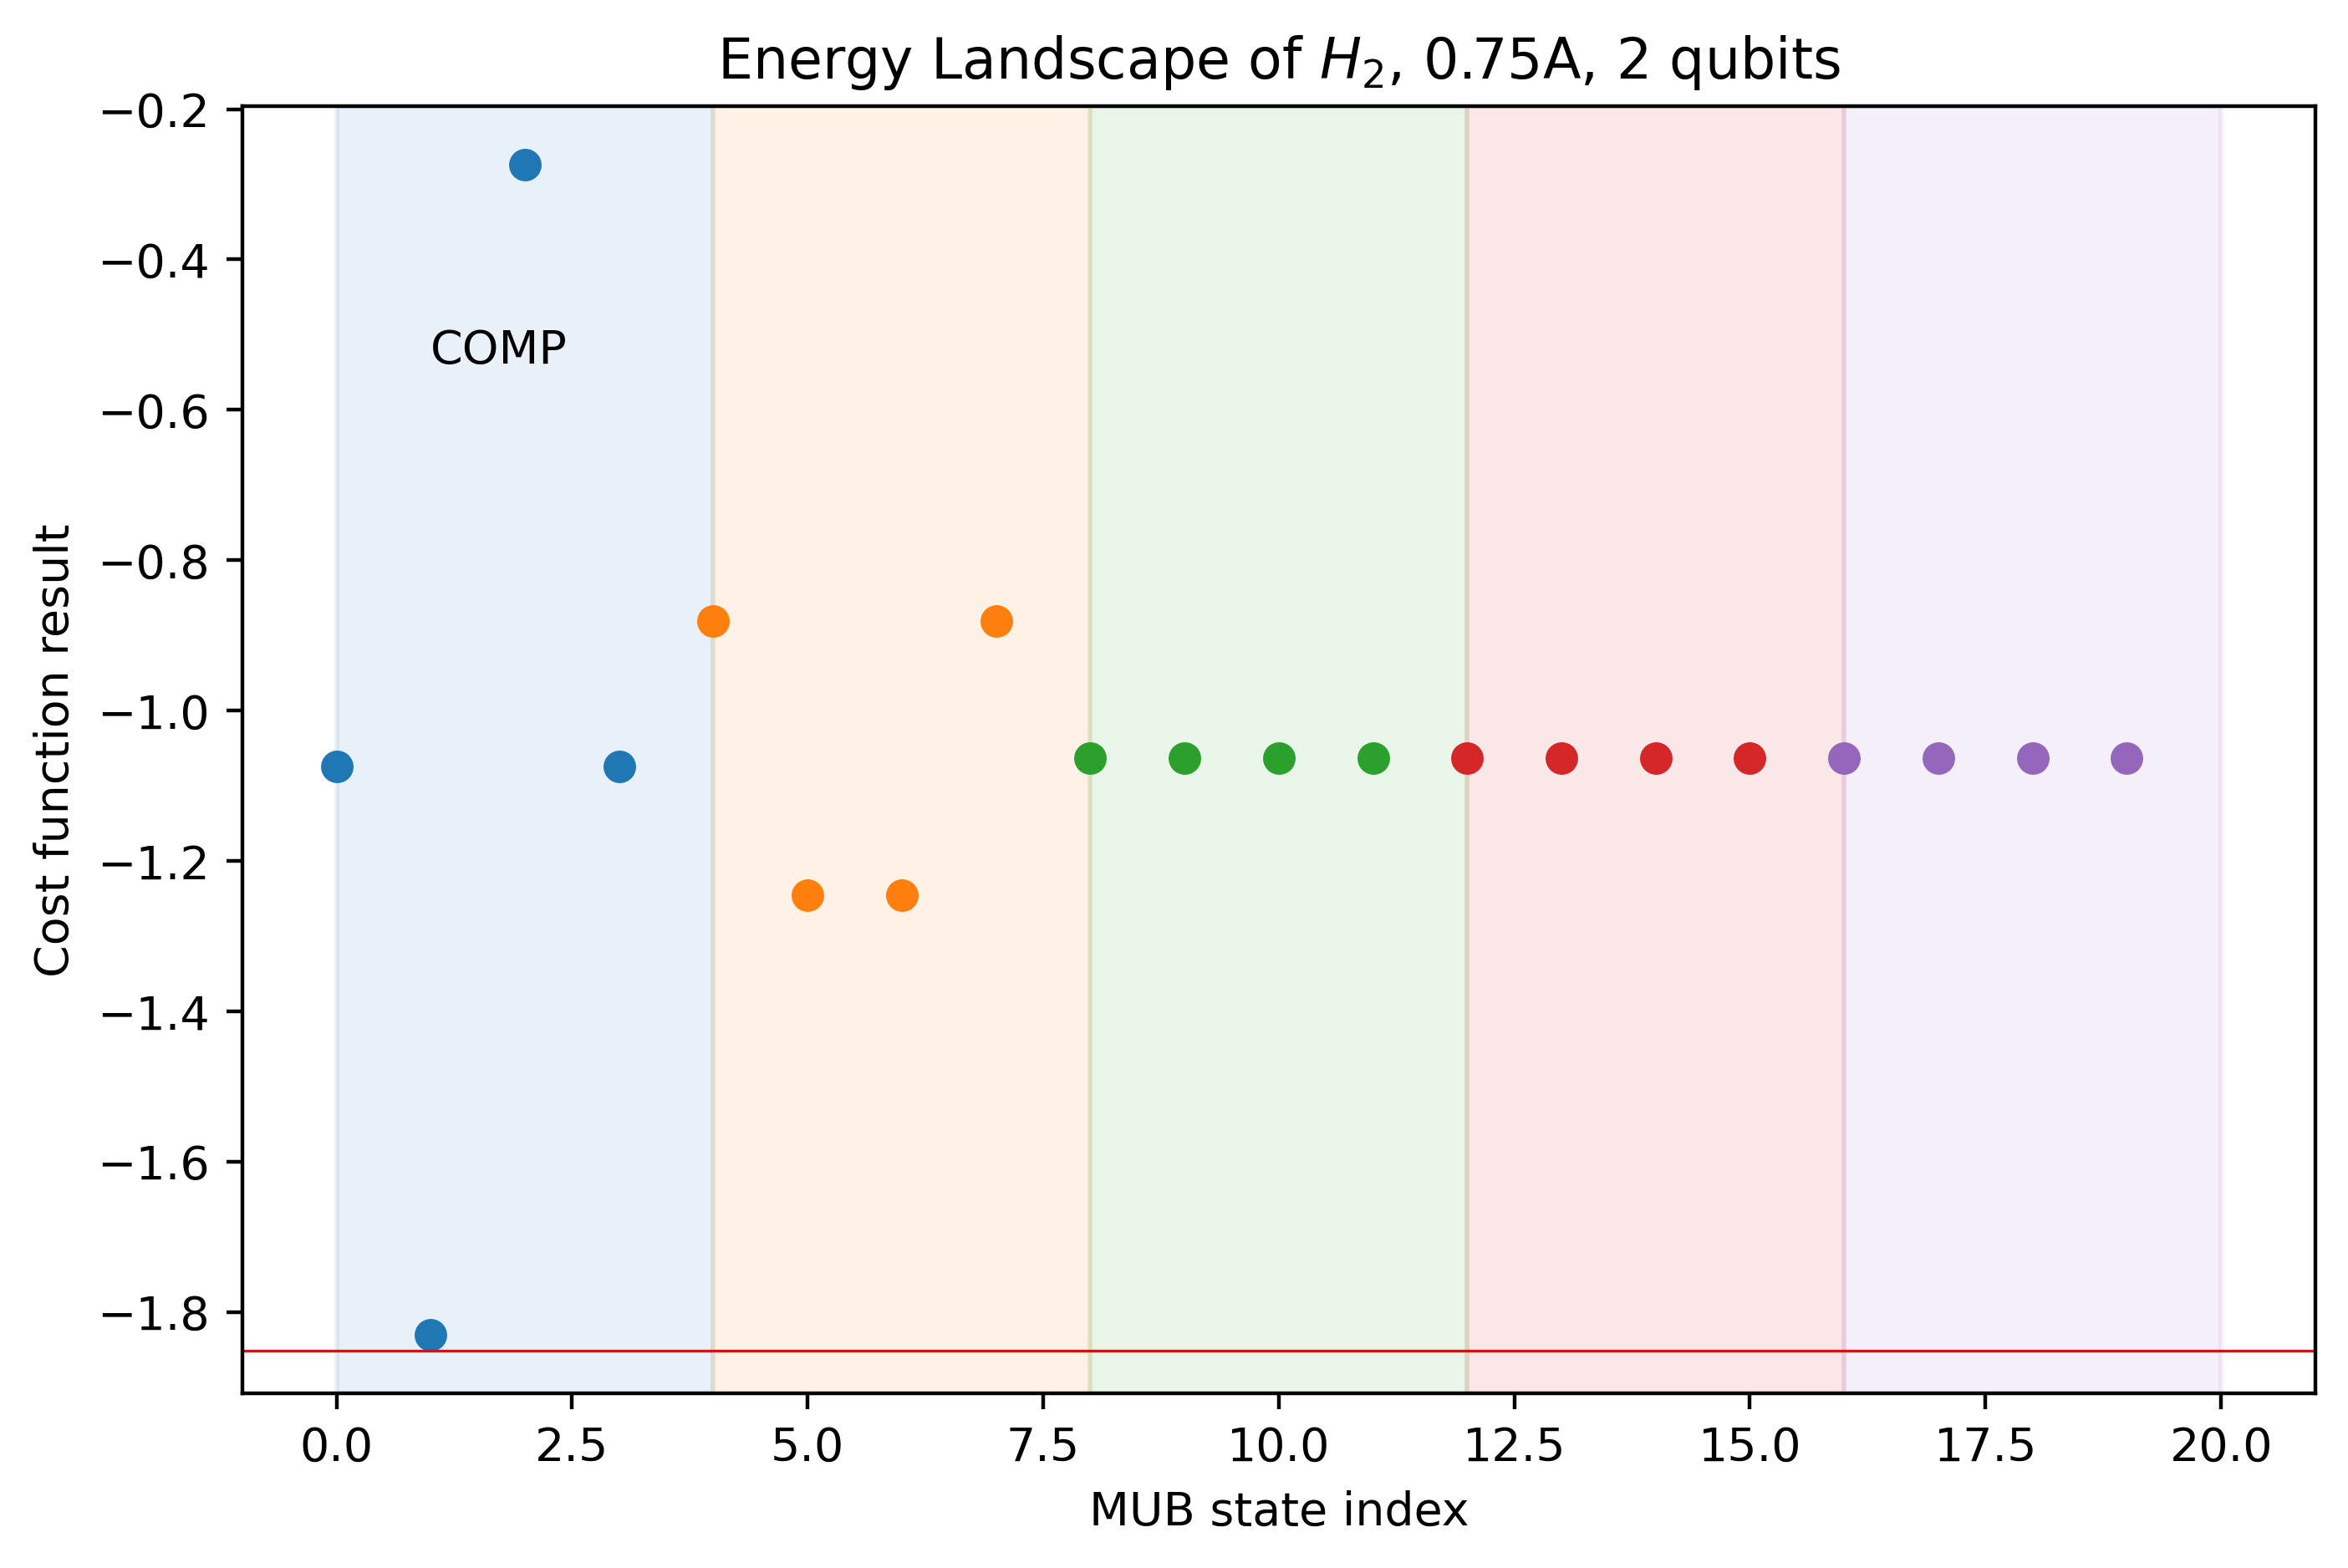

Energy Histogram:


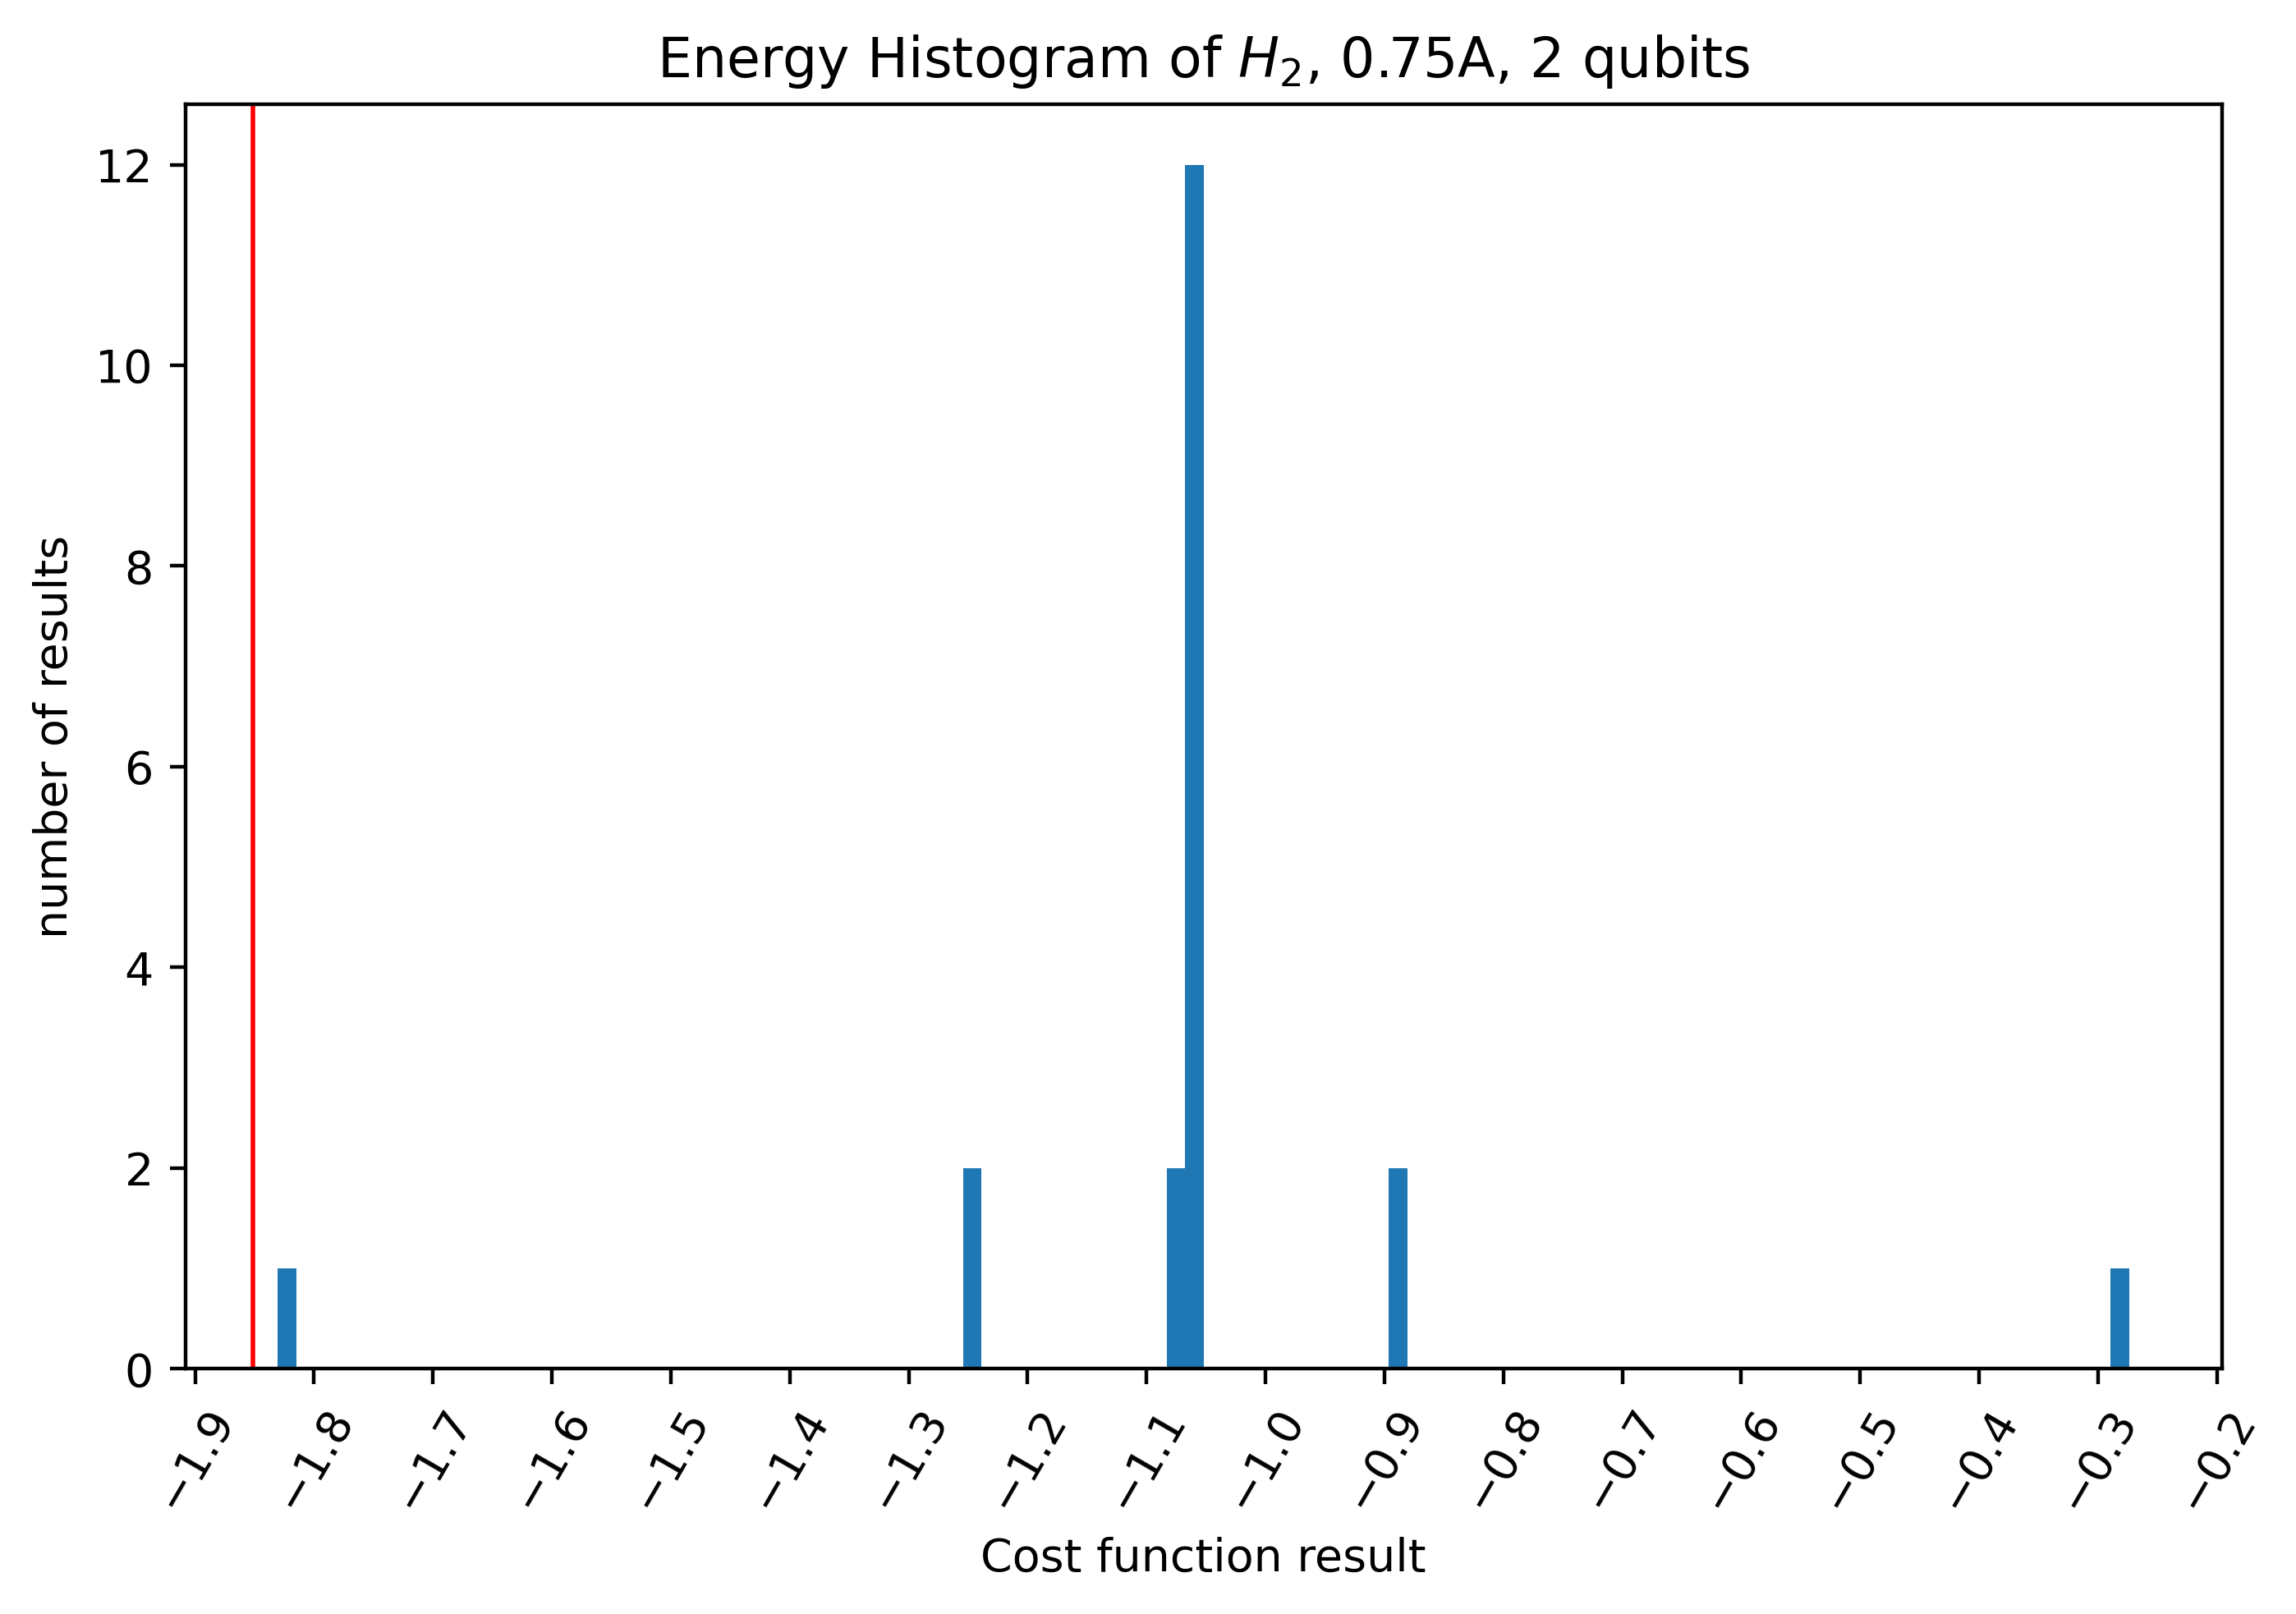

attempting all MUB states over the operator HeH, 1A, 2 qubits
Energy Landscape:


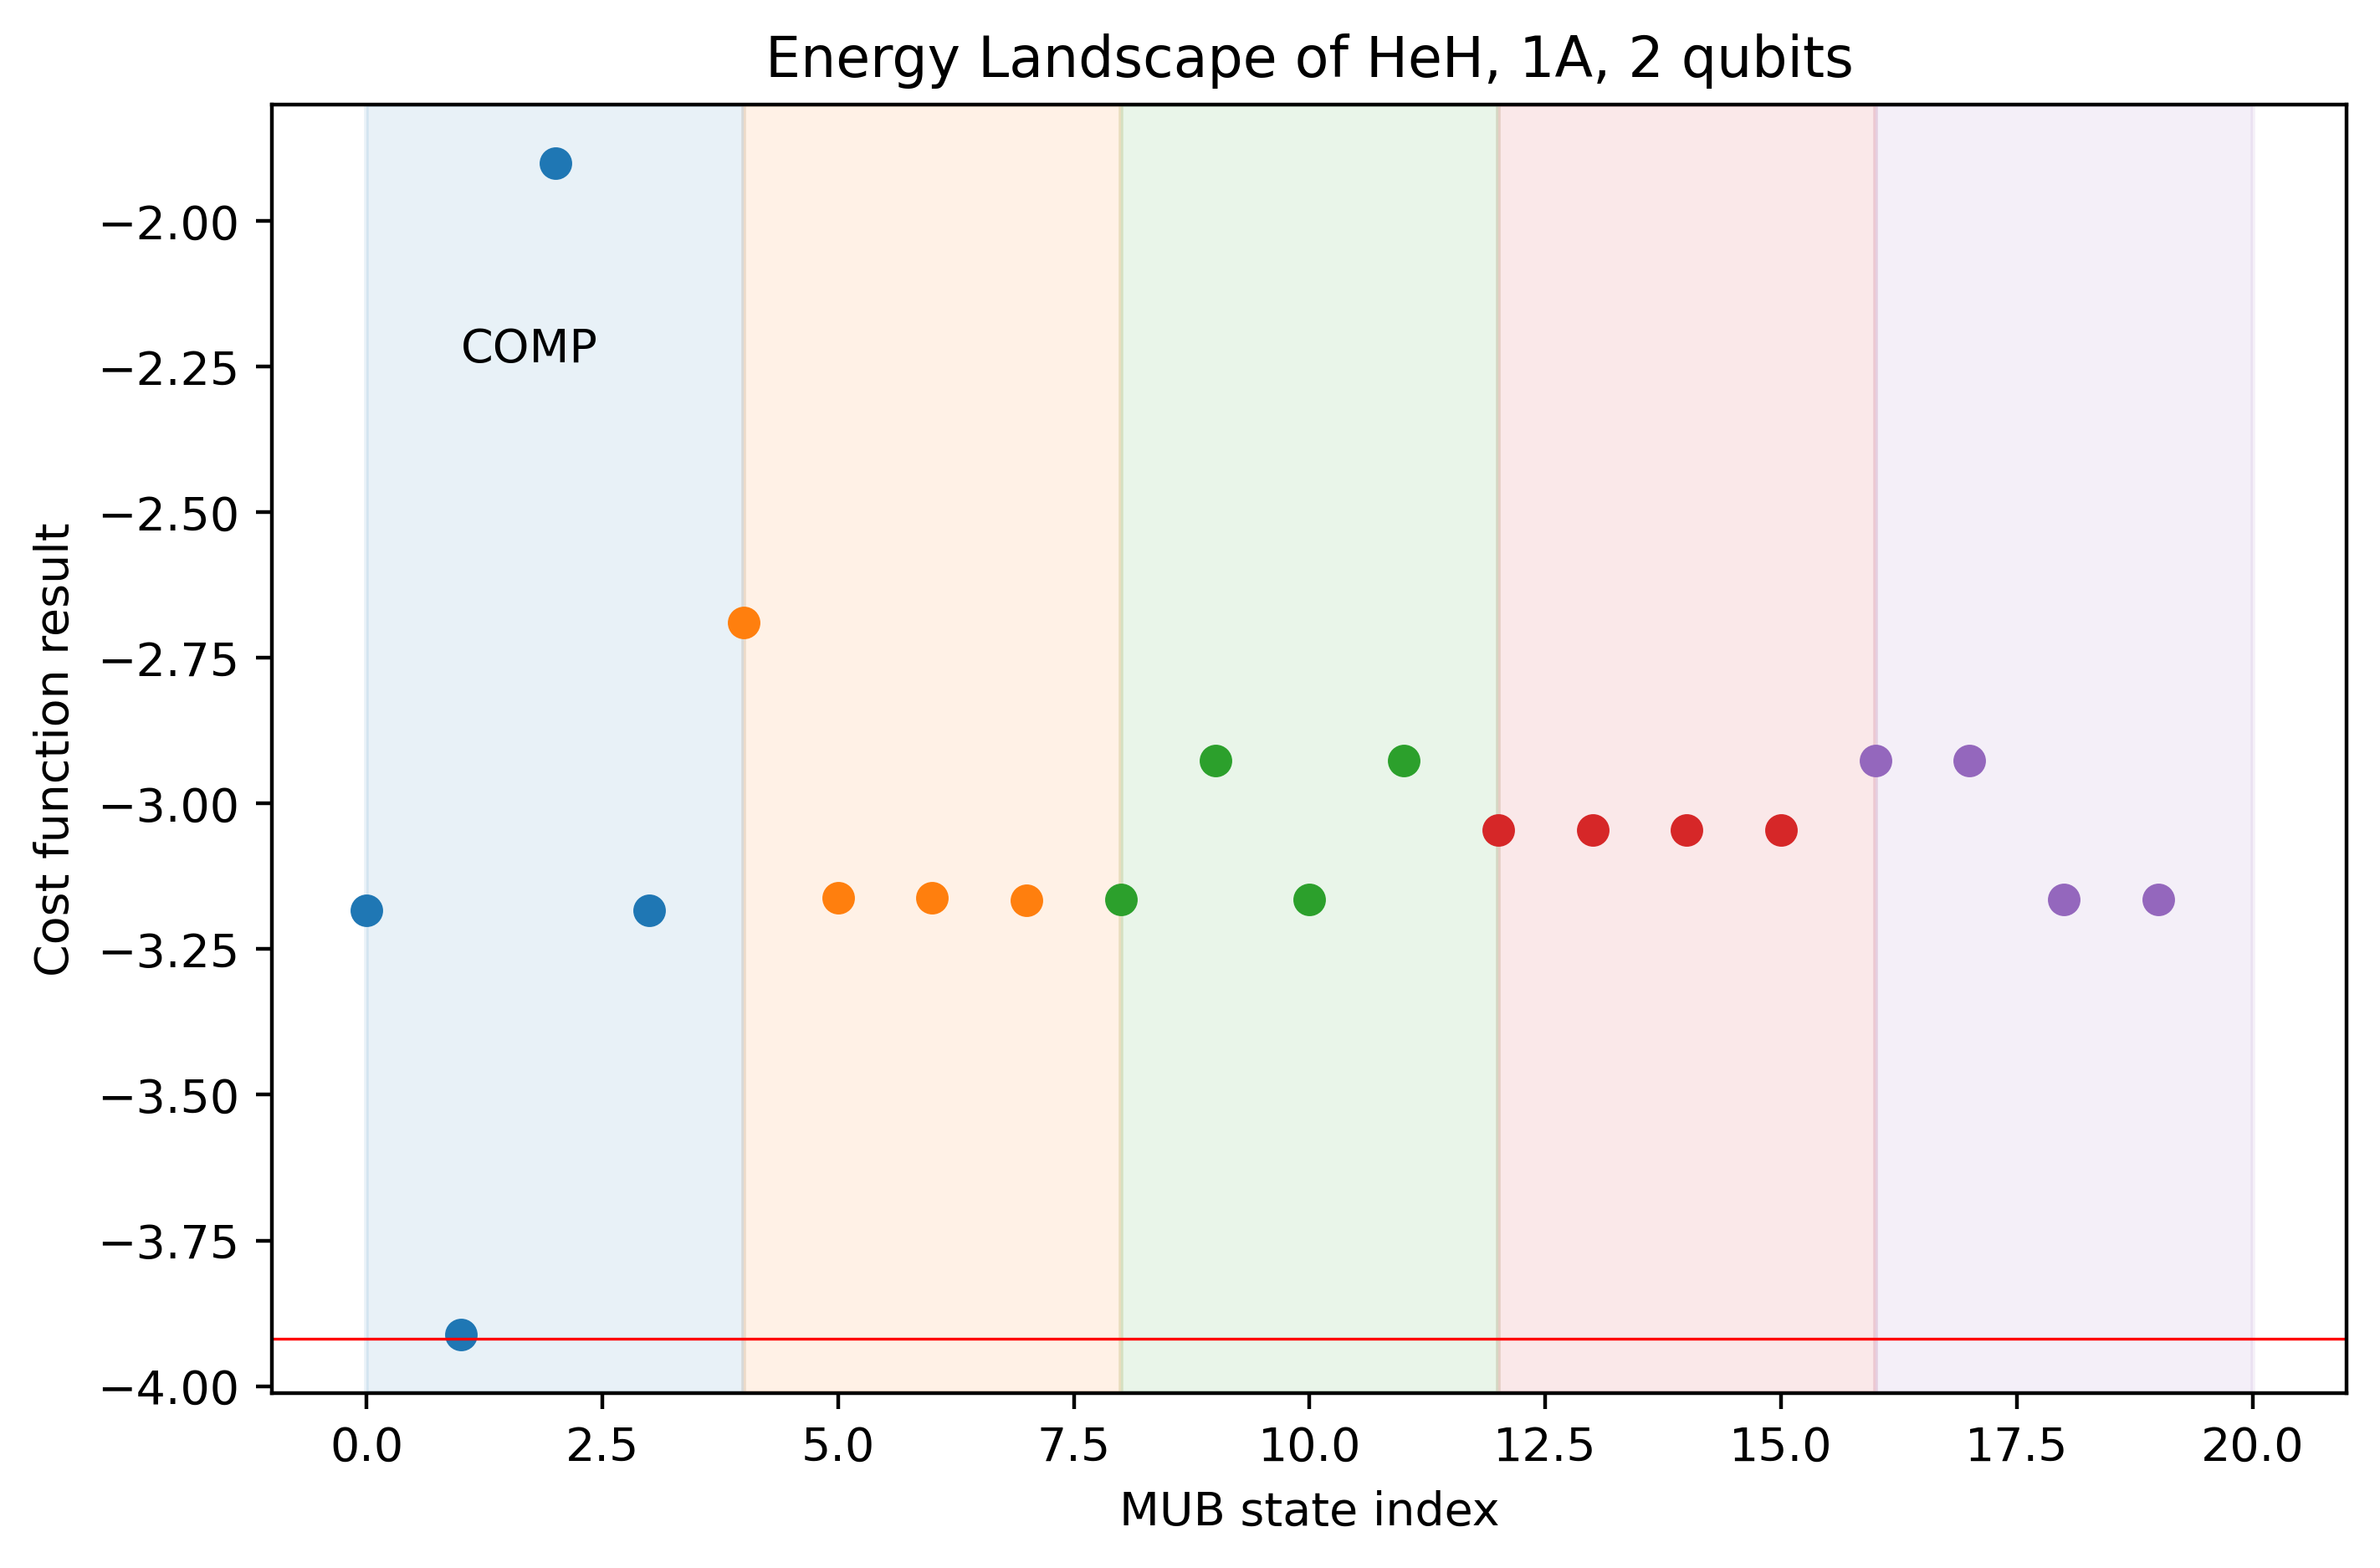

Energy Histogram:


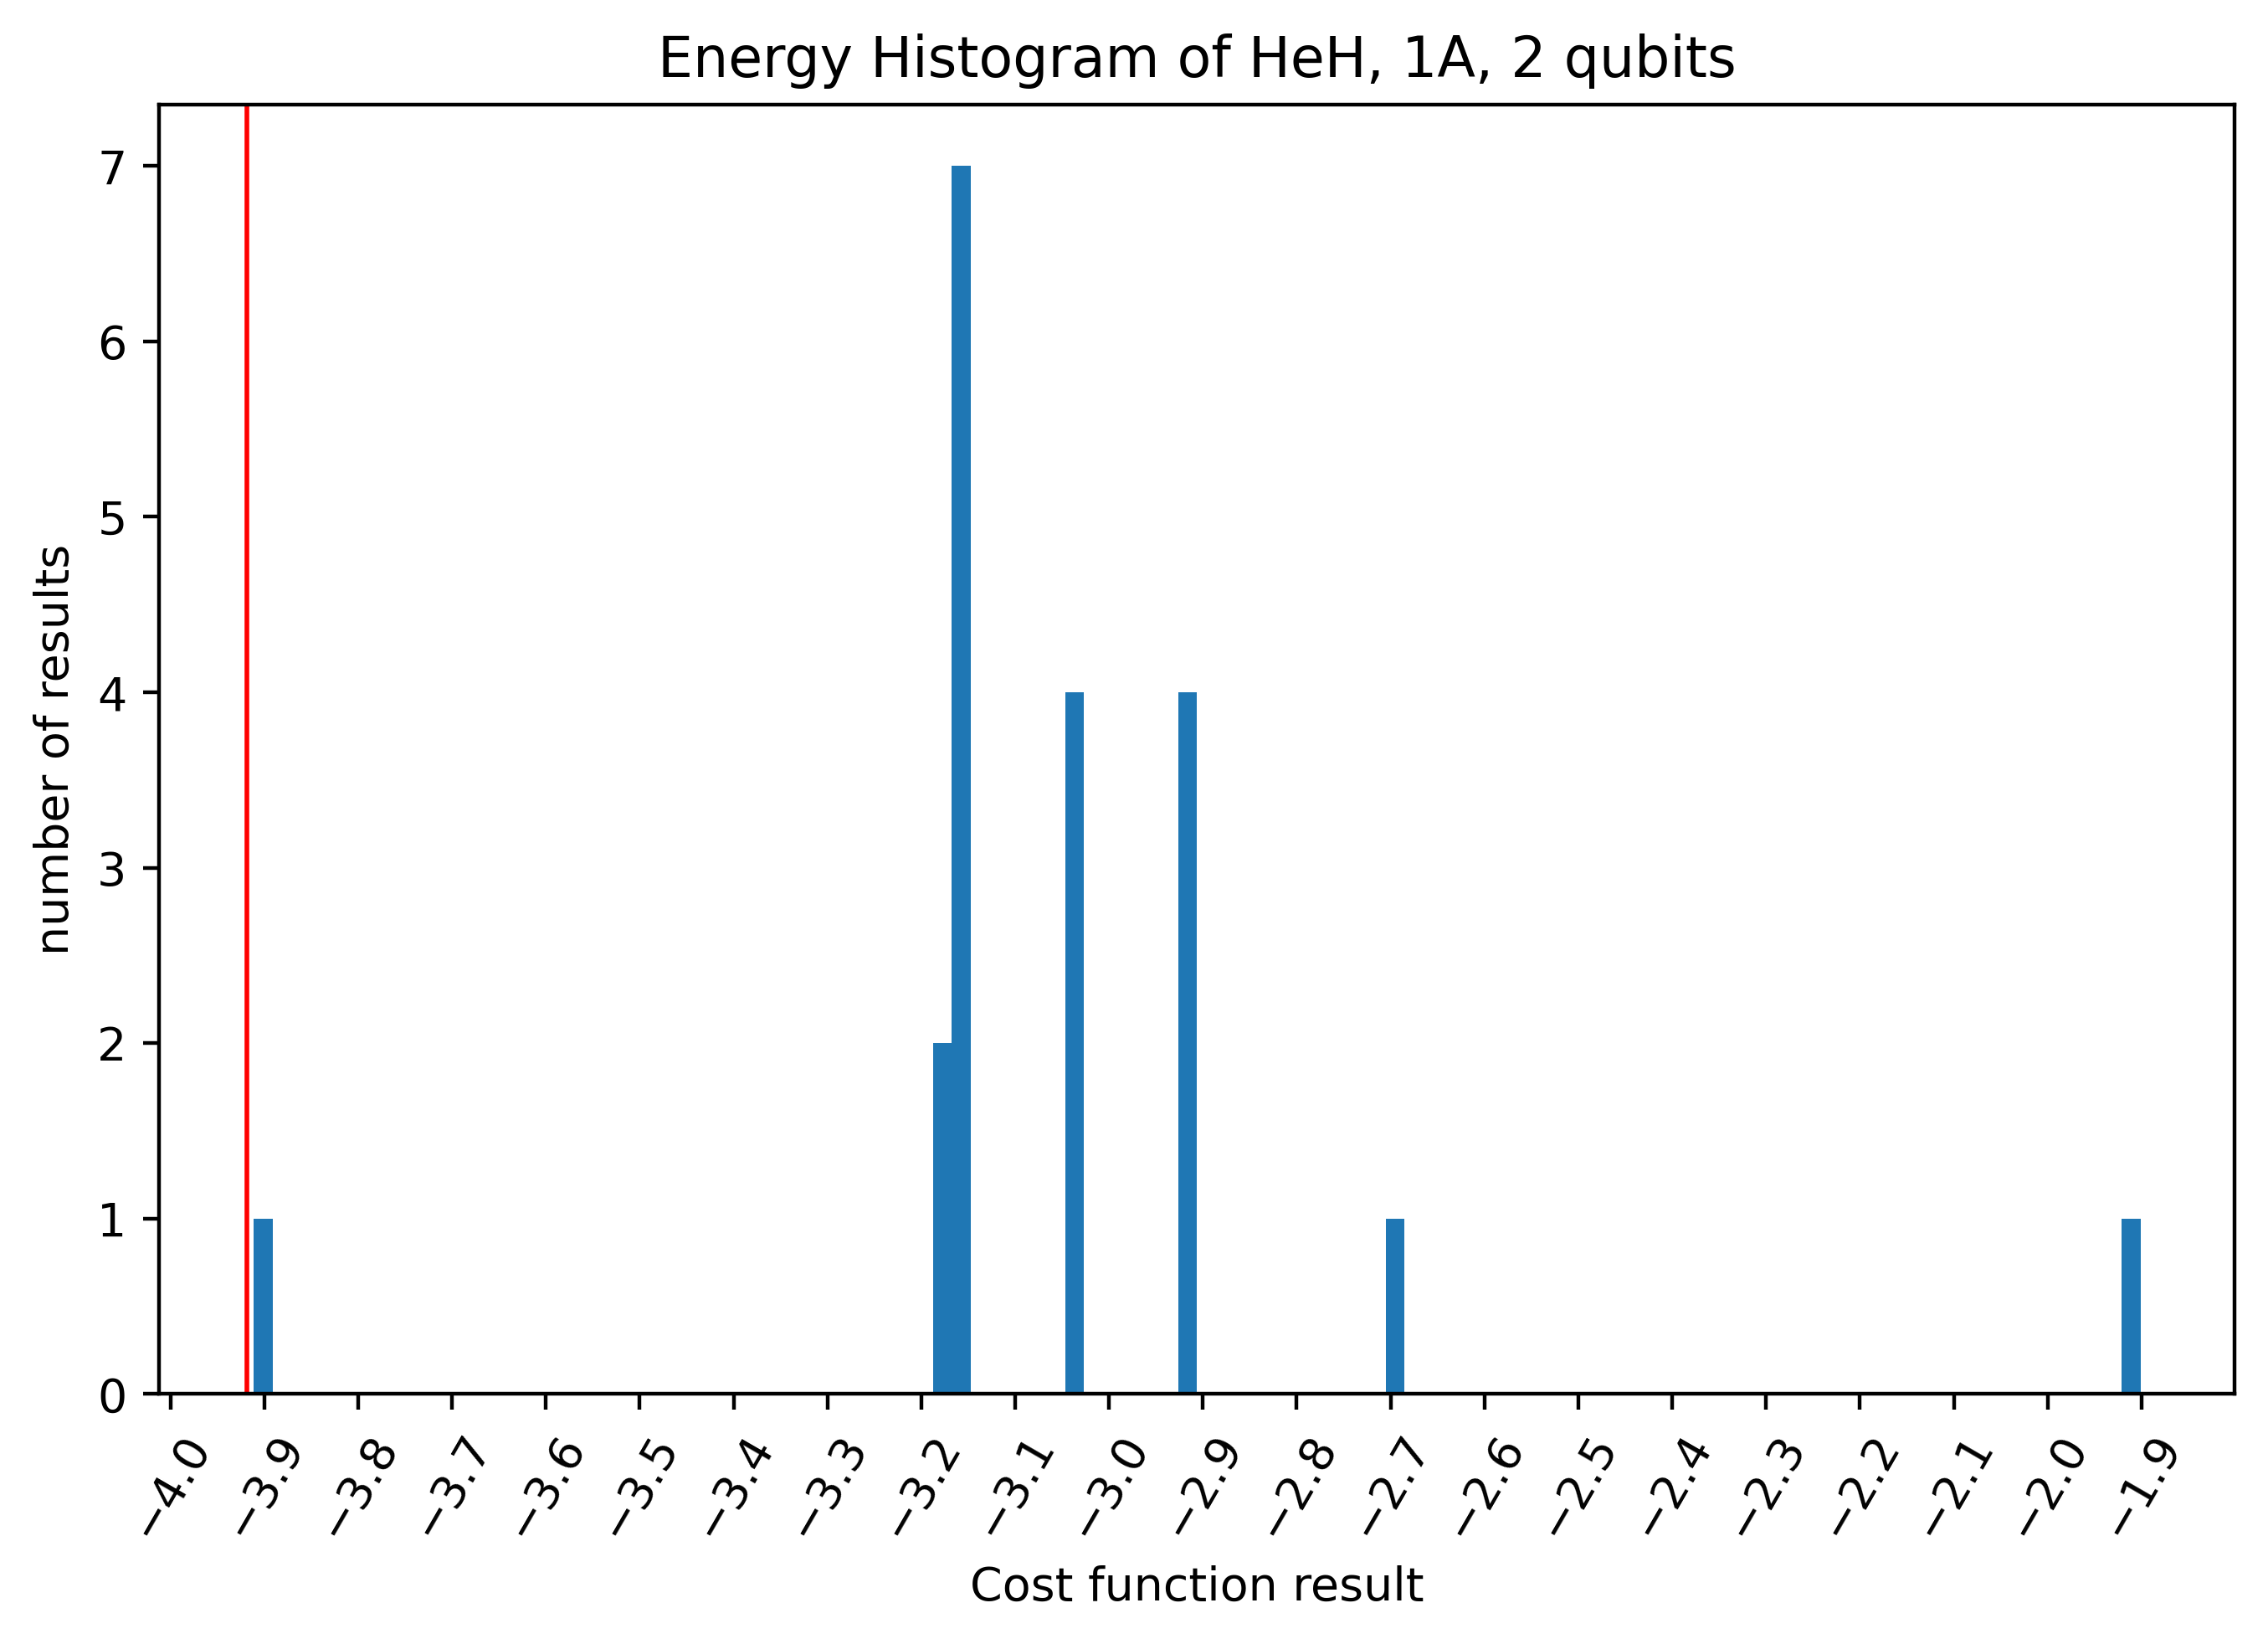

In [4]:
print("===Calculating Molecular Landscapes===")
molecular_landscapes_2q = run_and_record_landscape_list(molecular_hams_2q, n_mub_qubits=2, descs=molecular_descs_2q)

## Three-qubit experiments
These experiments are run on two types of examples:
-   Hamiltonian reductions of MAXCUT problem instances.
-   Transverse-Field Ising Model Hamiltonians.

Since this is landscaping-only, we will *not* use an appended ansatz here.

We will do landscaping only in this part.

### Hamiltonian Generation

In [5]:
n_qubits = 3
n_mub_qubits = 3
edges = [(0,1), (1,2), (2,0)]
maxcut_ham_3q = gen_maxcut_op(n_qubits, edges)
maxcut_ground_energy = get_exact_ground(maxcut_ham_3q)

zz_coeff = random.uniform(0,1)
x_coeff = random.uniform(0,1)
transverse_ham_3q = gen_trans_ising_op(n_qubits, zz_coeff, x_coeff)
transverse_ground_energy = get_exact_ground(transverse_ham_3q)

ansatz_3q = get_twolocal(n_qubits, n_qubits)

### Calculate Landscape

===Calculating Maxcut Landscape===
SparsePauliOp(['IZZ', 'ZIZ', 'ZZI', 'III'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j, -1.5+0.j])
attempting all MUB states over the operator MAX-CUT Hamiltonian, 3 qubits
Energy Landscape:


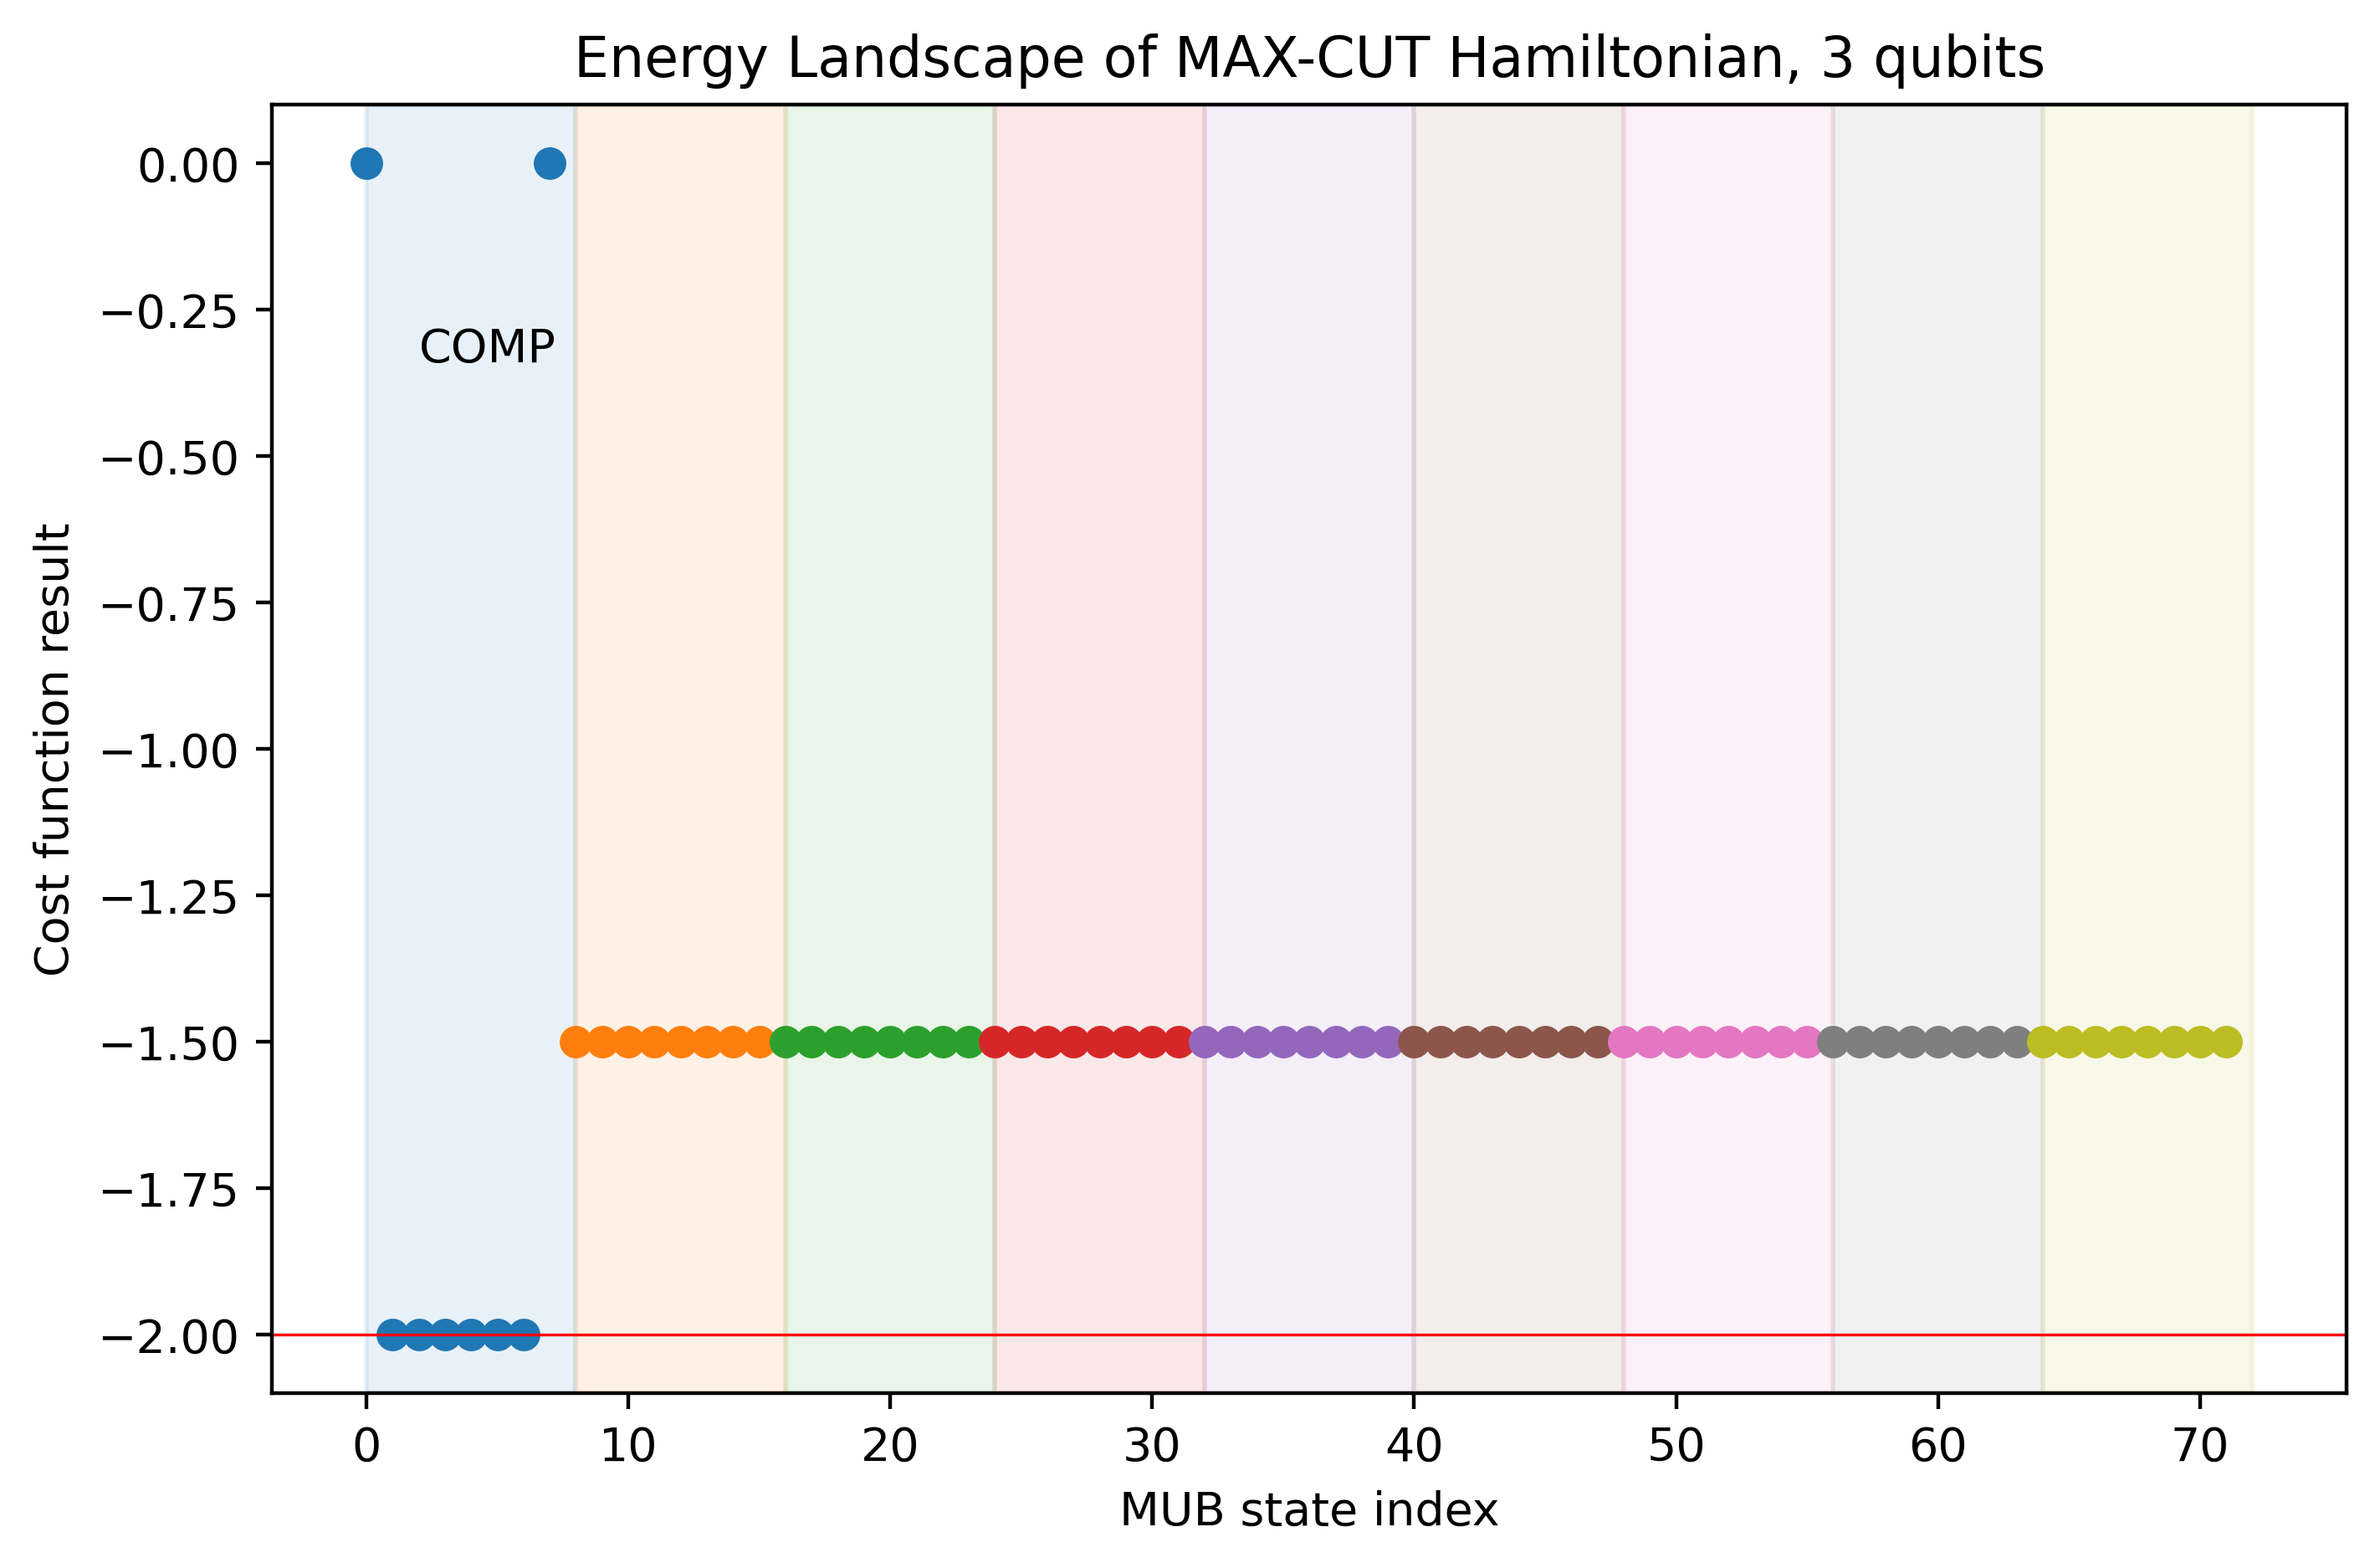

Energy Histogram:


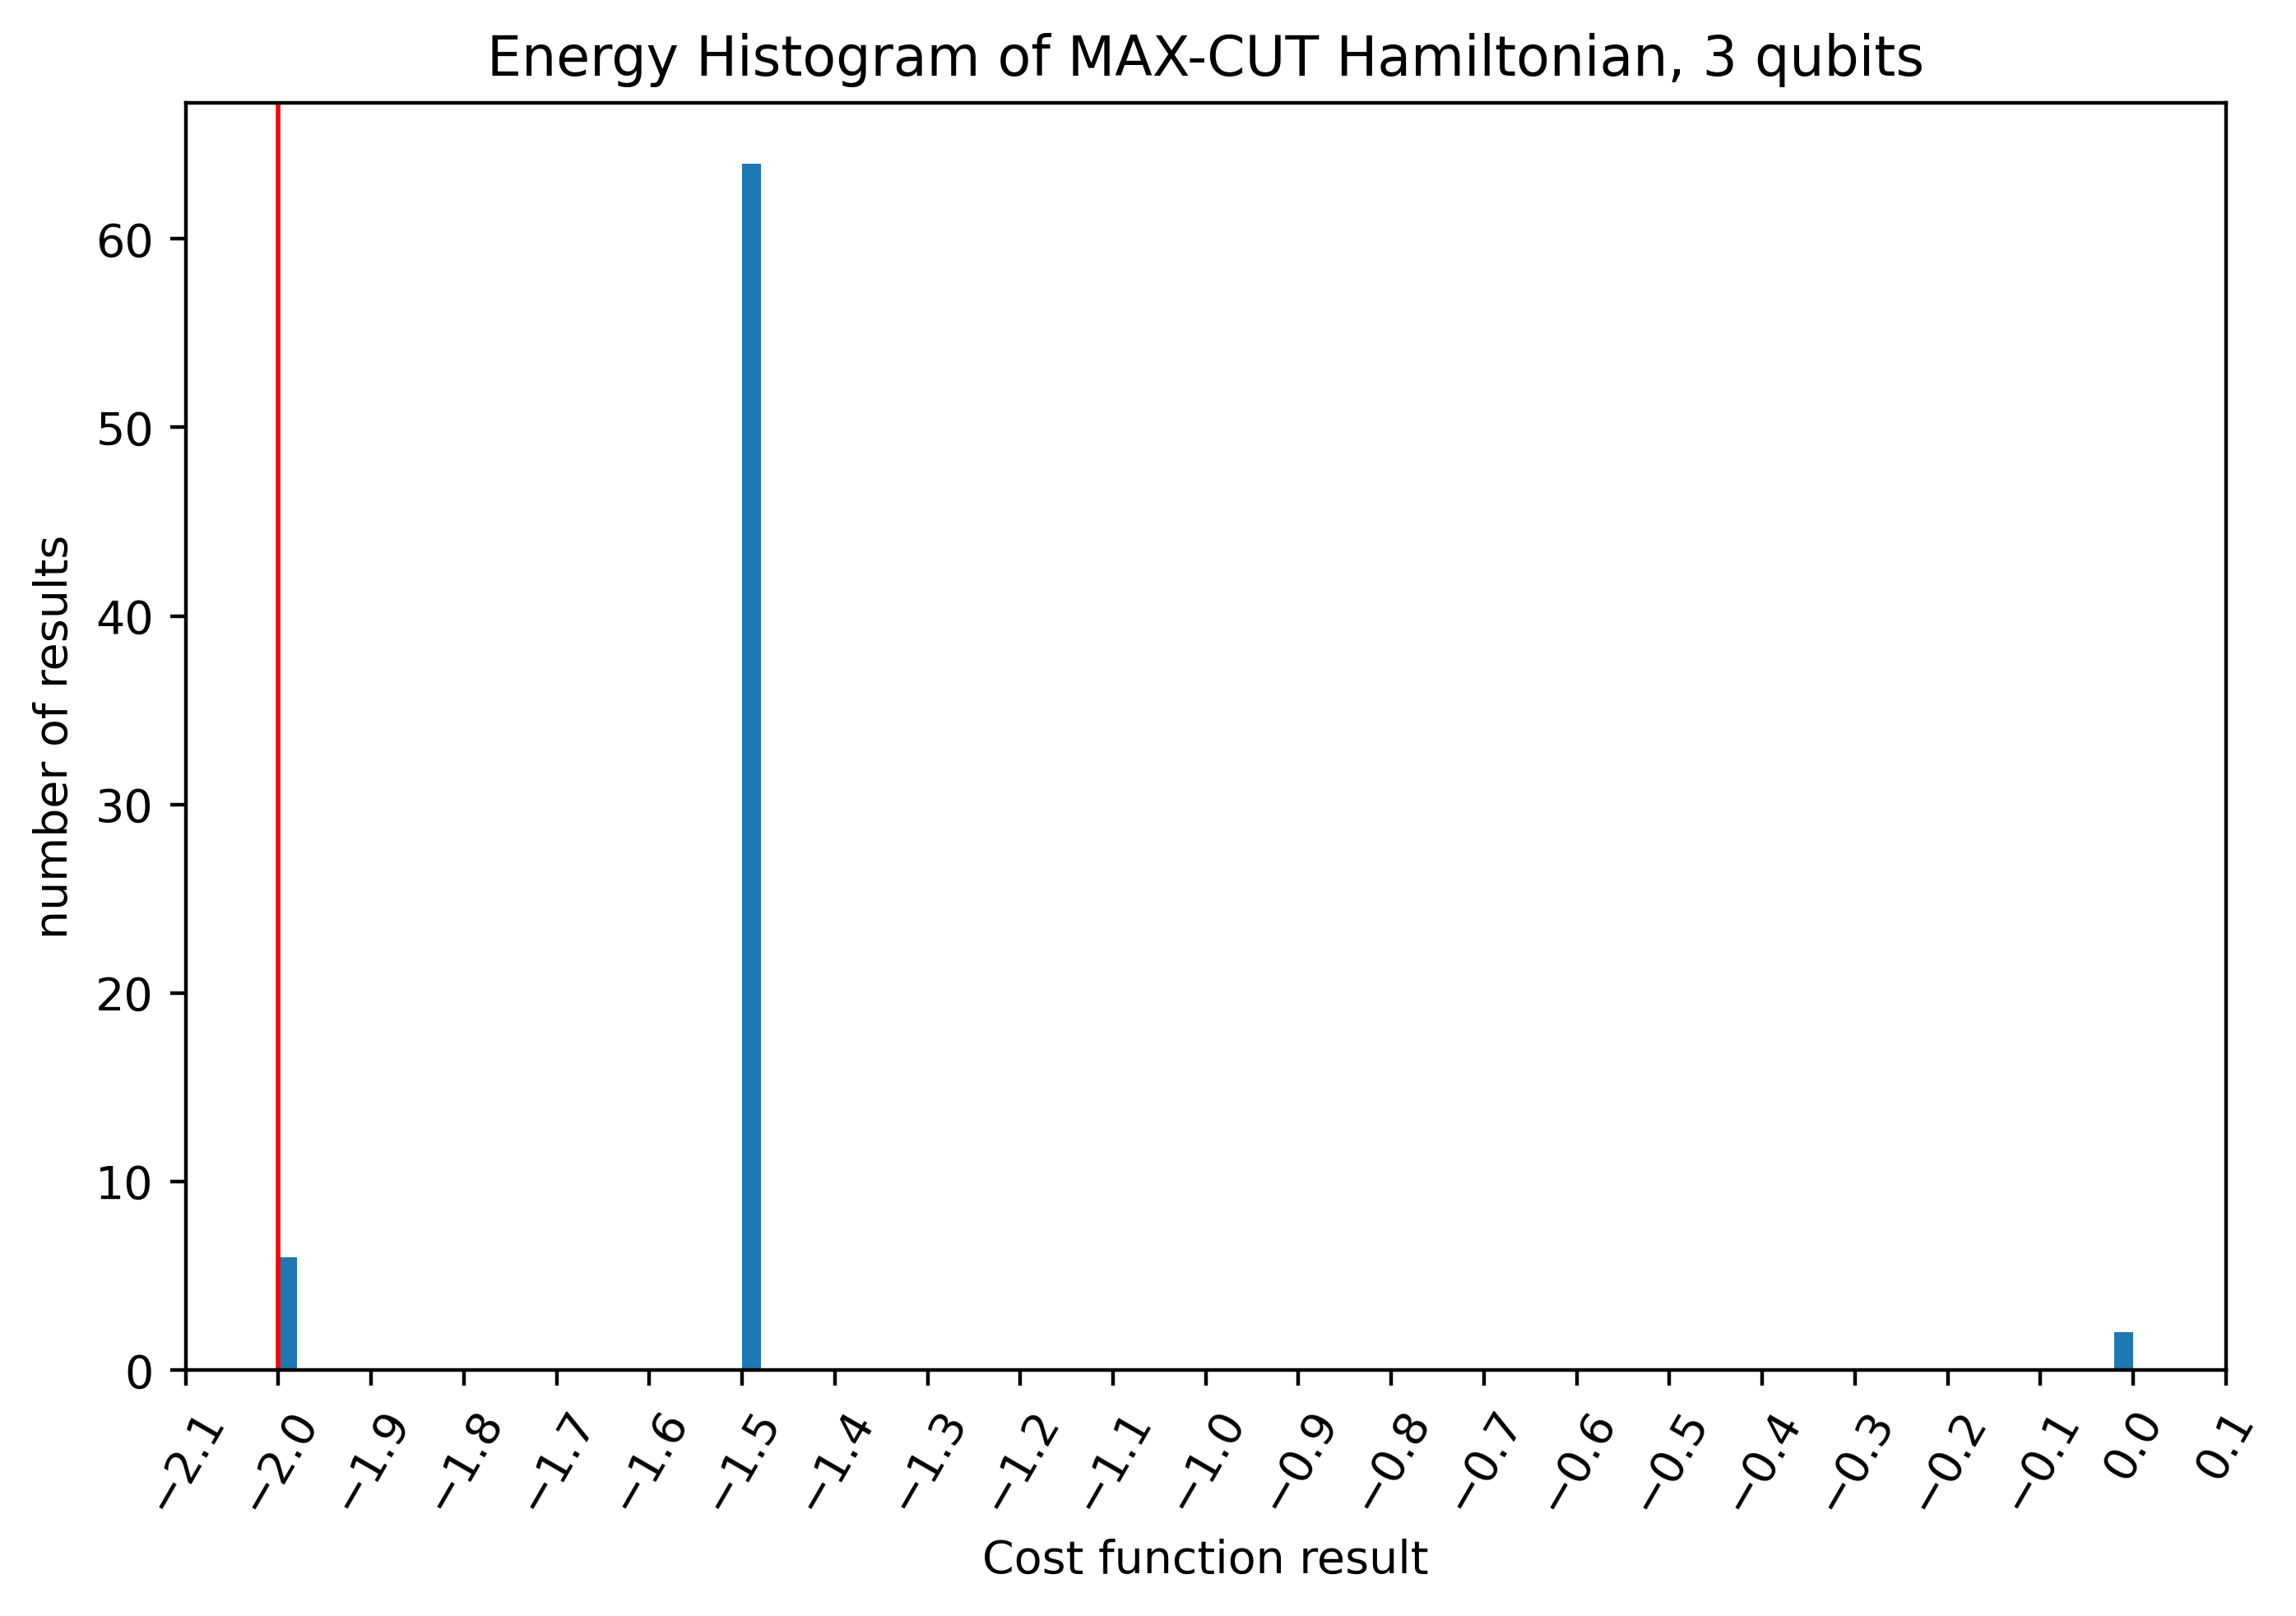

===Calculating Transverse Ising Landscape===
SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.62290169+0.j, 0.62290169+0.j, 0.74178699+0.j, 0.74178699+0.j,
 0.74178699+0.j])
attempting all MUB states over the operator Transverse Ising Hamiltonian, 3 qubits
Energy Landscape:


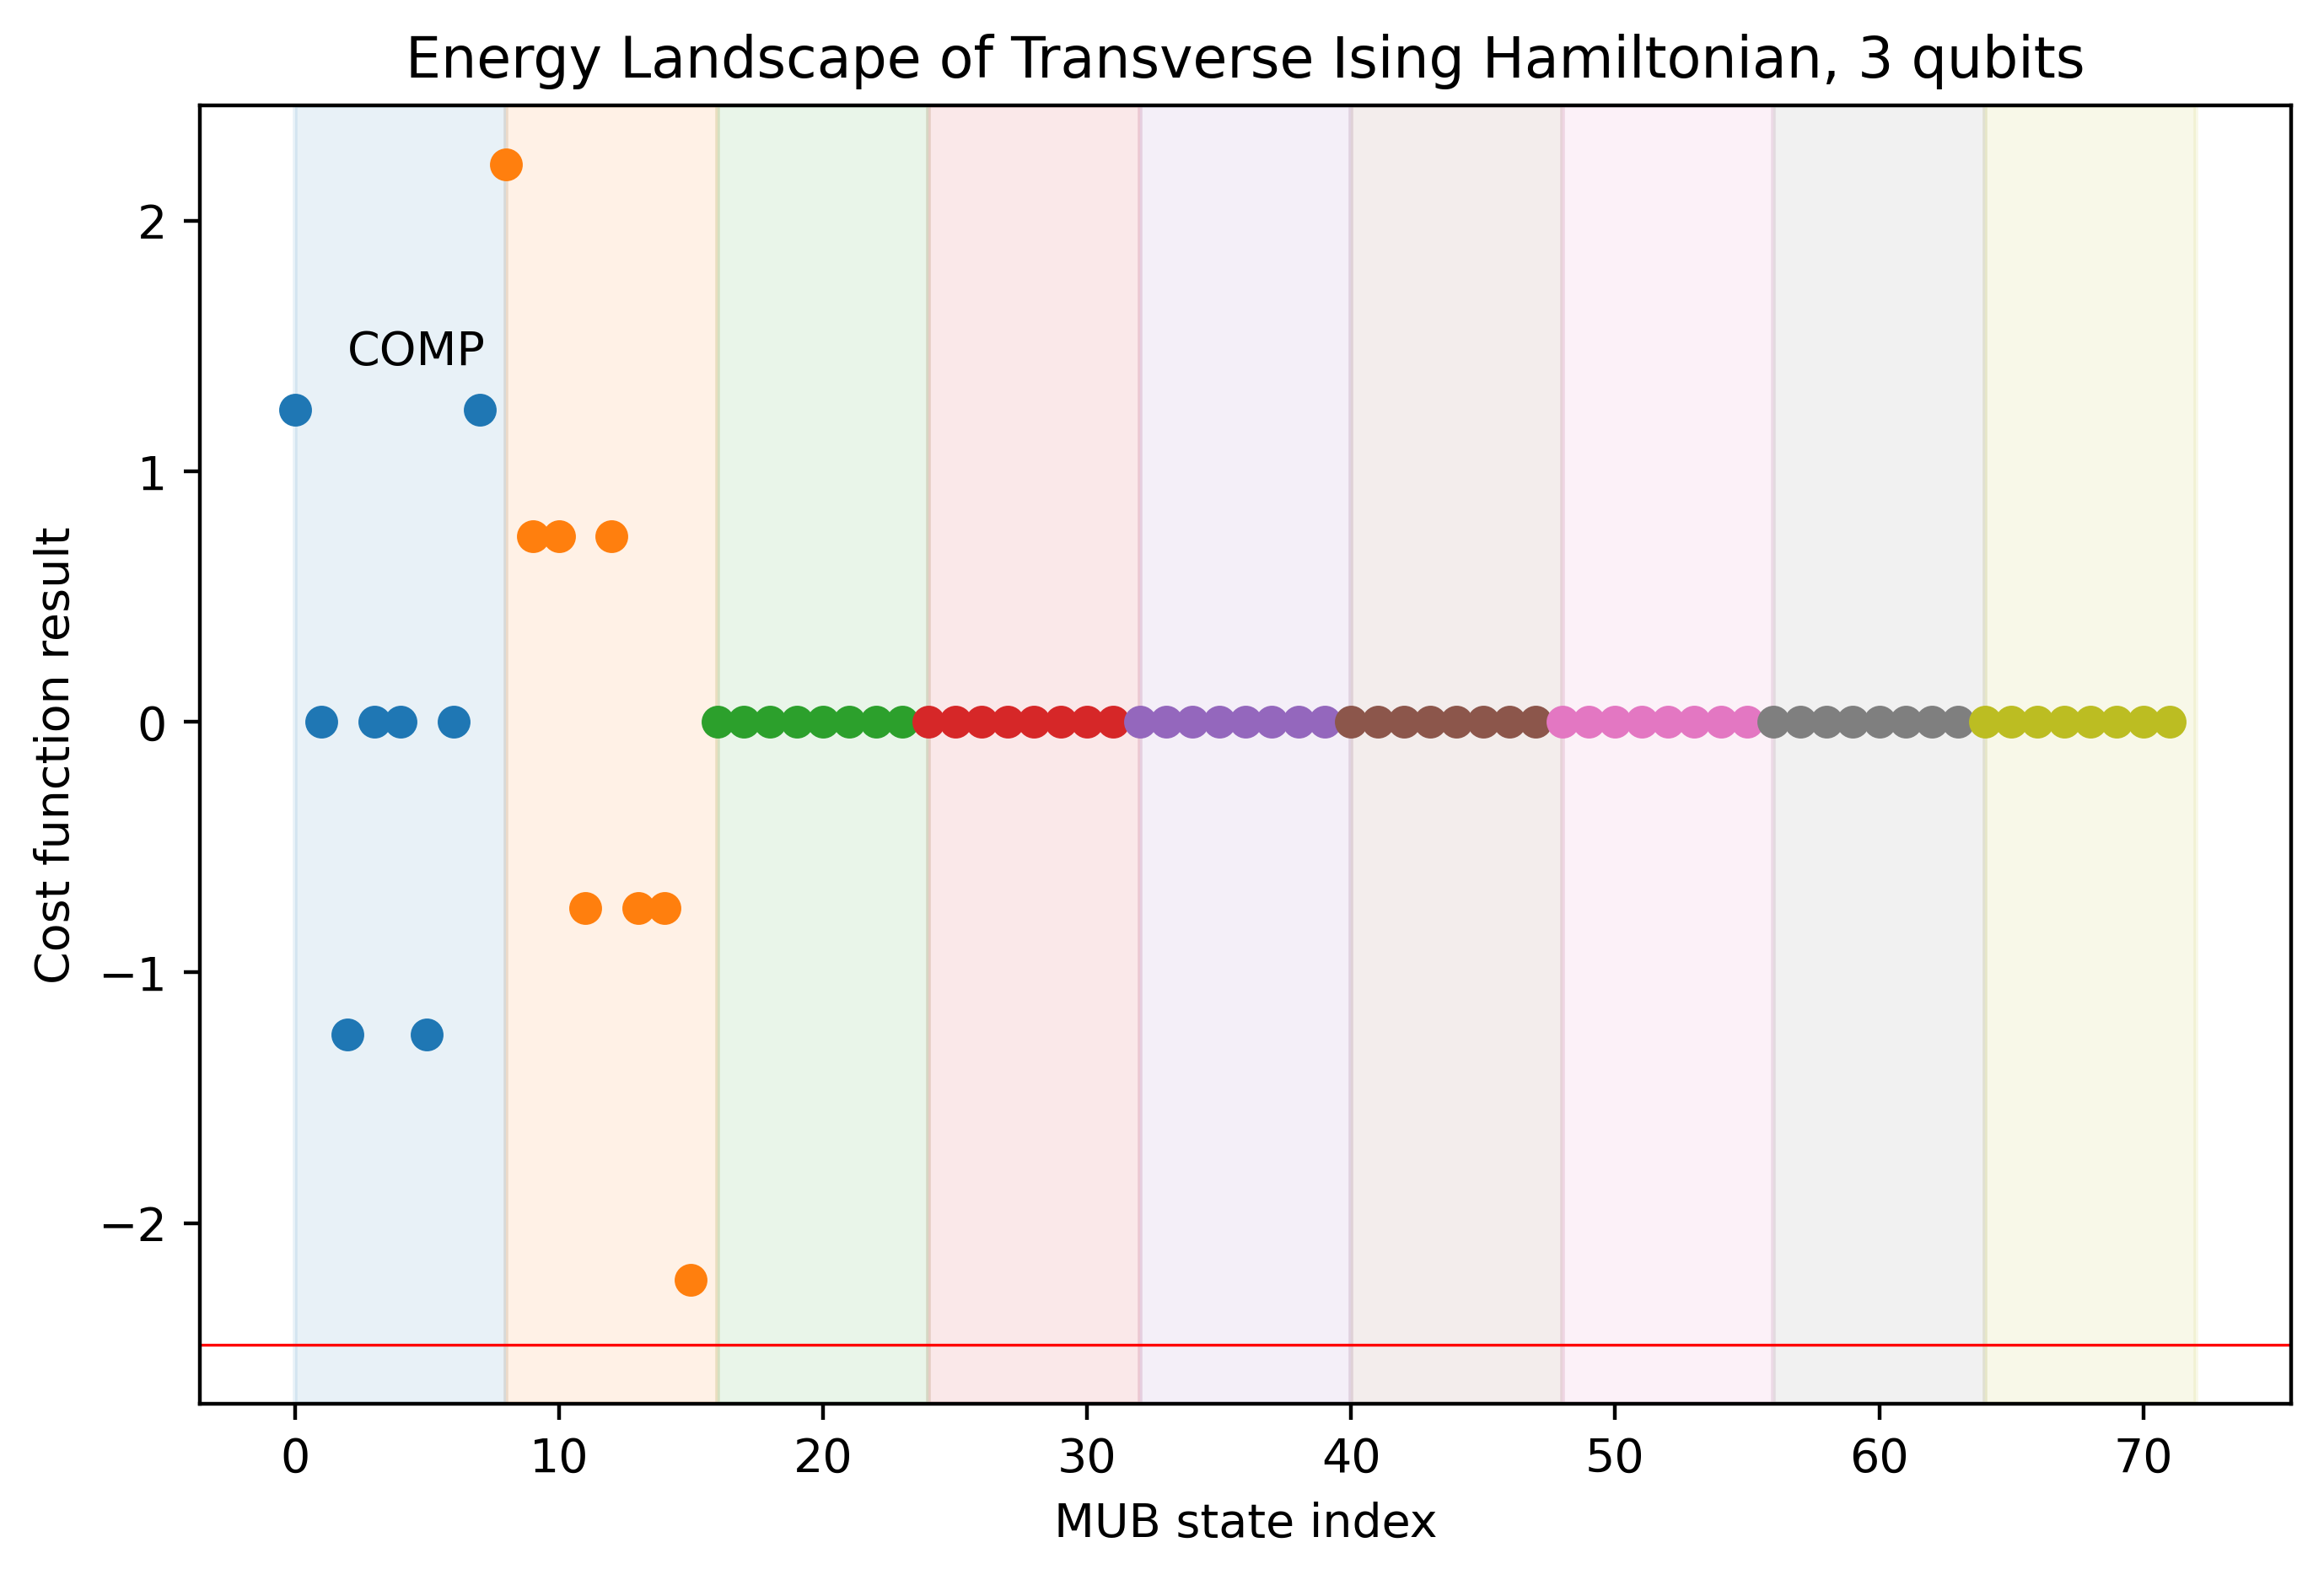

Energy Histogram:


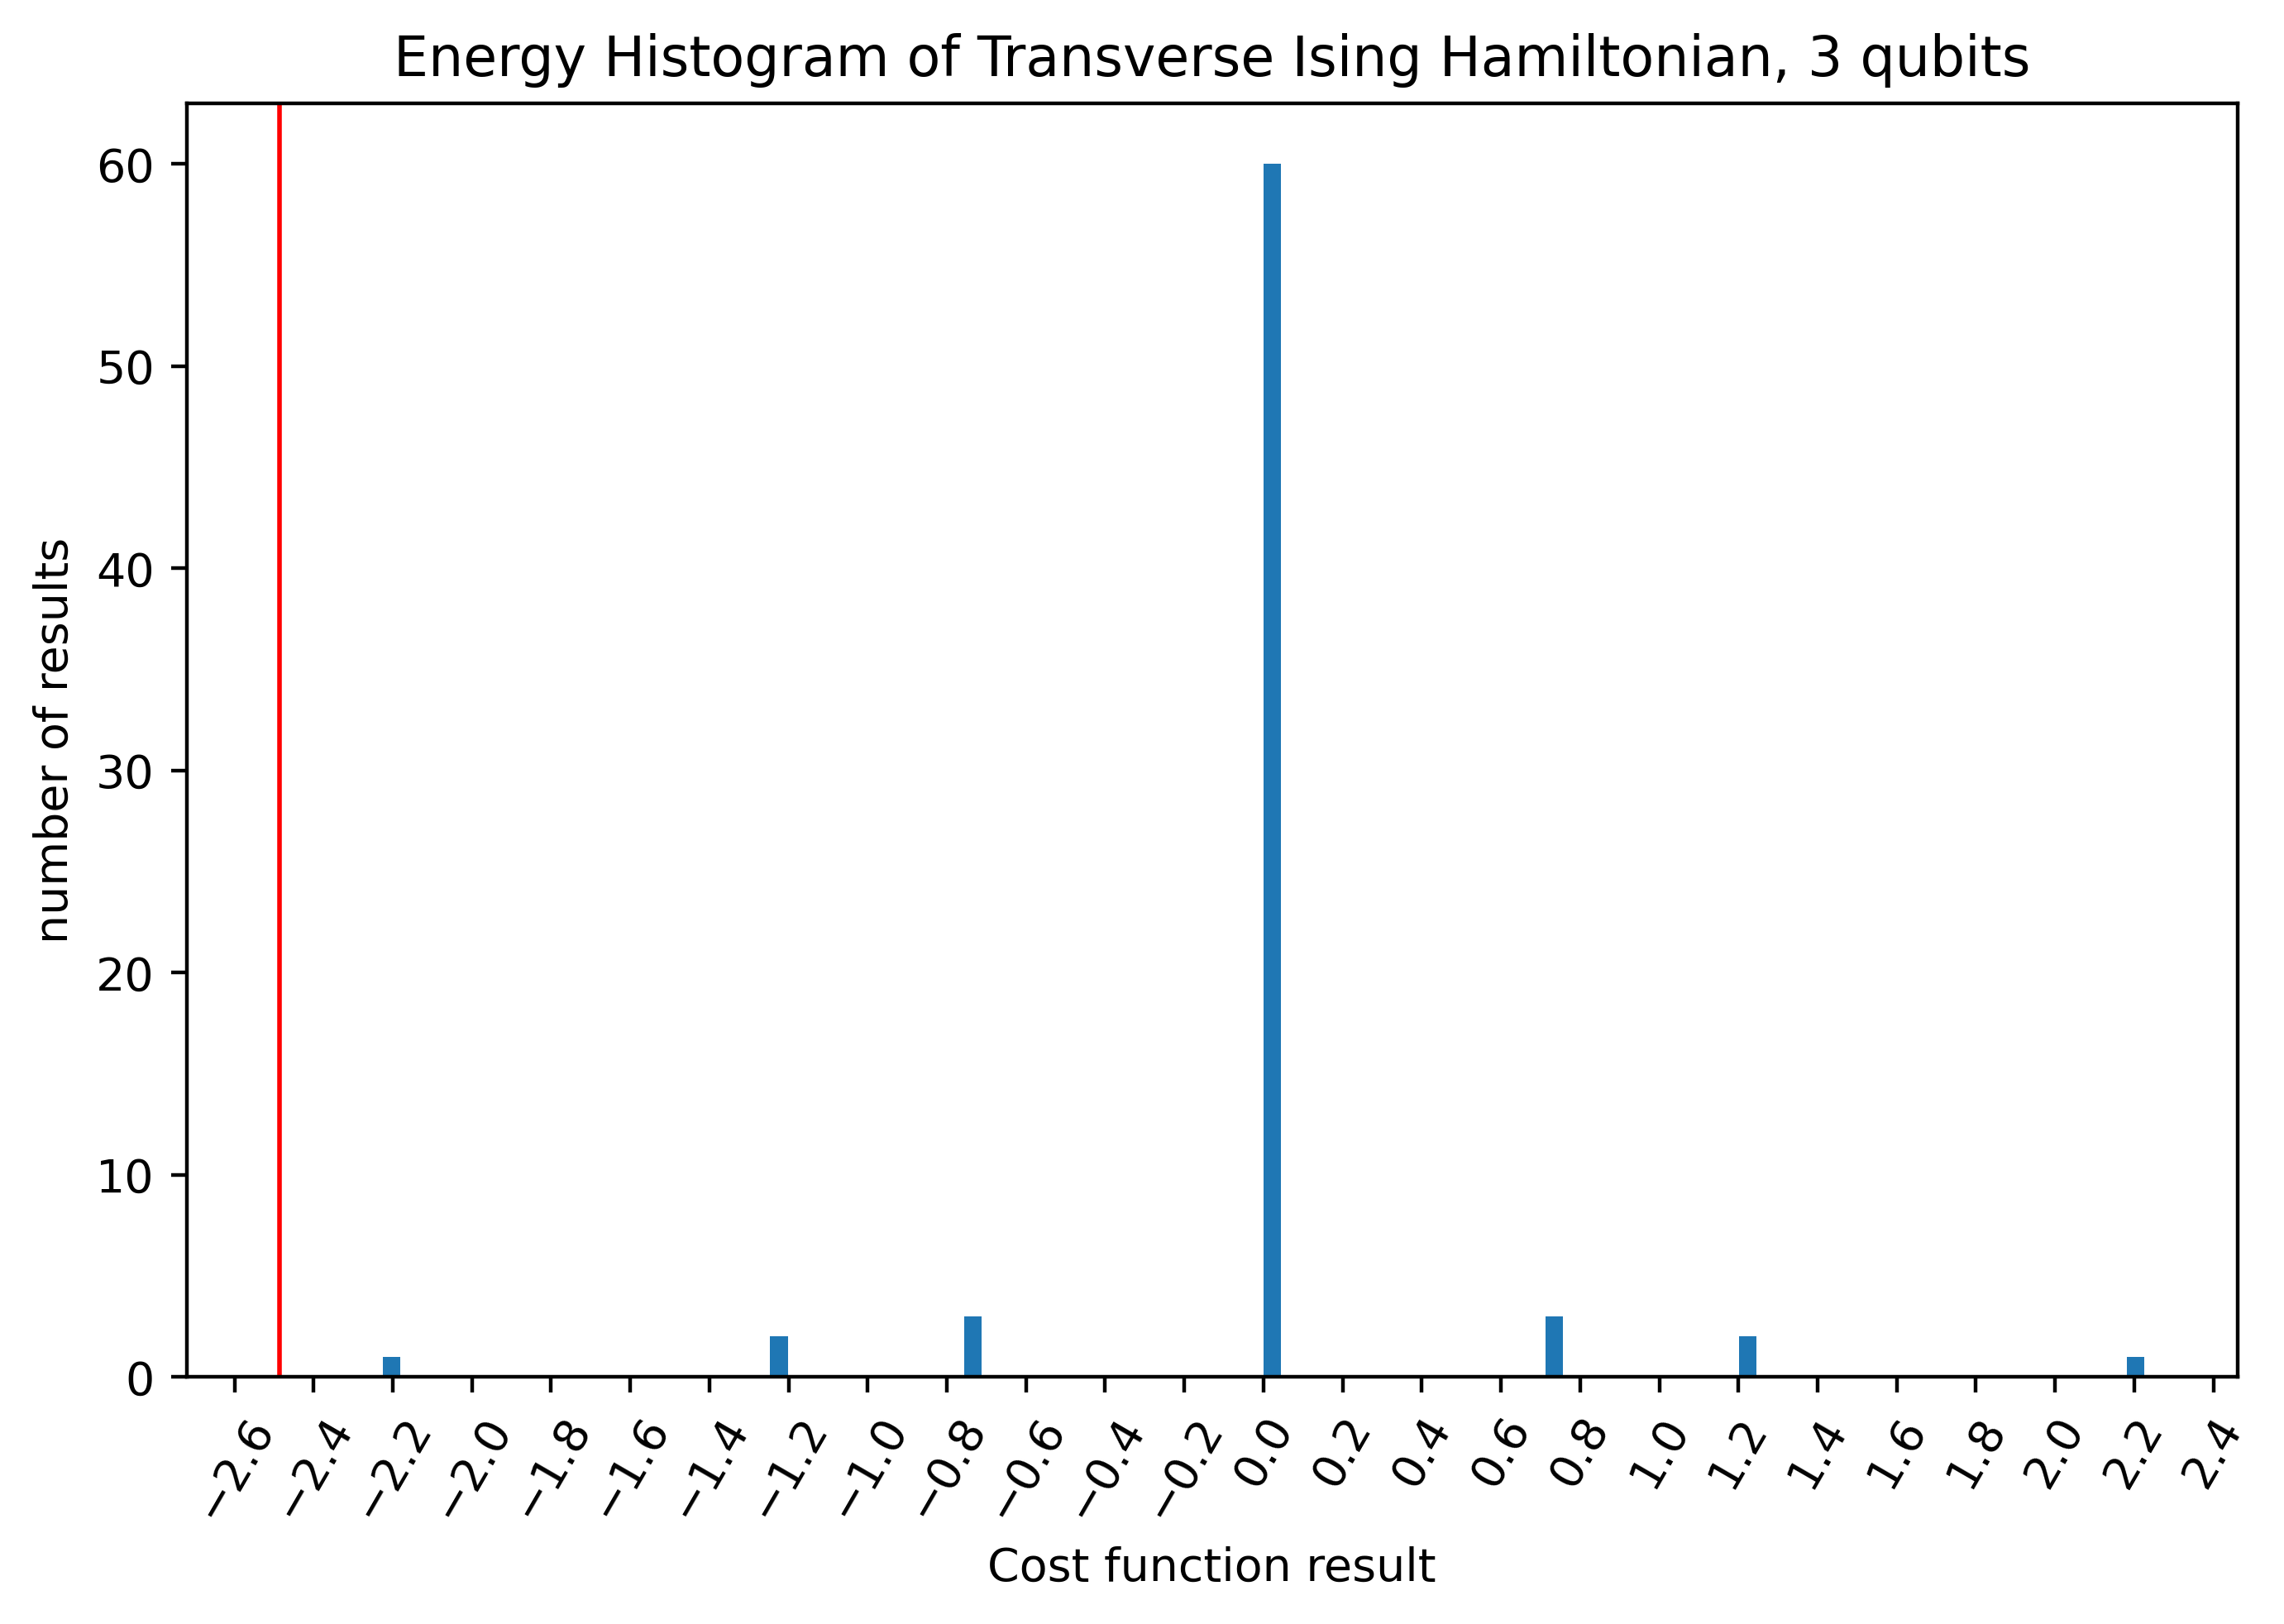

In [6]:

print("===Calculating Maxcut Landscape===")
print(maxcut_ham_3q)
maxcut_landscape_3q = run_and_record_landscape(maxcut_ham_3q, n_mub_qubits=3, desc="MAX-CUT Hamiltonian, 3 qubits")
print("===Calculating Transverse Ising Landscape===")
print(transverse_ham_3q)
transverse_landscape_3q = run_and_record_landscape(transverse_ham_3q, n_mub_qubits=3, desc="Transverse Ising Hamiltonian, 3 qubits")


## 4 qubit experiments
These experiments are run on two types of examples:
-   Hamiltonian reduction of a MAXCUT problem instance.
-   Transverse-Field Ising Model Hamiltonian.
-   A 4-qubit Molecular Hamiltonian.

For these, we will present:
-   The energy landscape sampled using all partial-MUB states, with an appended ansatz.

### Hamiltonian Generation

In [7]:
# half-MUB experiments
n_mub_qubits = 3
n_qubits = 4

LiH_ham_1_5 = SparsePauliOp(
    data= ['IIII', 'IIIZ', 'IIZX', 'IIIX', 'IIXX', 'IIYY', 'IIZZ', 'IIXZ', 'IIXI', 'IIZI', 'IZII', 'ZXII', 'IXII', 'XXII', 'YYII',
    'ZZII', 'XZII', 'XIII', 'ZIII', 'IZIZ', 'IZZX', 'IZIX', 'IZXX', 'IZYY', 'ZXIZ', 'IXIZ', 'ZXZX', 'IXZX', 'ZXIX', 'IXIX', 'ZXXX',
    'IXXX', 'ZXYY', 'IXYY', 'XXIZ', 'YYIZ', 'XXZX', 'YYZX', 'XXIX', 'YYIX', 'XXXX', 'YYXX', 'XXYY', 'YYYY', 'ZZIZ', 'ZZZX', 'ZZIX',
    'ZZXX', 'ZZYY', 'XZIZ', 'XIIZ', 'XZZX', 'XIZX', 'XZIX', 'XIIX', 'XZXX', 'XIXX', 'XZYY', 'XIYY', 'ZIIZ', 'ZIZX', 'ZIIX', 'ZIXX',
    'ZIYY', 'IZZZ', 'IZXZ', 'IZXI', 'ZXZZ', 'IXZZ', 'ZXXZ', 'IXXZ', 'ZXXI', 'IXXI', 'XXZZ', 'YYZZ', 'XXXZ', 'YYXZ', 'XXXI', 'YYXI',
    'ZZZZ', 'ZZXZ', 'ZZXI', 'XZZZ', 'XIZZ', 'XZXZ', 'XIXZ', 'XZXI', 'XIXI', 'ZIZZ', 'ZIXZ', 'ZIXI', 'IZZI', 'ZXZI', 'IXZI', 'XXZI',
    'YYZI', 'ZZZI', 'XZZI', 'XIZI', 'ZIZI'], 
coeffs = [-1.99754128e-01+0.j, -9.17966069e-02+0.j, -2.73410751e-03+0.j,
        2.73410751e-03+0.j, -3.09895035e-04+0.j,  3.09895035e-04+0.j,  -2.11959340e-01+0.j,  1.95776538e-02+0.j,  1.95776538e-02+0.j,
        3.71356404e-01+0.j,  9.17966069e-02+0.j,  2.73410751e-03+0.j, 2.73410751e-03+0.j, -3.09895035e-04+0.j,  3.09895035e-04+0.j,
       -2.11959340e-01+0.j, -1.95776538e-02+0.j,  1.95776538e-02+0.j, -3.71356404e-01+0.j, -1.23570872e-01+0.j,  1.17336239e-02+0.j,
       -1.17336239e-02+0.j,  3.30587286e-02+0.j, -3.30587286e-02+0.j, 1.17336239e-02+0.j,  1.17336239e-02+0.j, -3.03465683e-03+0.j,
       -3.03465683e-03+0.j,  3.03465683e-03+0.j,  3.03465683e-03+0.j, -8.37336142e-03+0.j, -8.37336142e-03+0.j,  8.37336142e-03+0.j,
        8.37336142e-03+0.j, -3.30587286e-02+0.j,  3.30587286e-02+0.j, 8.37336142e-03+0.j, -8.37336142e-03+0.j, -8.37336142e-03+0.j,
        8.37336142e-03+0.j,  3.07383272e-02+0.j, -3.07383272e-02+0.j, -3.07383272e-02+0.j,  3.07383272e-02+0.j,  5.66560676e-02+0.j,
        1.54067009e-03+0.j, -1.54067009e-03+0.j,  2.36793690e-03+0.j, -2.36793690e-03+0.j, -1.27339140e-02+0.j,  1.27339140e-02+0.j,
        2.11113767e-03+0.j, -2.11113767e-03+0.j, -2.11113767e-03+0.j, 2.11113767e-03+0.j,  7.76444118e-03+0.j, -7.76444118e-03+0.j,
       -7.76444118e-03+0.j,  7.76444118e-03+0.j,  1.14339547e-01+0.j, -1.05401874e-02+0.j,  1.05401874e-02+0.j, -3.51167704e-02+0.j,
        3.51167704e-02+0.j, -5.66560676e-02+0.j, -1.27339140e-02+0.j, -1.27339140e-02+0.j, -1.54067009e-03+0.j, -1.54067009e-03+0.j,
        2.11113767e-03+0.j,  2.11113767e-03+0.j,  2.11113767e-03+0.j, 2.11113767e-03+0.j,  2.36793690e-03+0.j, -2.36793690e-03+0.j,
       -7.76444118e-03+0.j,  7.76444118e-03+0.j, -7.76444118e-03+0.j, 7.76444118e-03+0.j,  8.47039180e-02+0.j, -9.01204279e-03+0.j,
       -9.01204279e-03+0.j,  9.01204279e-03+0.j, -9.01204279e-03+0.j, -6.57574490e-03+0.j,  6.57574490e-03+0.j, -6.57574490e-03+0.j,
        6.57574490e-03+0.j,  6.05056057e-02+0.j,  1.08894077e-02+0.j, 1.08894077e-02+0.j,  1.14339547e-01+0.j, -1.05401874e-02+0.j,
       -1.05401874e-02+0.j,  3.51167704e-02+0.j, -3.51167704e-02+0.j, -6.05056057e-02+0.j,  1.08894077e-02+0.j, -1.08894077e-02+0.j,
       -1.14091635e-01+0.j]
)
molecular_ground_energy = get_exact_ground(LiH_ham_1_5)

# Transverse Ising Hamiltonian
zz_coeff = random.uniform(0,1)
x_coeffs = random.uniform(0,1)
transverse_ham_4q = gen_trans_ising_op(n_qubits, zz_coeff, x_coeff)
transverse_ground_energy_4q = get_exact_ground(transverse_ham_4q)


# MAXCUT Hamiltonian
rand_graph_4 = nx.gnm_random_graph(4, 5)
maxcut_ham_4q = gen_maxcut_op_from_graph(rand_graph_4)
maxcut_ground_energy_4q = get_exact_ground(maxcut_ham_4q)

ansatz_4q = get_twolocal(n_qubits, n_qubits)


### Calculate Landscape

===Calculating Molecular Landscape===
attempting all MUB states over the operator LiH, 1.5A, 4 qubits
Energy Landscape:


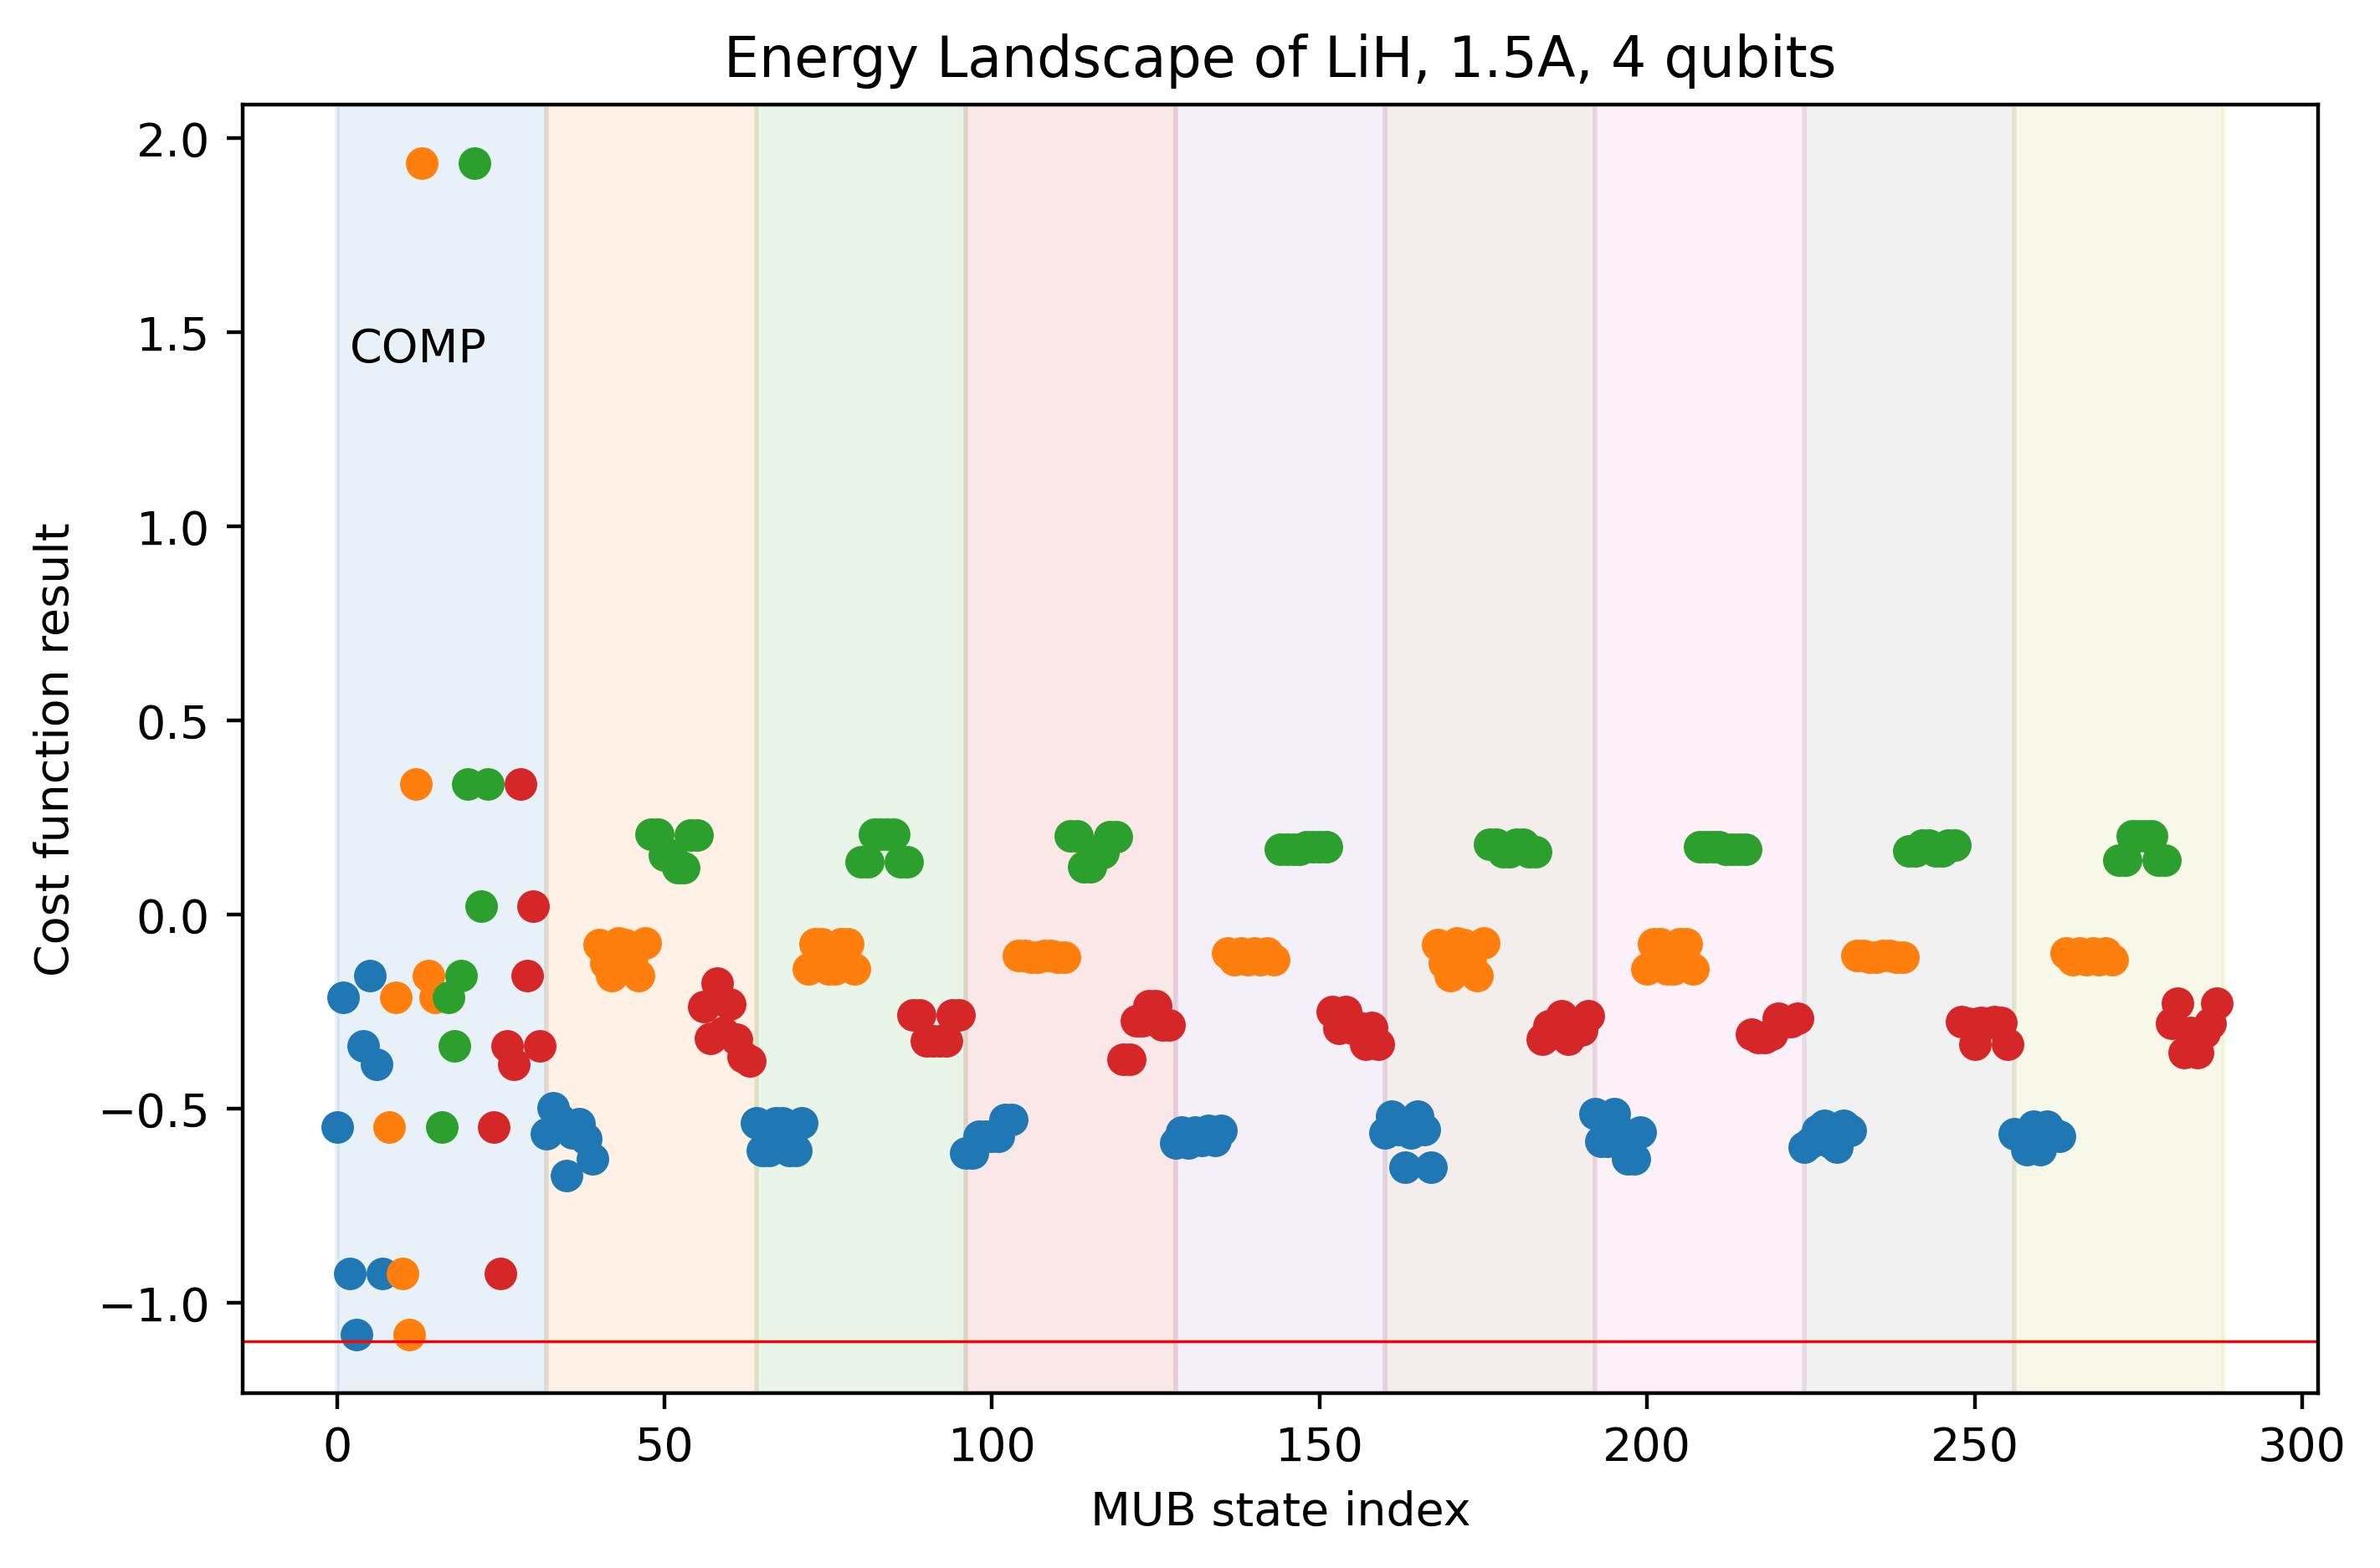

Energy Histogram:


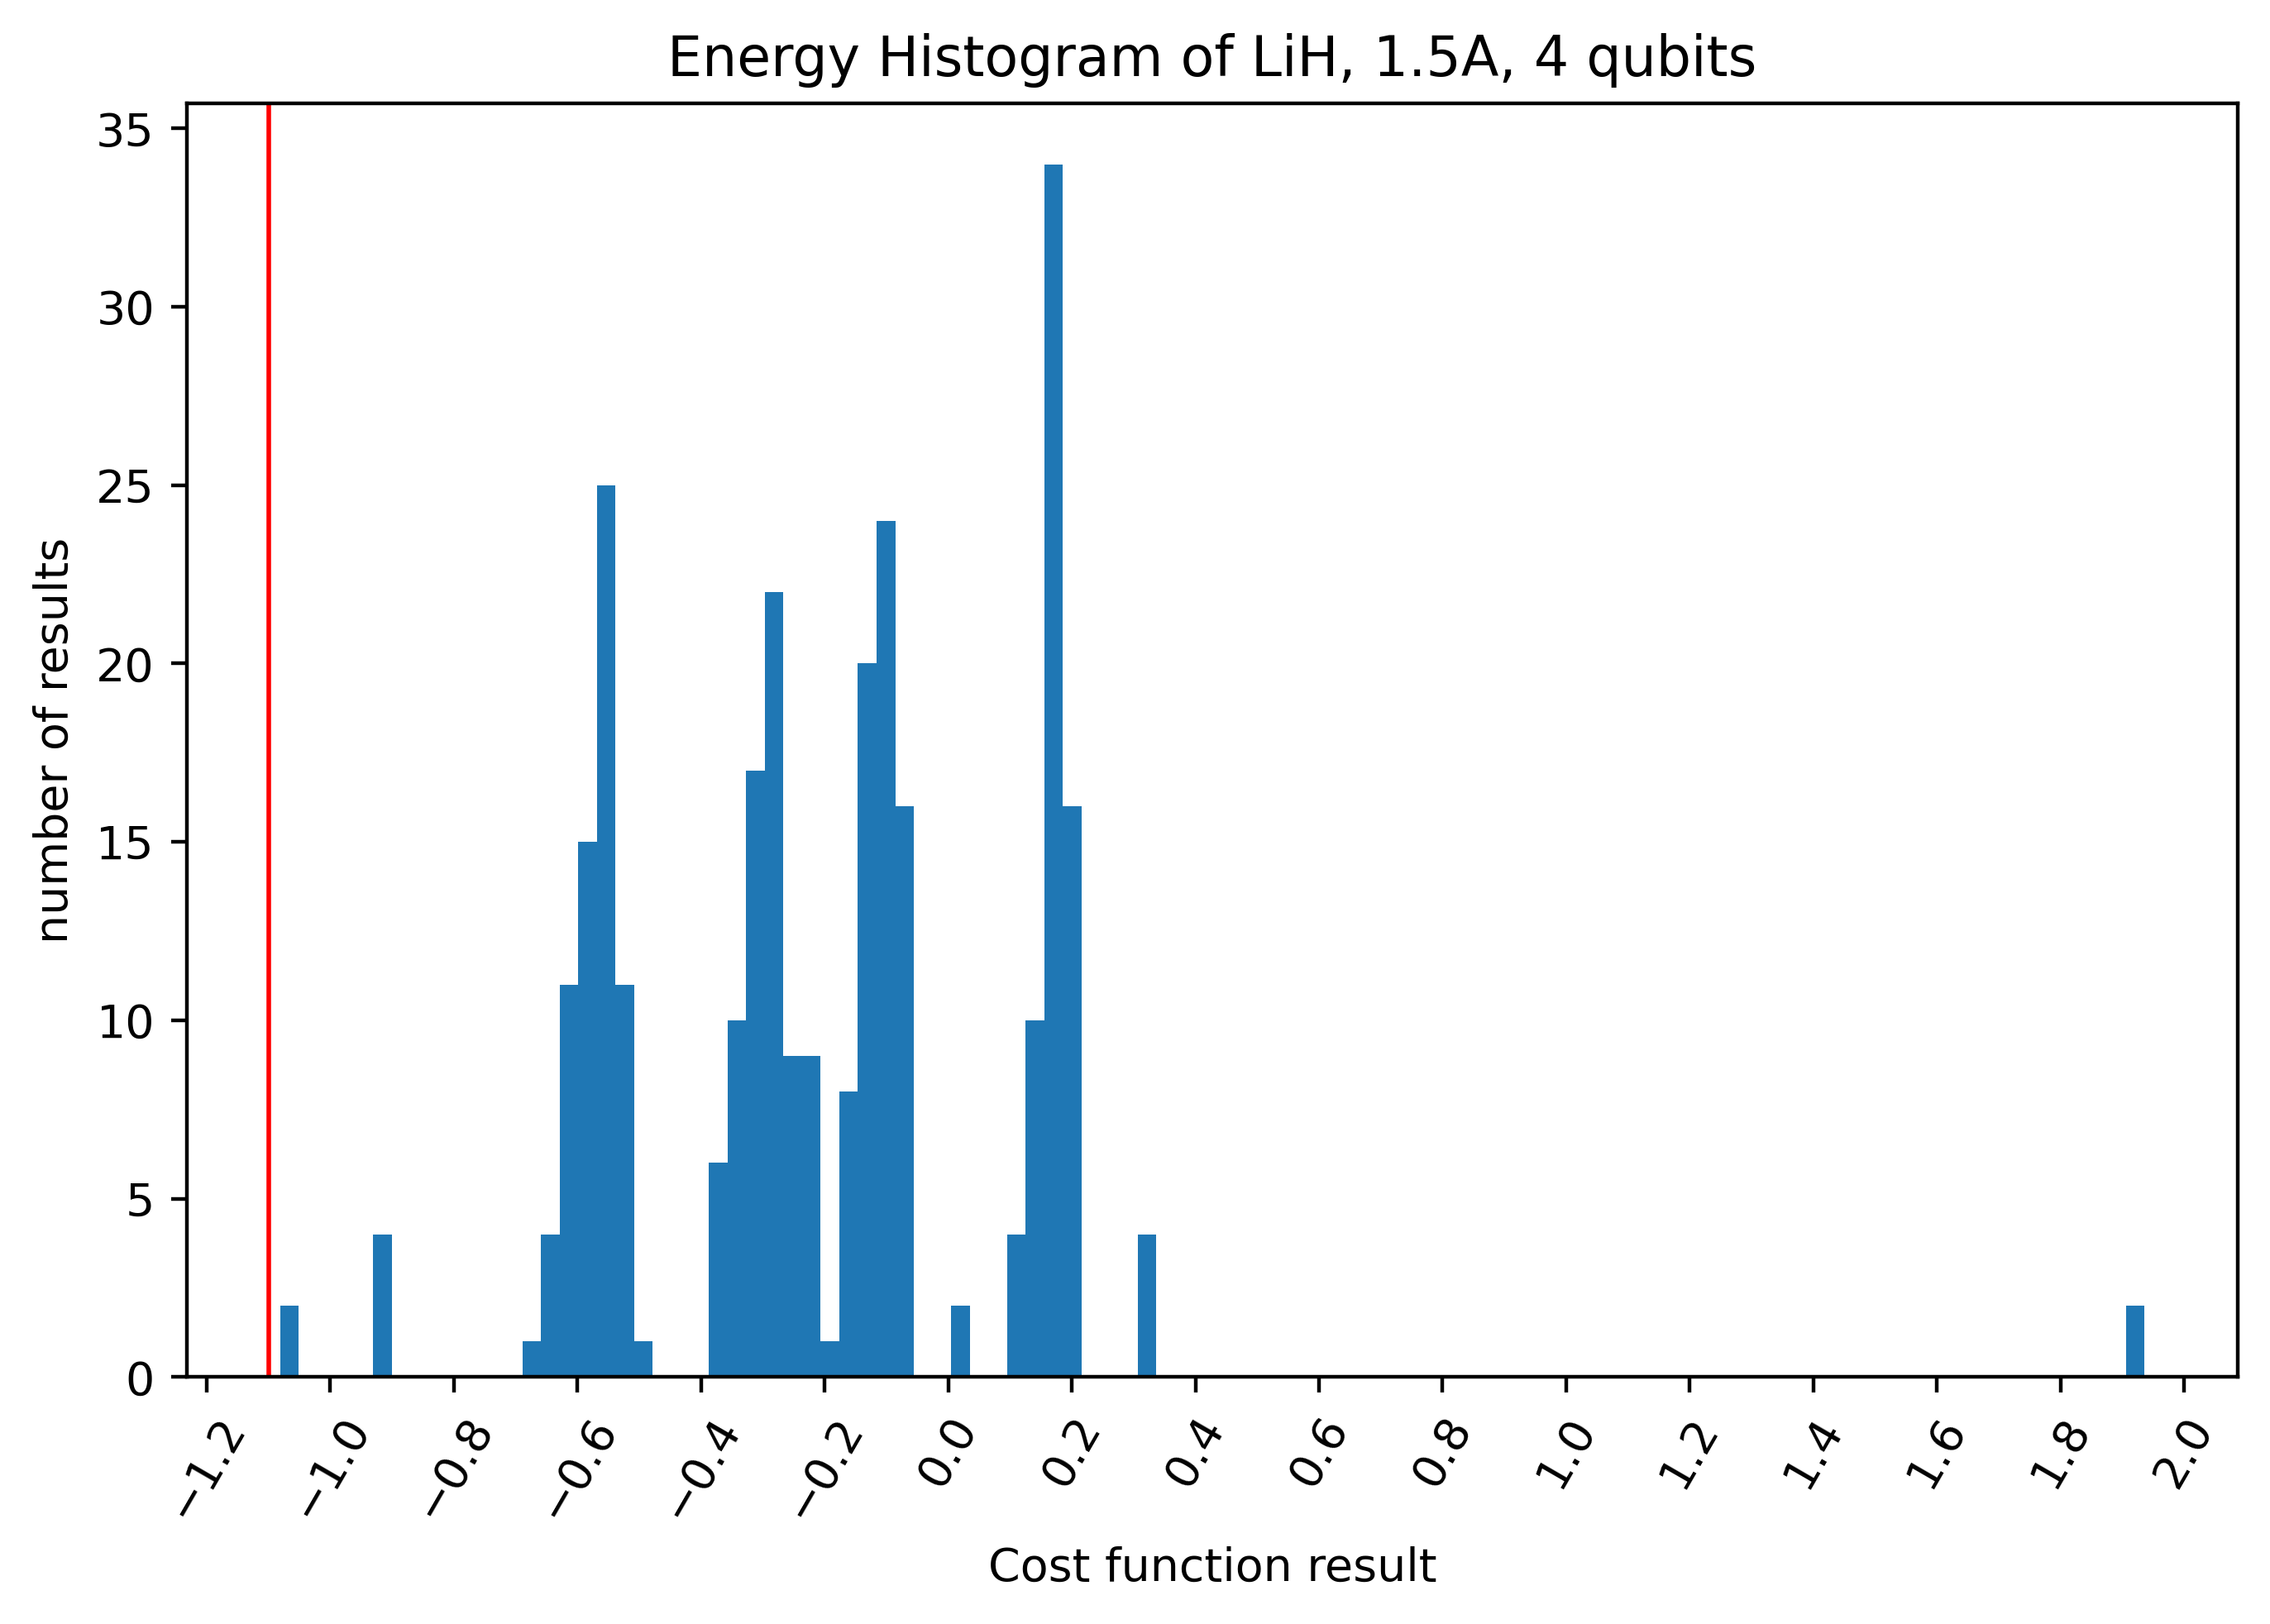

===Calculating Transverse Landscape===
attempting all MUB states over the operator Transverse Ising Hamiltonian, 4 qubits
Energy Landscape:


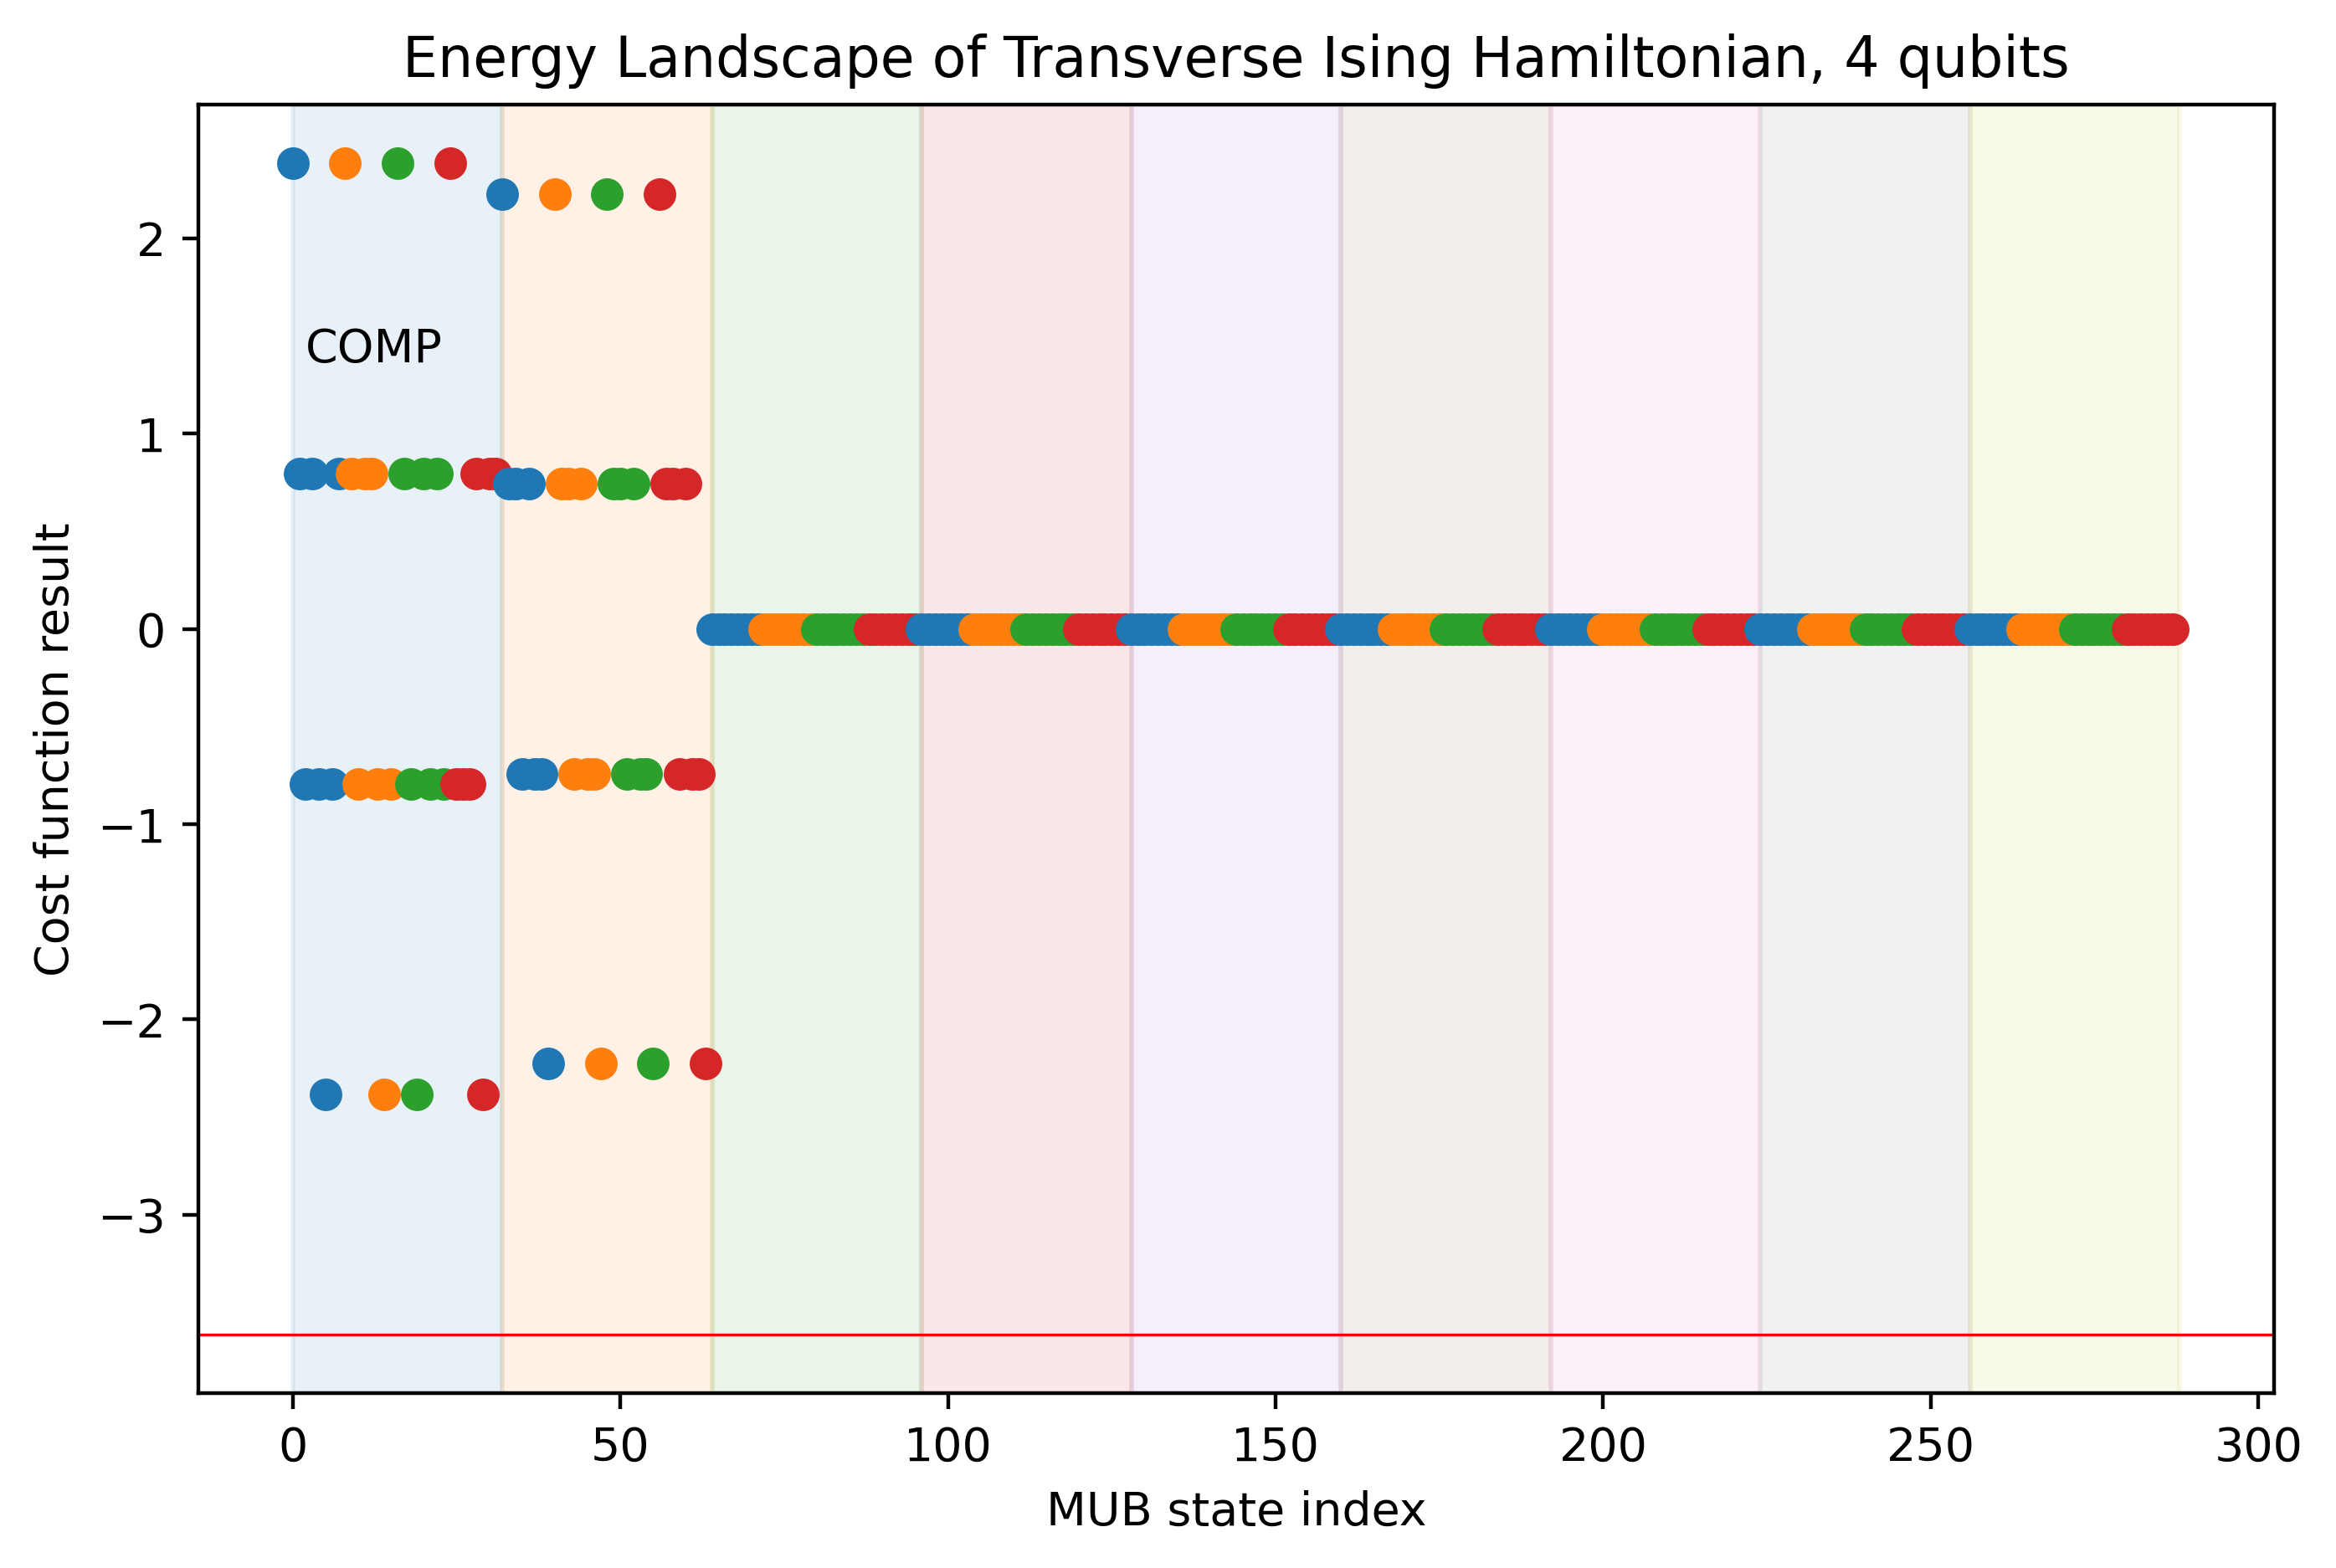

Energy Histogram:


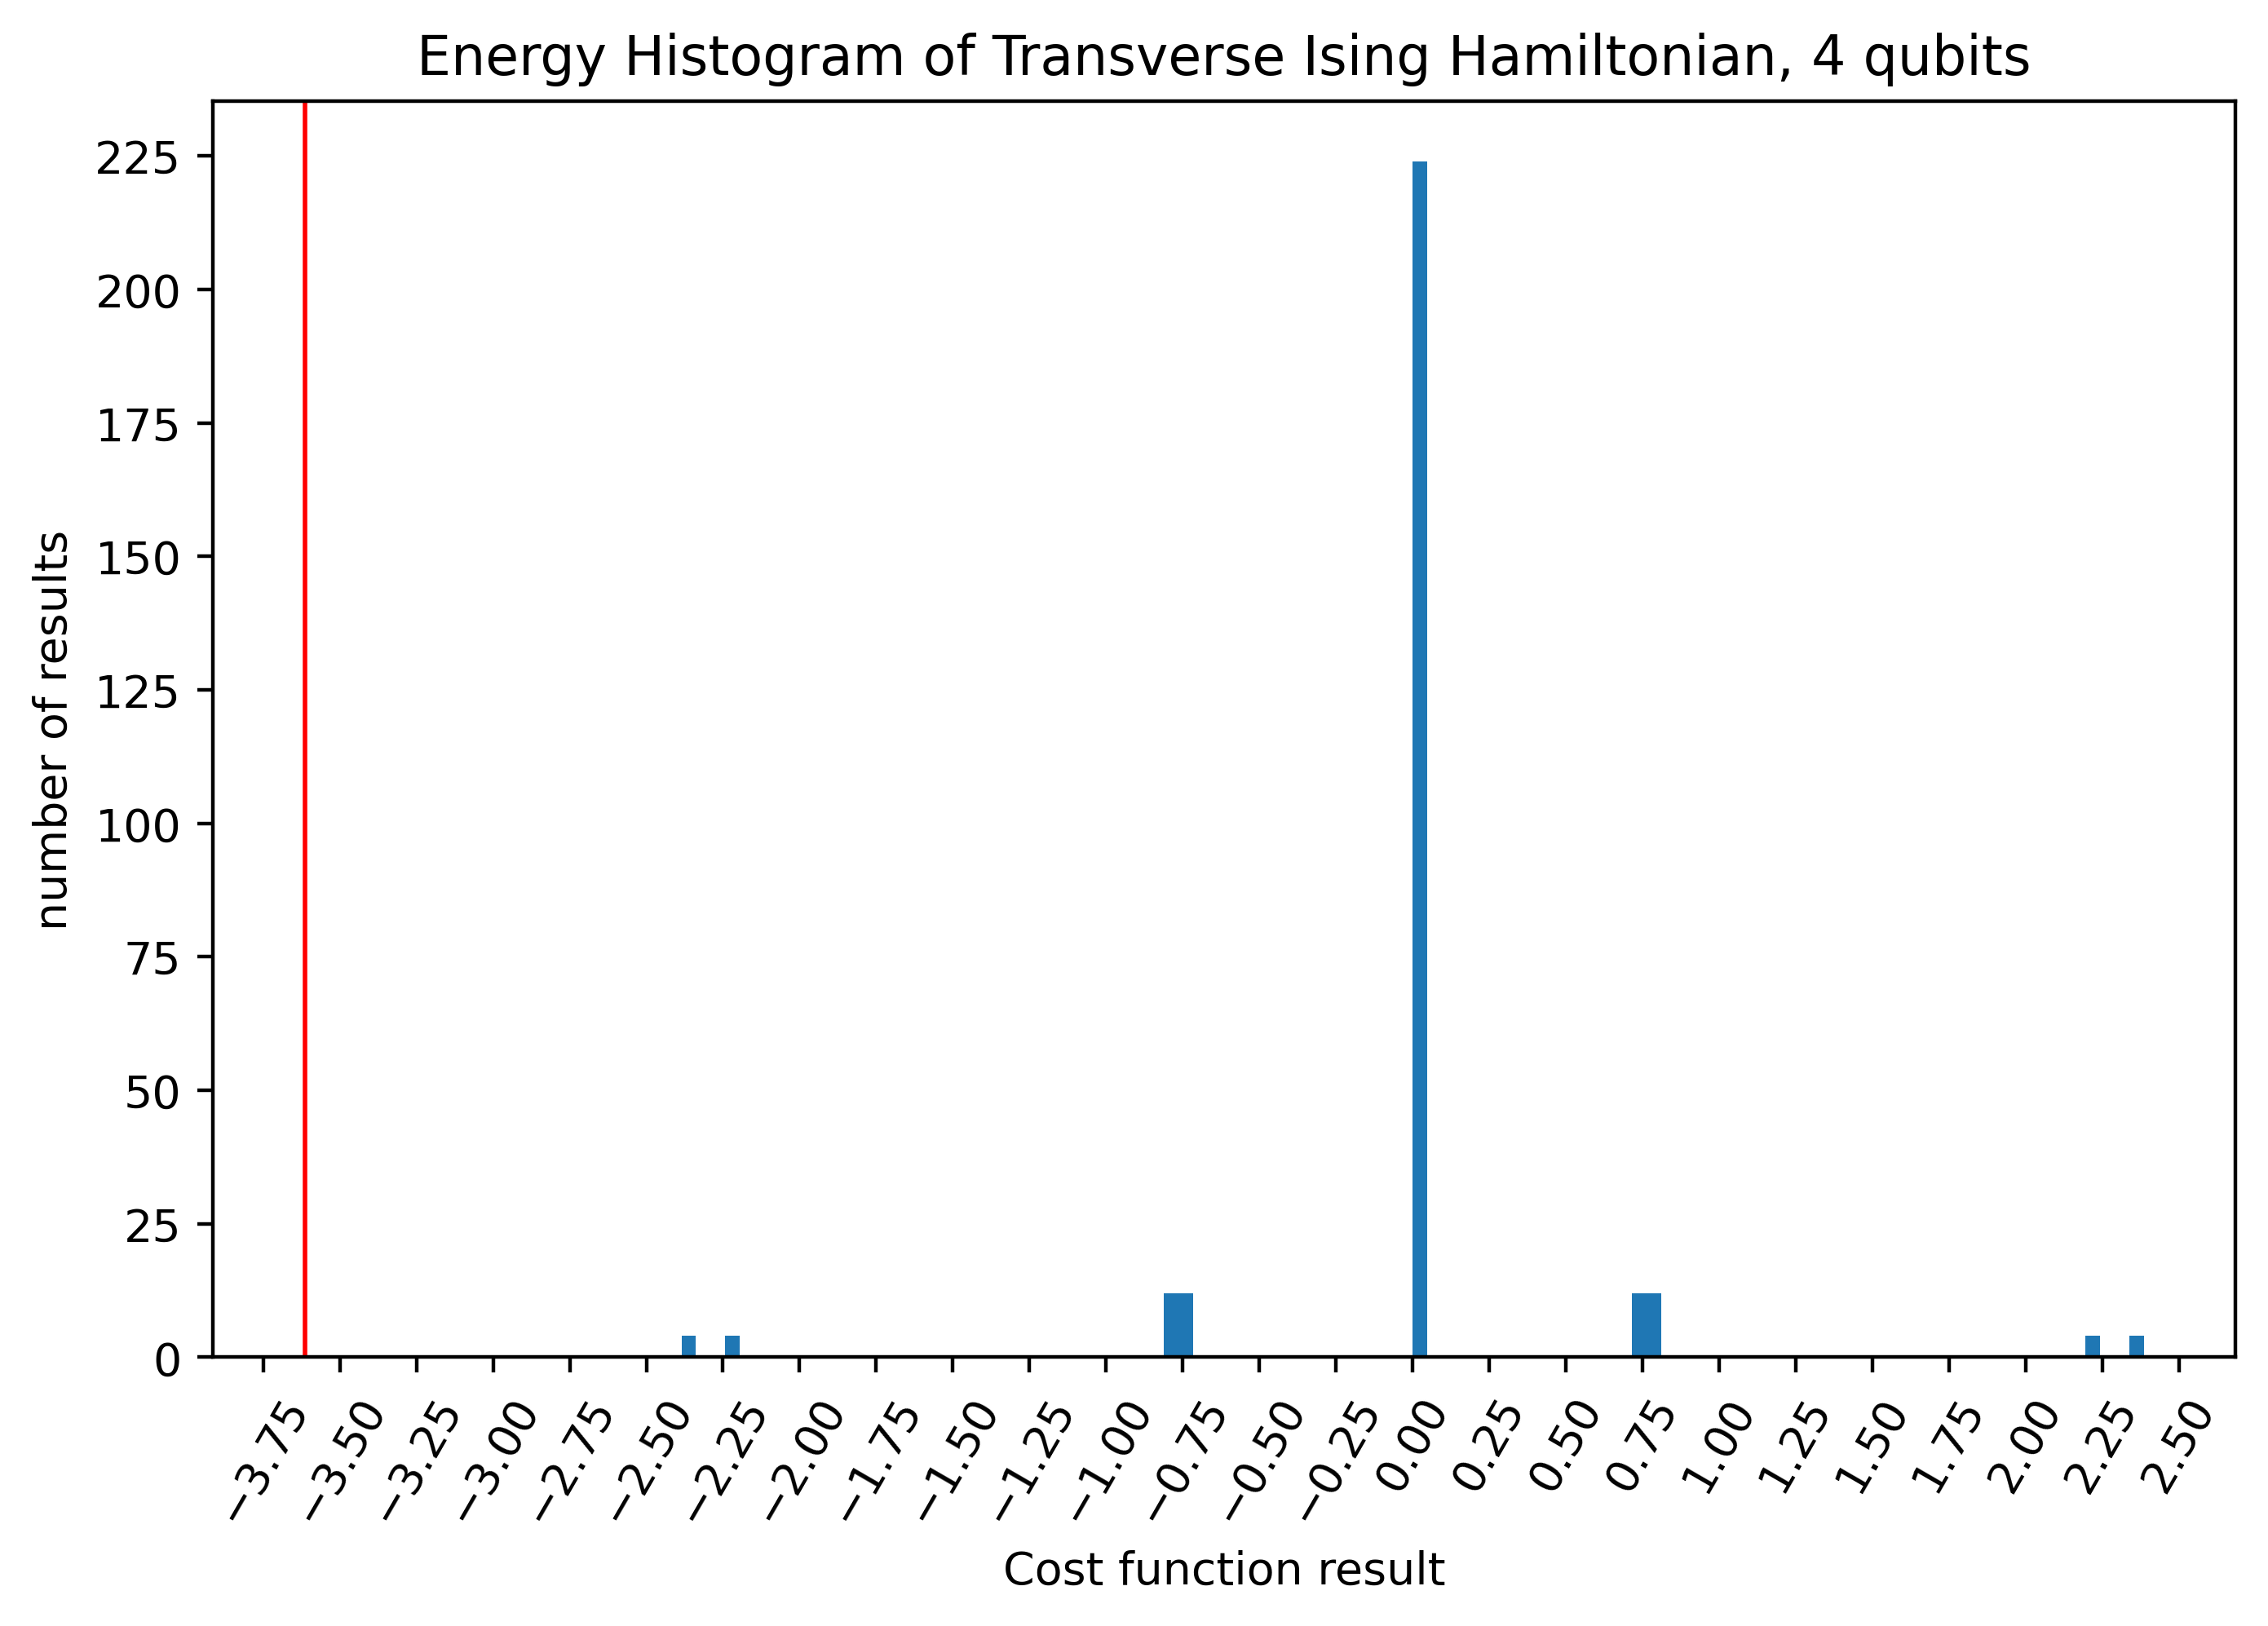

===Calculating Maxcut Landscape===
attempting all MUB states over the operator MAX-CUT Hamiltonian, 4 qubits
Energy Landscape:


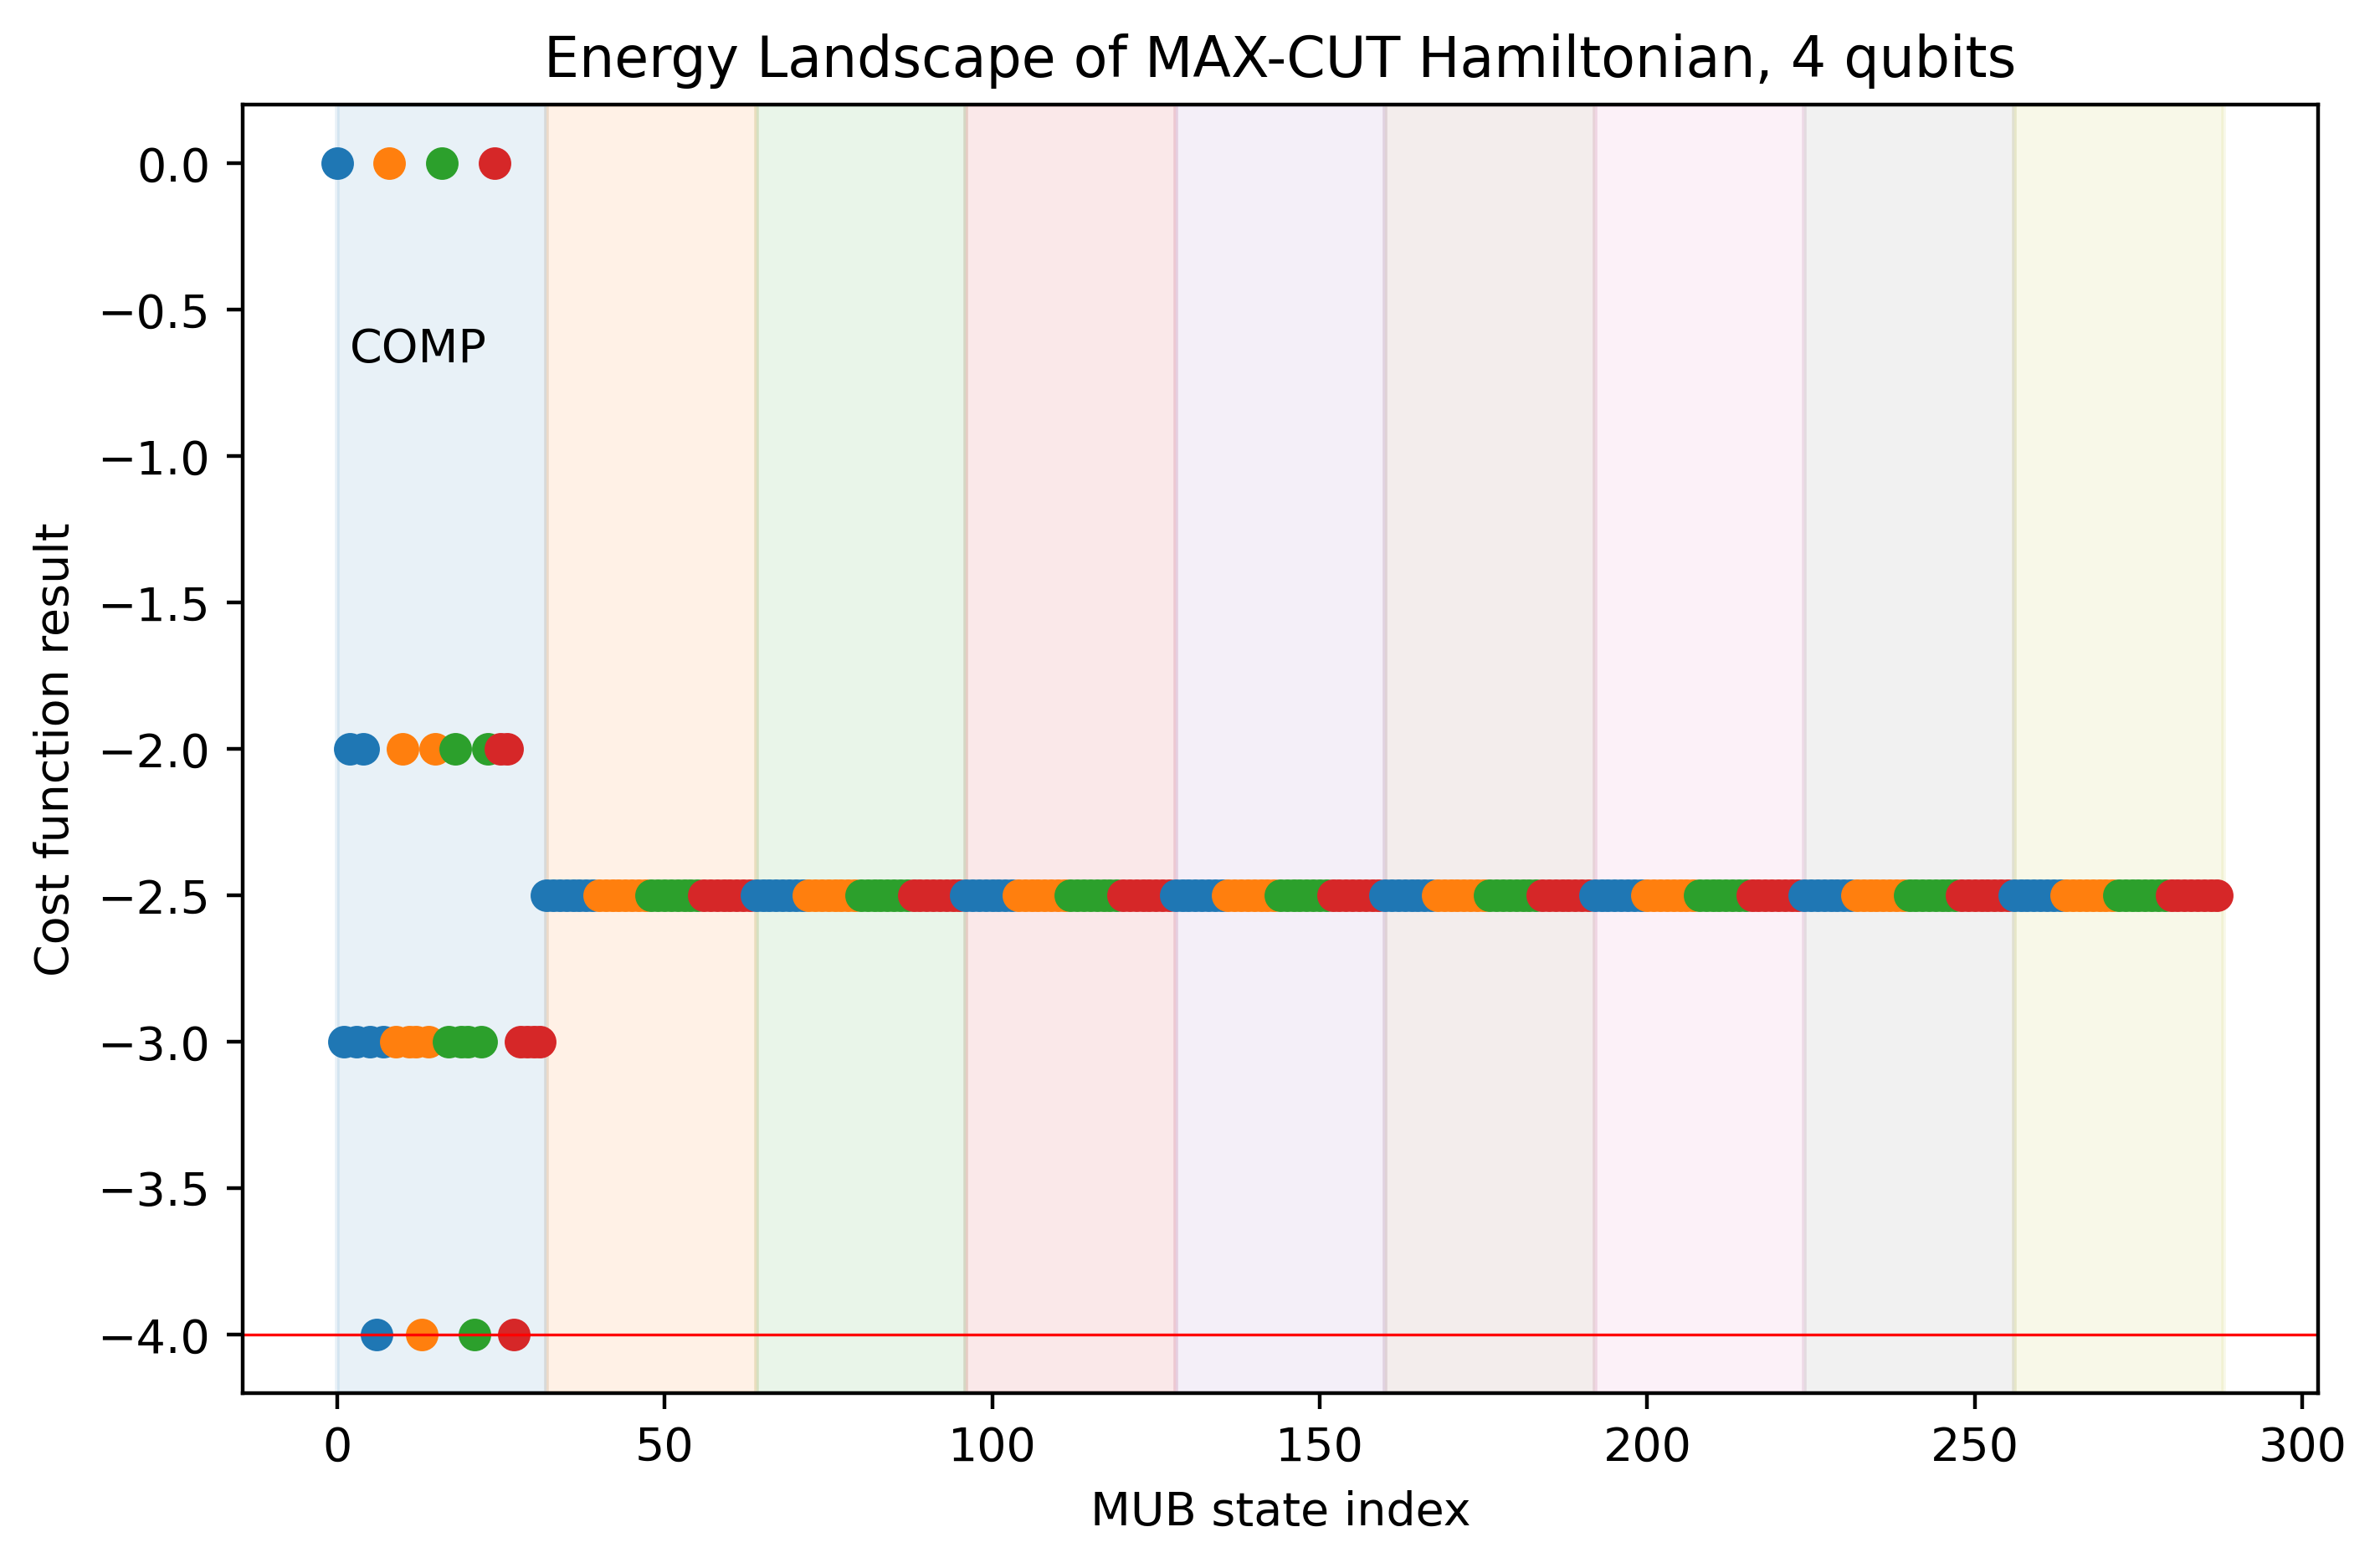

Energy Histogram:


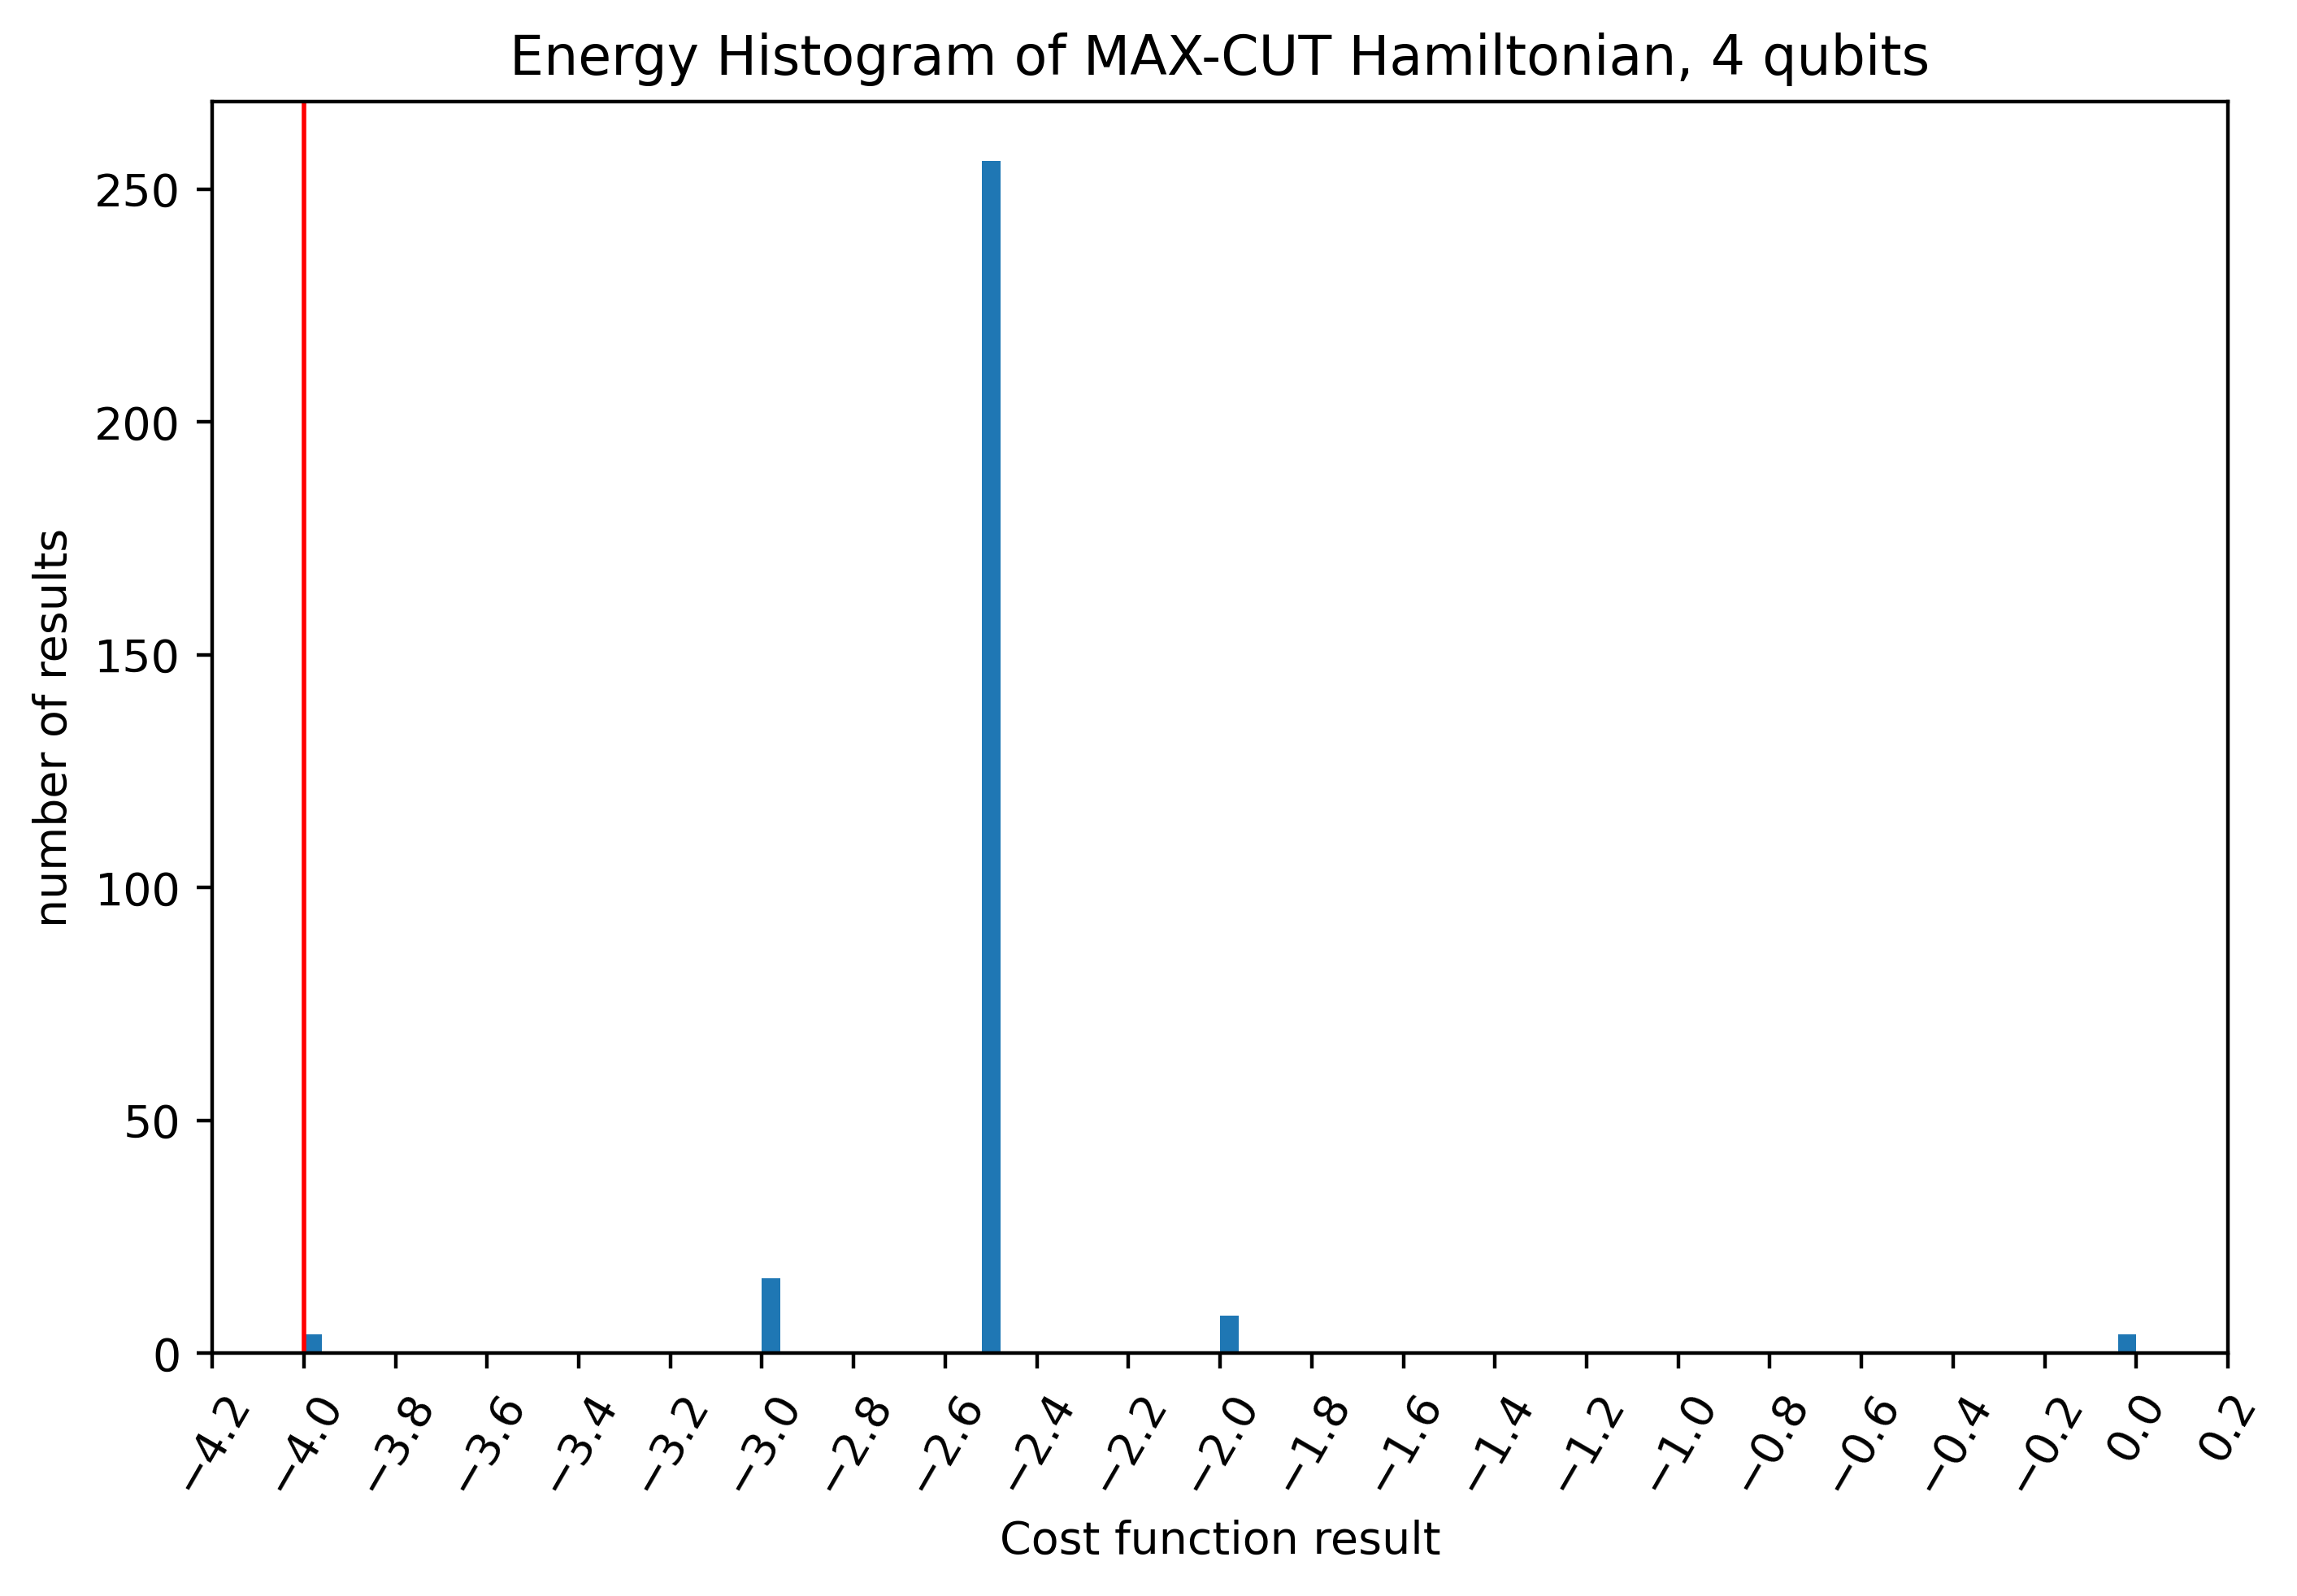

In [8]:
print("===Calculating Molecular Landscape===")
LiH_landscape_4q = run_and_record_landscape(LiH_ham_1_5, n_mub_qubits, desc="LiH, 1.5A, 4 qubits")

print("===Calculating Transverse Landscape===")
transverse_landscape_4q = run_and_record_landscape(transverse_ham_4q, n_mub_qubits, desc="Transverse Ising Hamiltonian, 4 qubits")

print("===Calculating Maxcut Landscape===")
maxcut_landscape_4q = run_and_record_landscape(maxcut_ham_4q, n_mub_qubits, desc="MAX-CUT Hamiltonian, 4 qubits")

## 8 qubit experiments
These experiments are run on two types of examples:
-   Hamiltonian reduction of a MAXCUT problem instance.
-   Transverse-Field Ising Model Hamiltonian.
-   An 8-qubit Molecular Hamiltonian.

For these, we will present:
-   The energy landscape sampled using all partial-MUB states, with no appended ansatz.

### Hamiltonian Generation

In [9]:
# half-MUB experiments
n_mub_qubits = 3
n_qubits = 8

import lih_8q_coeffs

#TODO: get the correct Hamiltonian from Dekel.
LiH_ham_1_5_8q = SparsePauliOp(
    data= lih_8q_coeffs.paulis, 
    coeffs = lih_8q_coeffs.coeffs
)
molecular_ground_energy_8q = get_exact_ground(LiH_ham_1_5_8q)

# Transverse Ising Hamiltonian
zz_coeff = random.uniform(0,1)
x_coeffs = random.uniform(0,1)
transverse_ham_8q = gen_trans_ising_op(n_qubits, zz_coeff, x_coeff)
transverse_ground_energy_8q = get_exact_ground(transverse_ham_8q)


# MAXCUT Hamiltonian
edges = [(0,4), (1,5), (2,6), (3,7), (0,7), (2,4)]
maxcut_ham_8q = gen_maxcut_op(n_qubits, edges)
maxcut_ground_energy_8q = get_exact_ground(maxcut_ham_8q)

ansatz_8q = get_twolocal(n_qubits, n_qubits)


### Calculate Landscape

===Calculating Molecular Landscape===
attempting all MUB states over the operator LiH, 1.5A, 8 qubits
Energy Landscape:


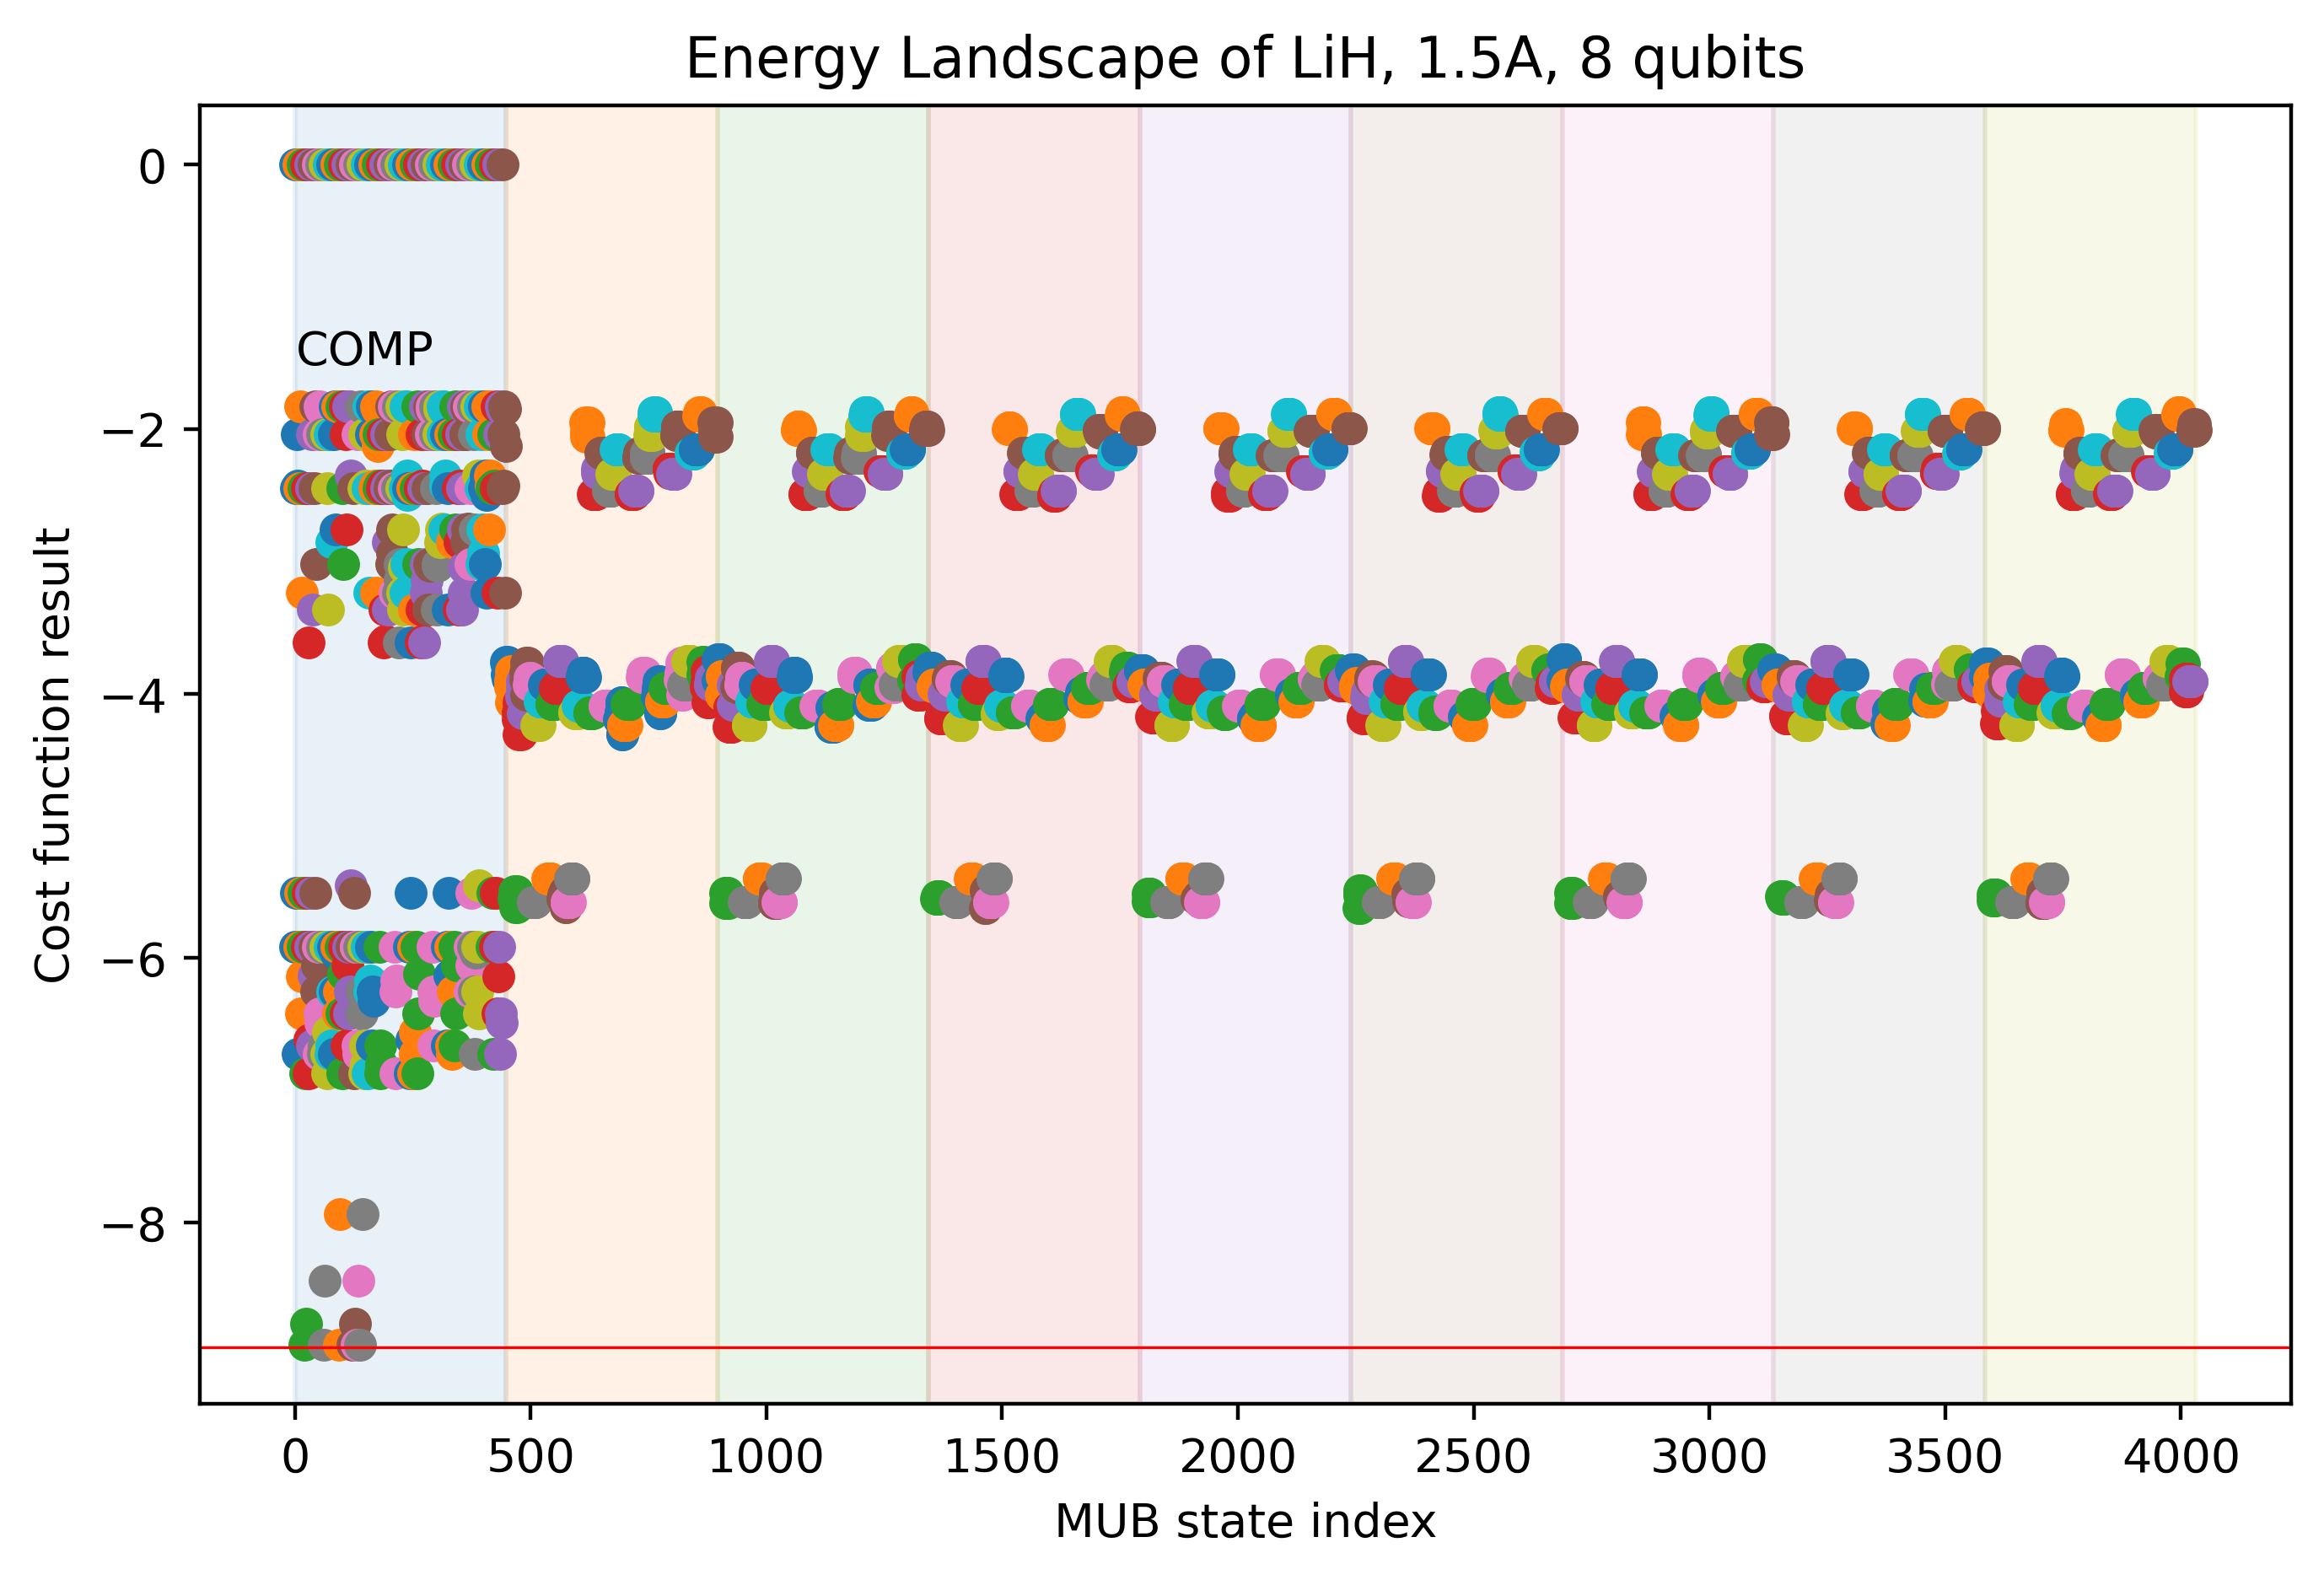

Energy Histogram:


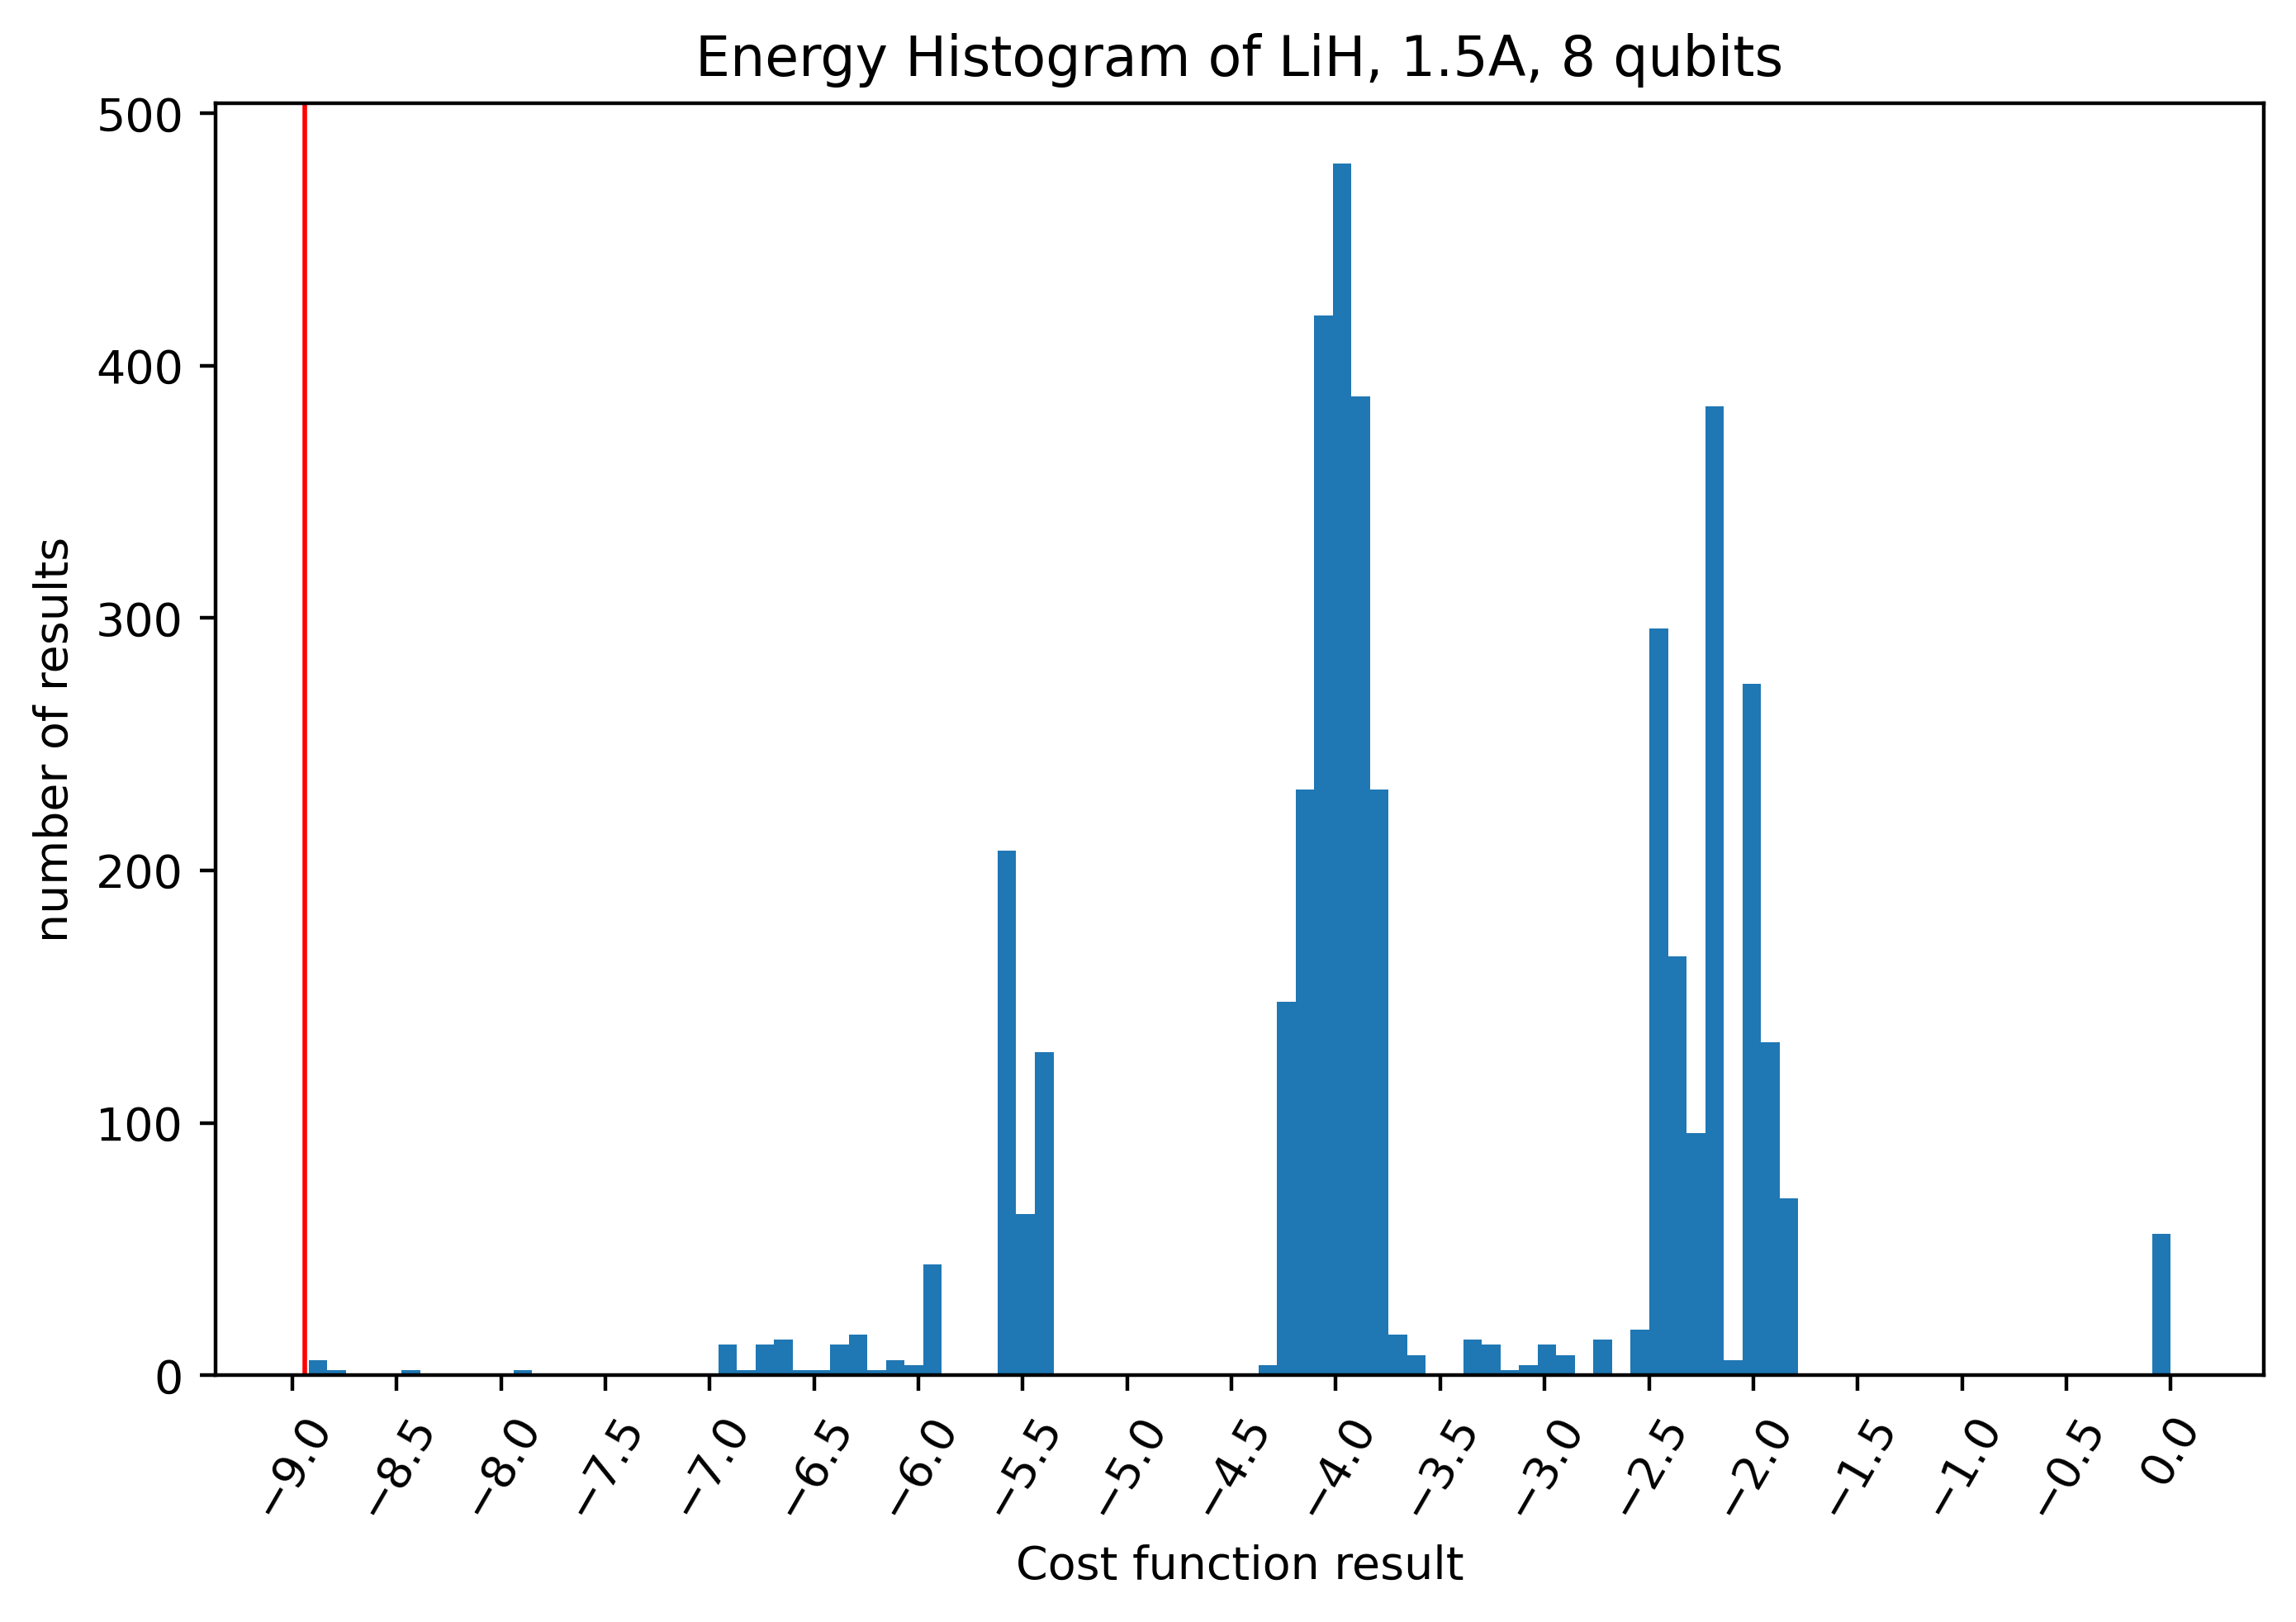

===Calculating Transverse Landscape===
attempting all MUB states over the operator Transverse Ising Hamiltonian, 8 qubits
Energy Landscape:


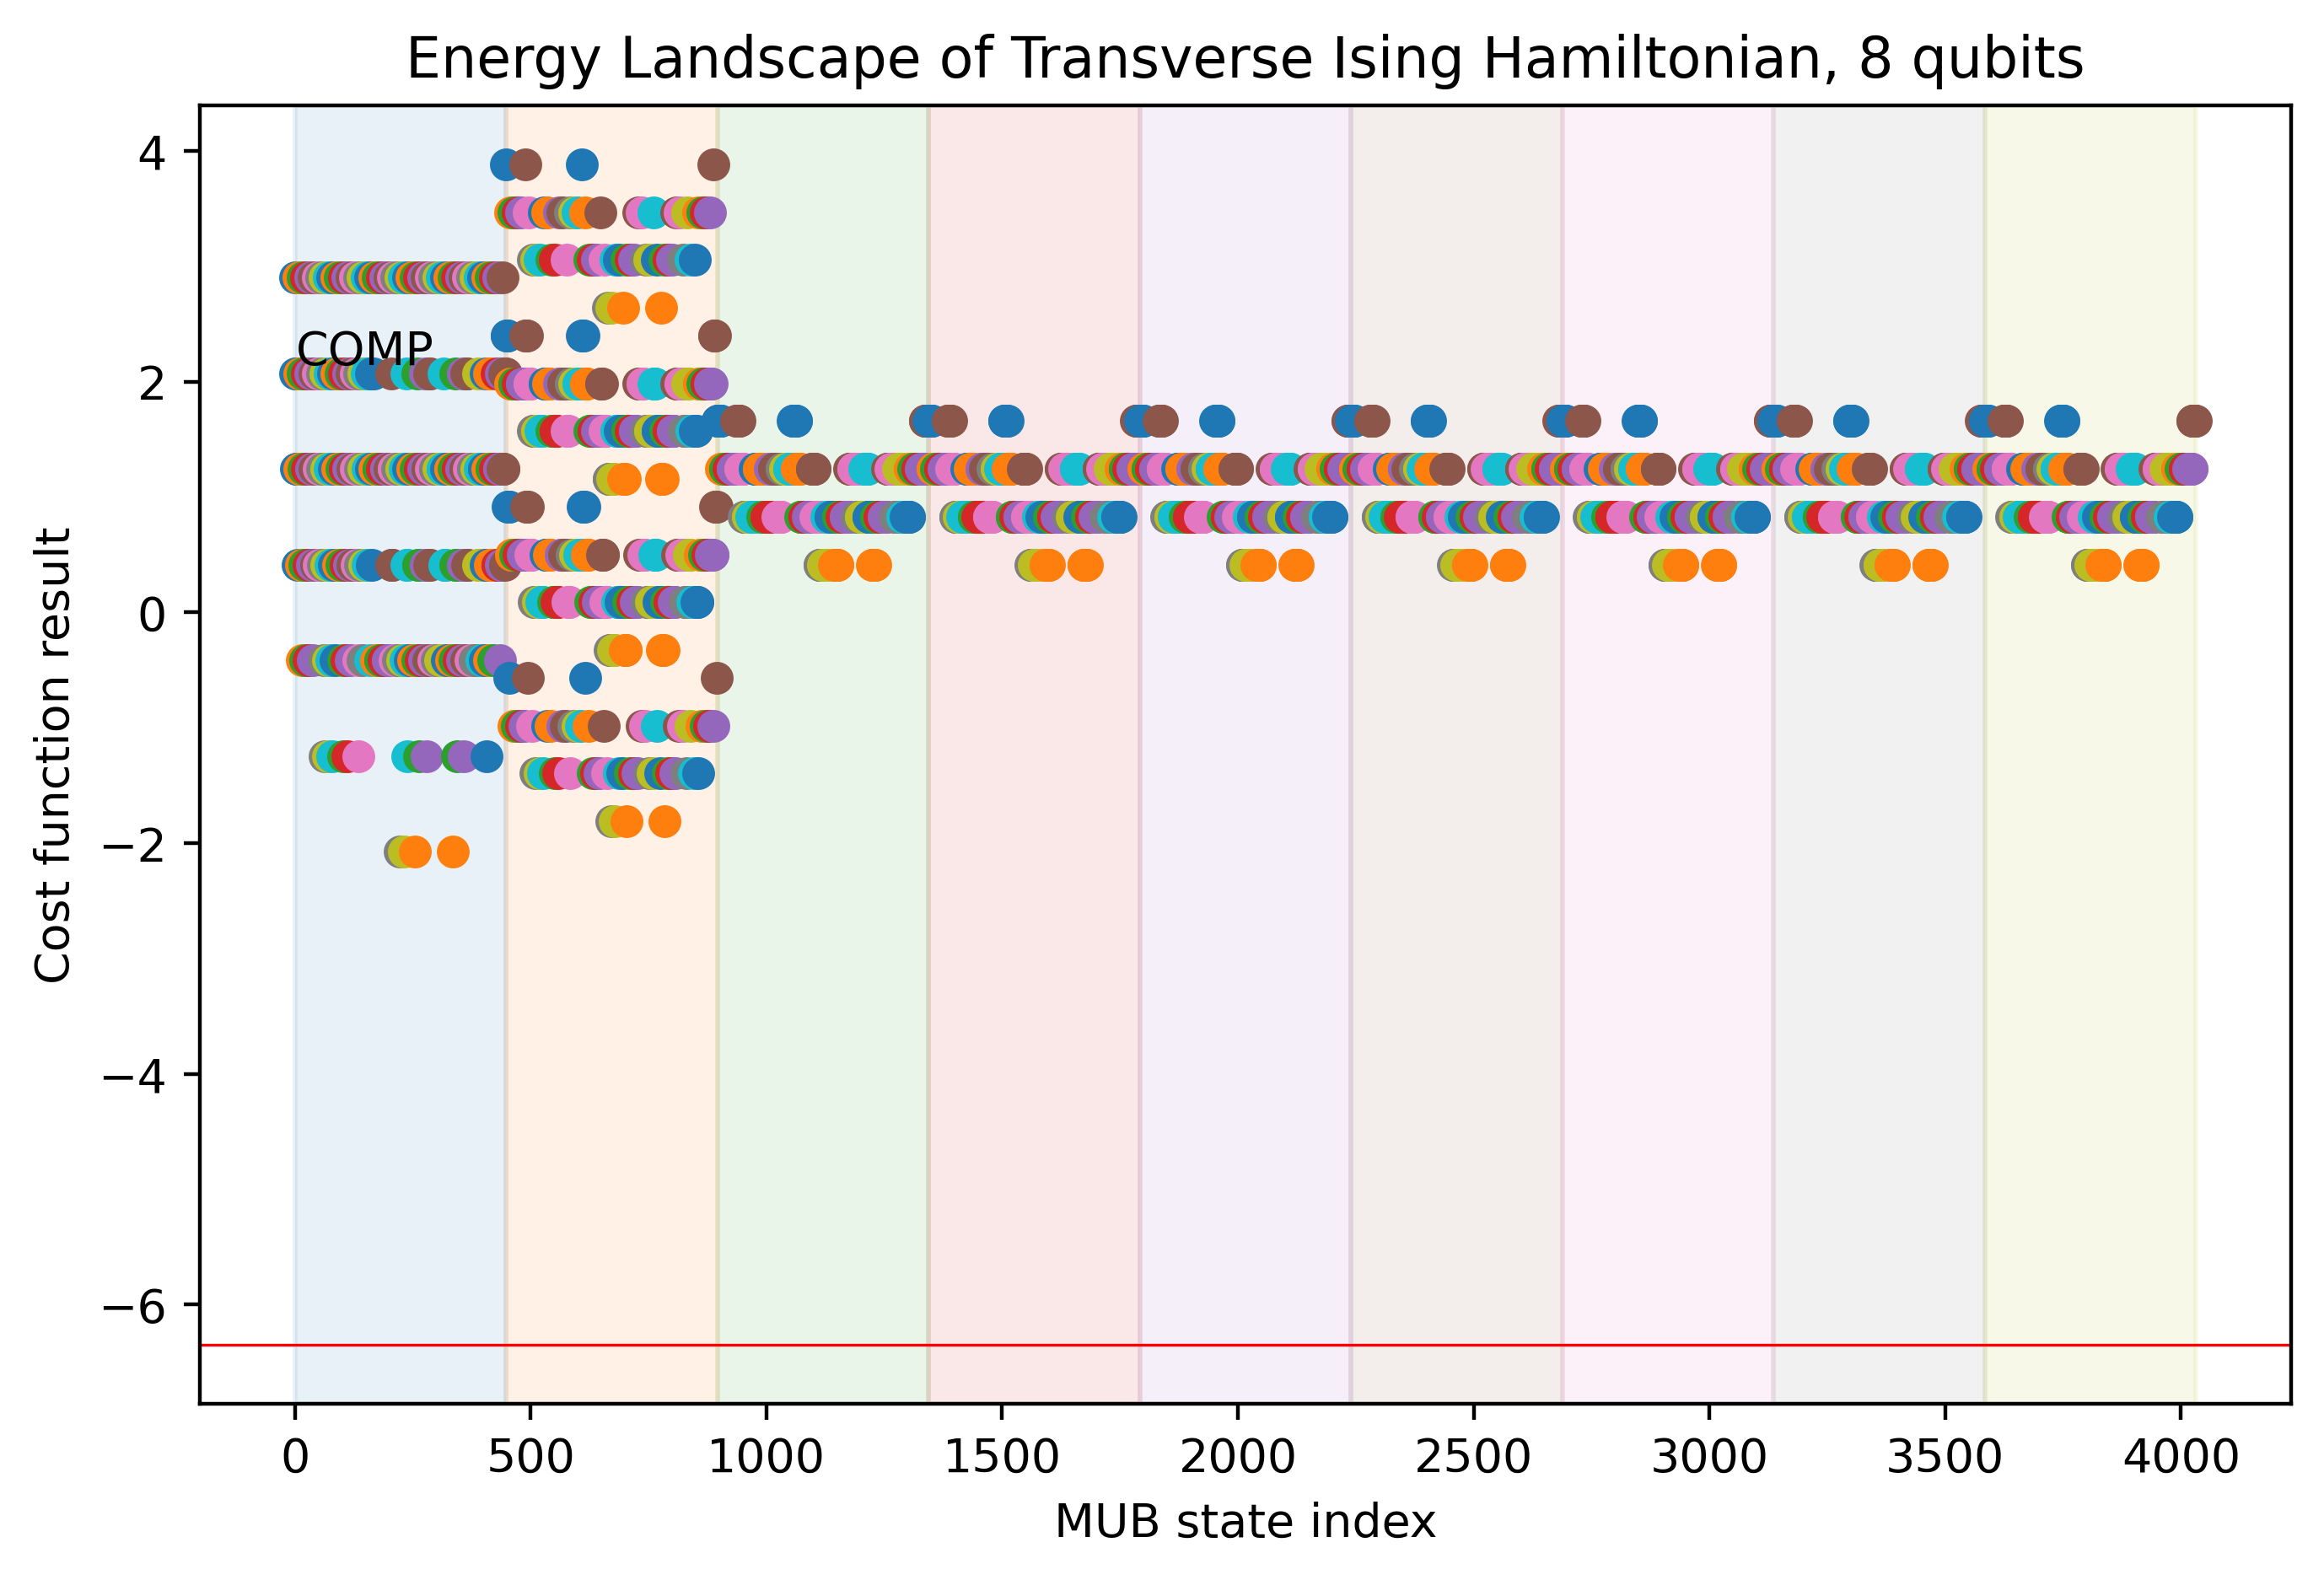

Energy Histogram:


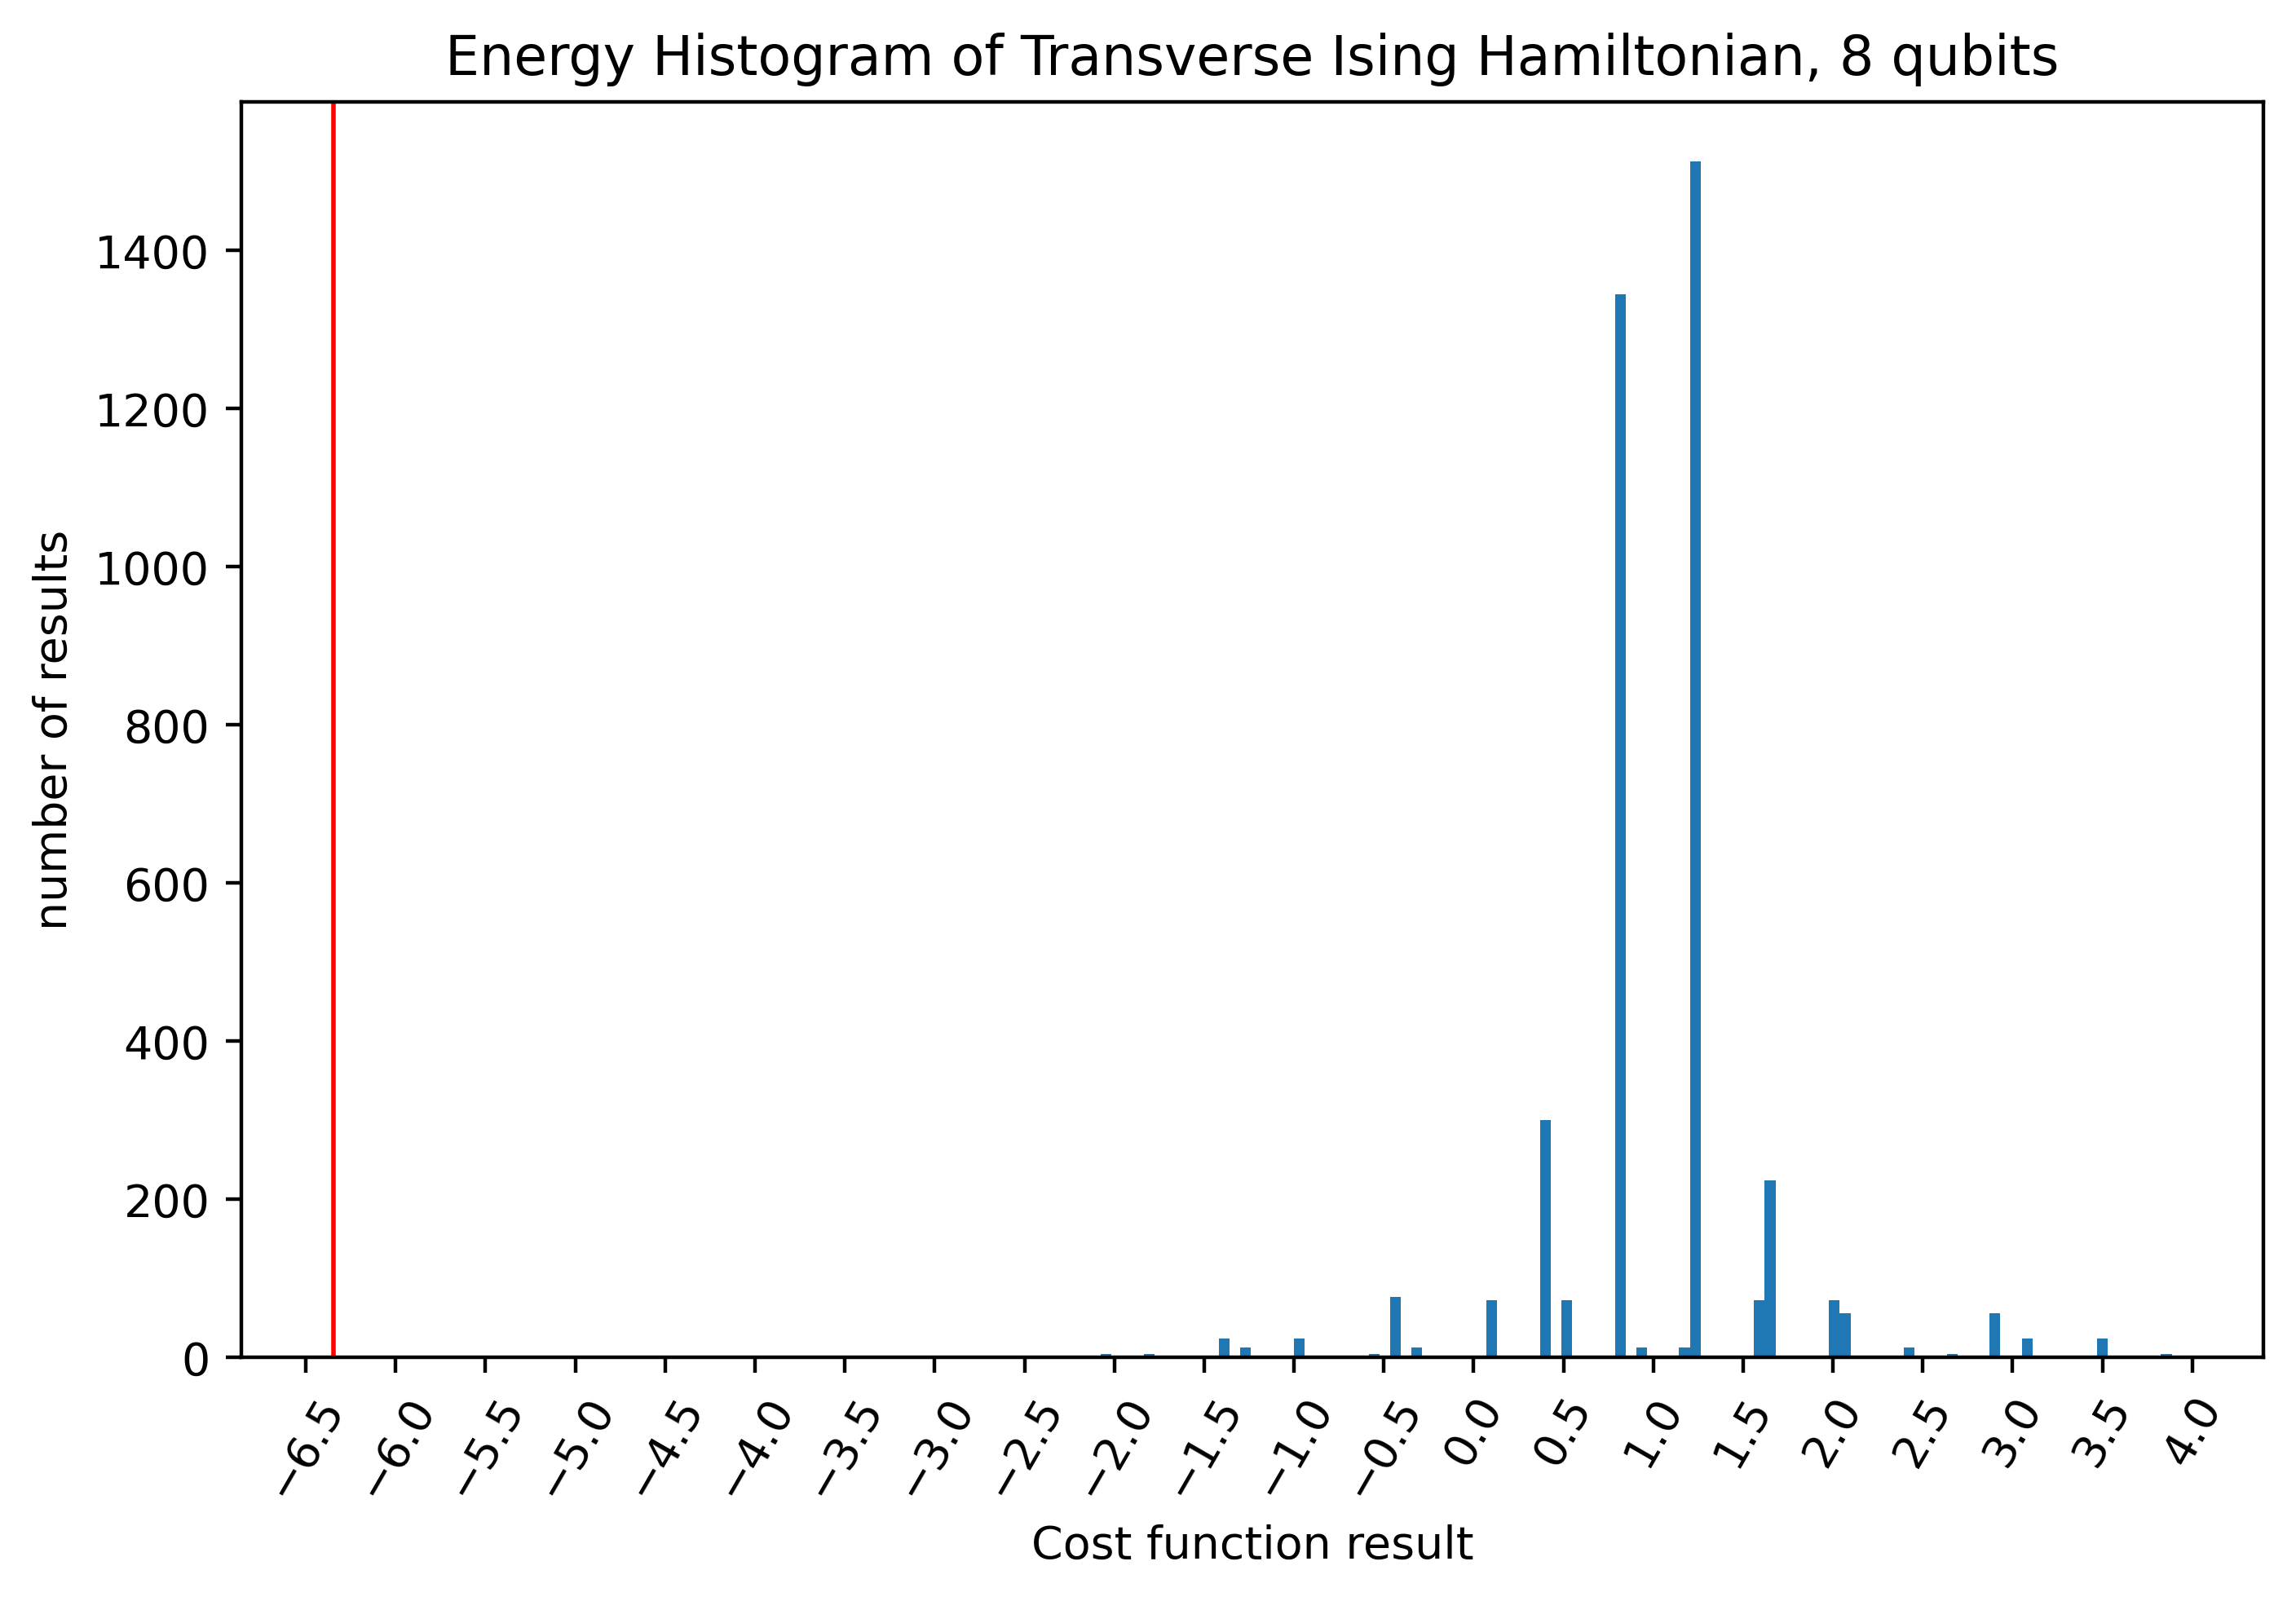

===Calculating Maxcut Landscape===
attempting all MUB states over the operator MAX-CUT Hamiltonian, 8 qubits
Energy Landscape:


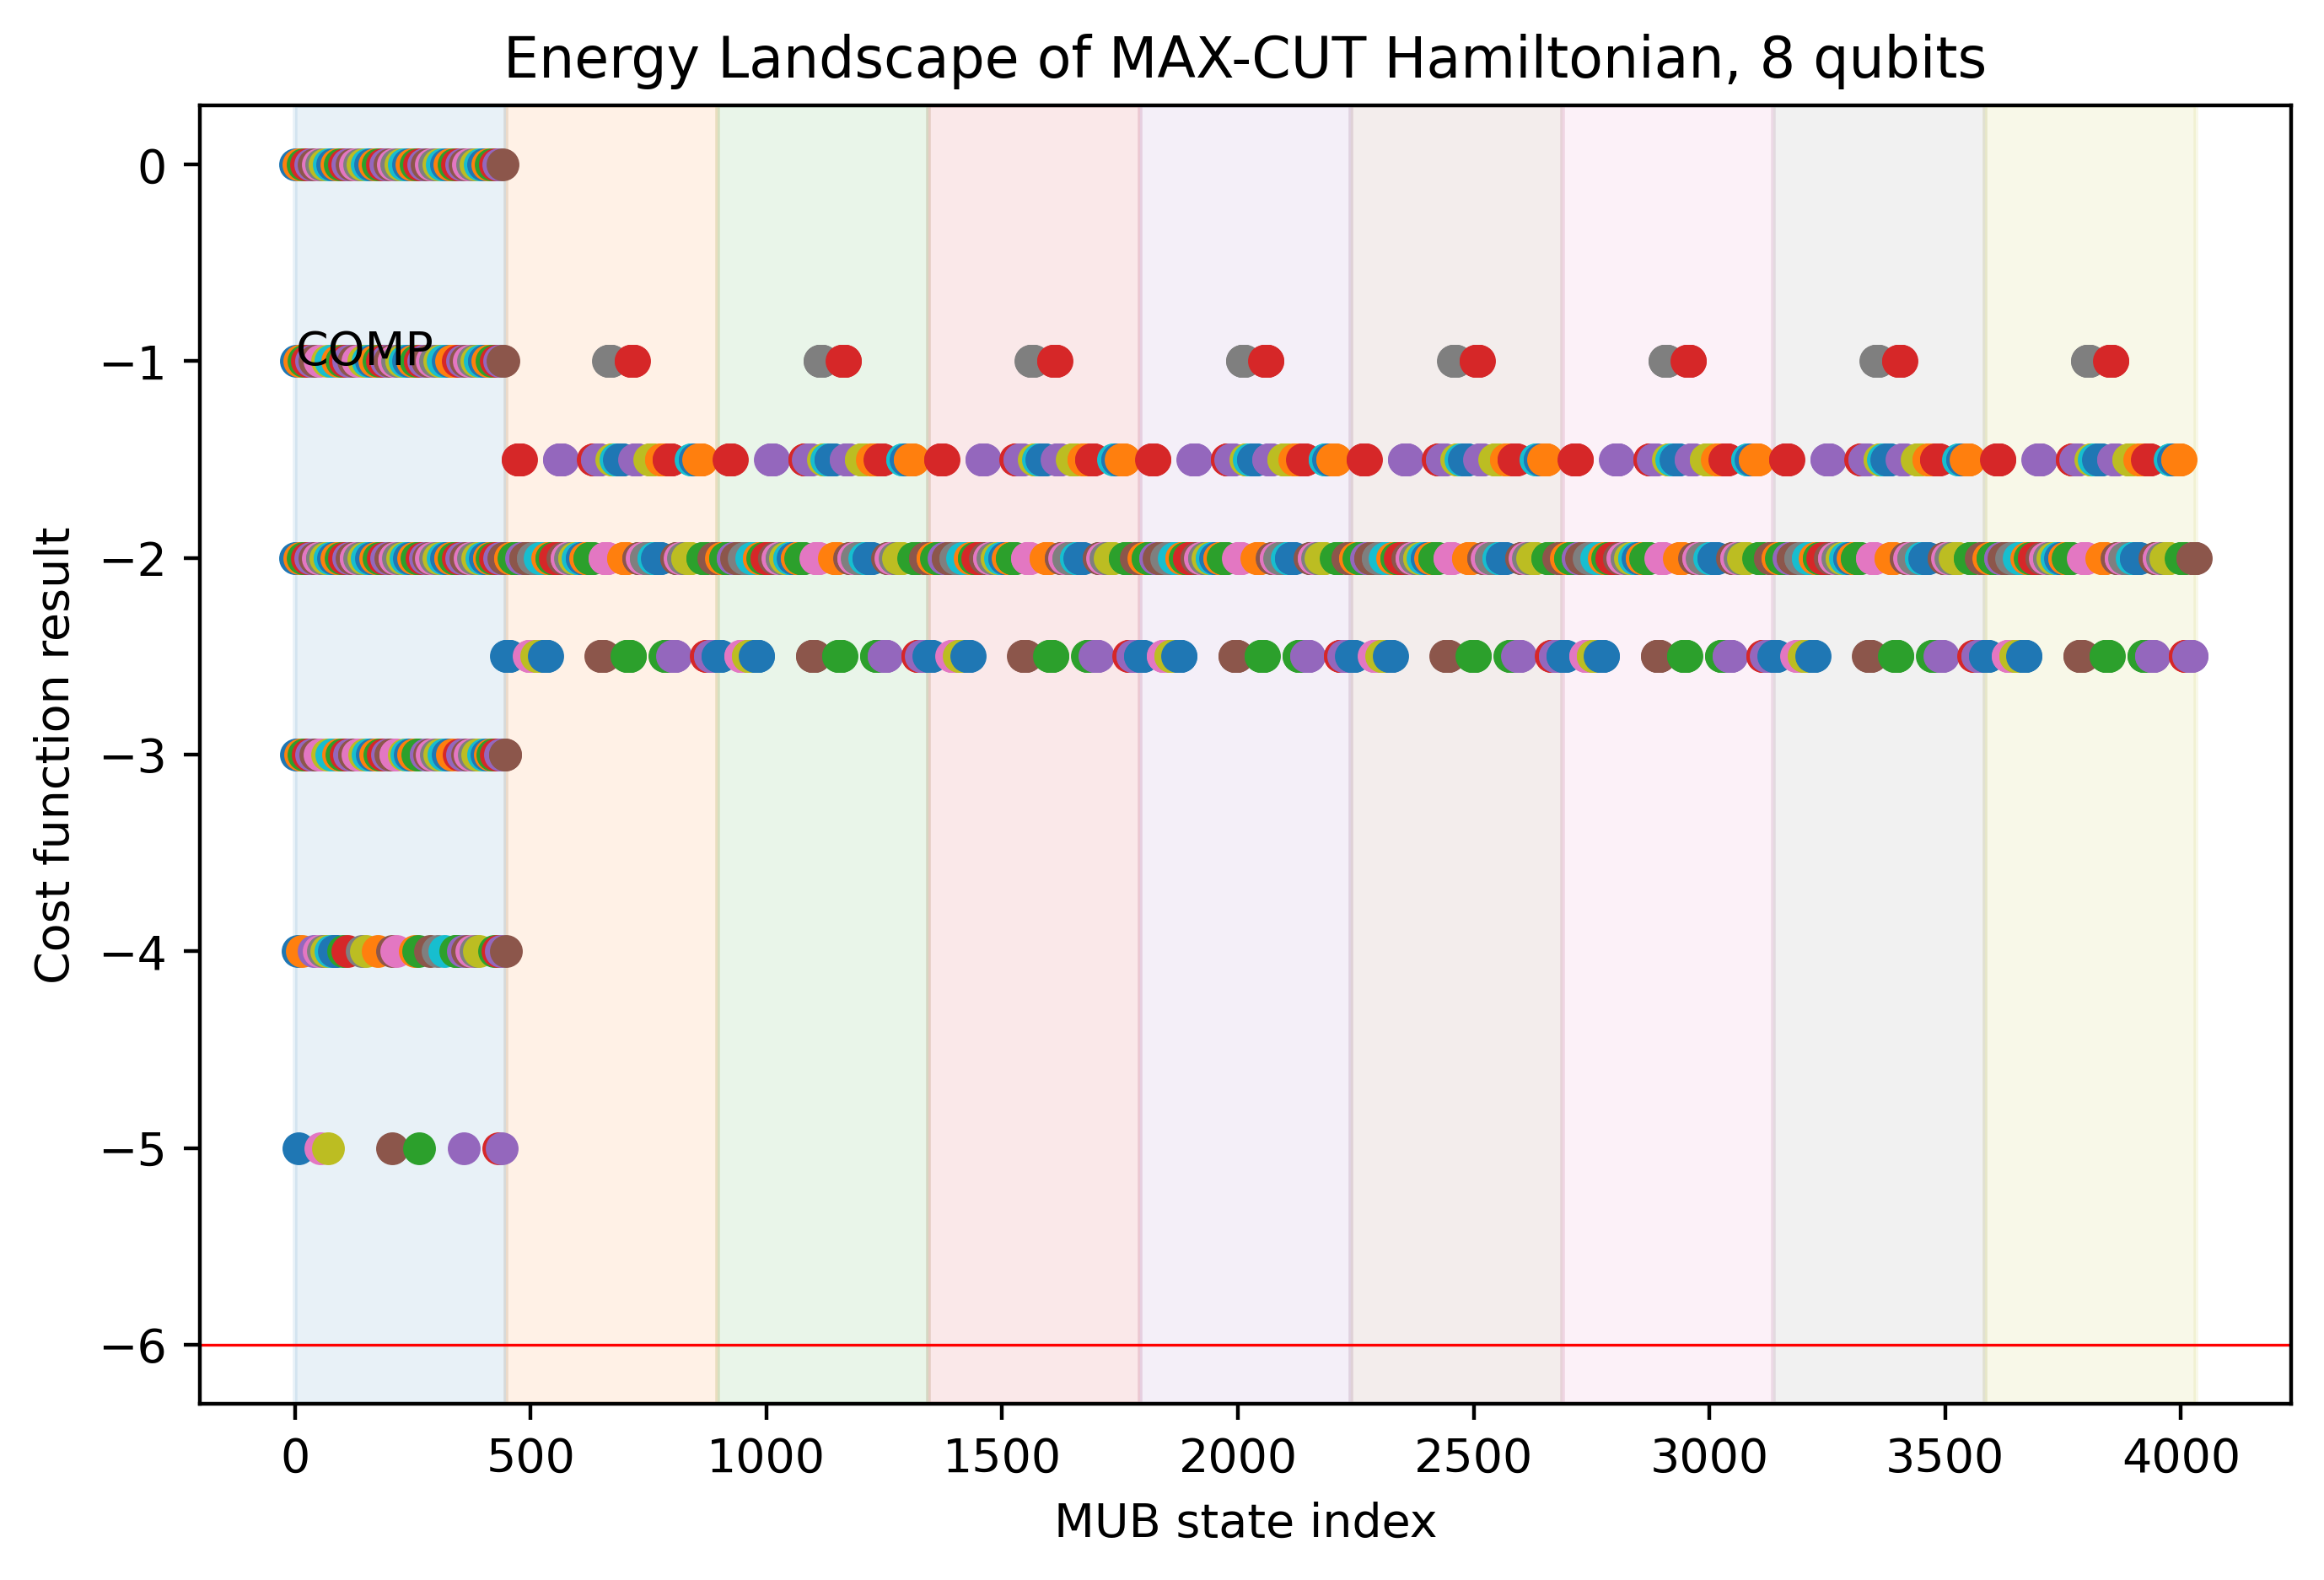

Energy Histogram:


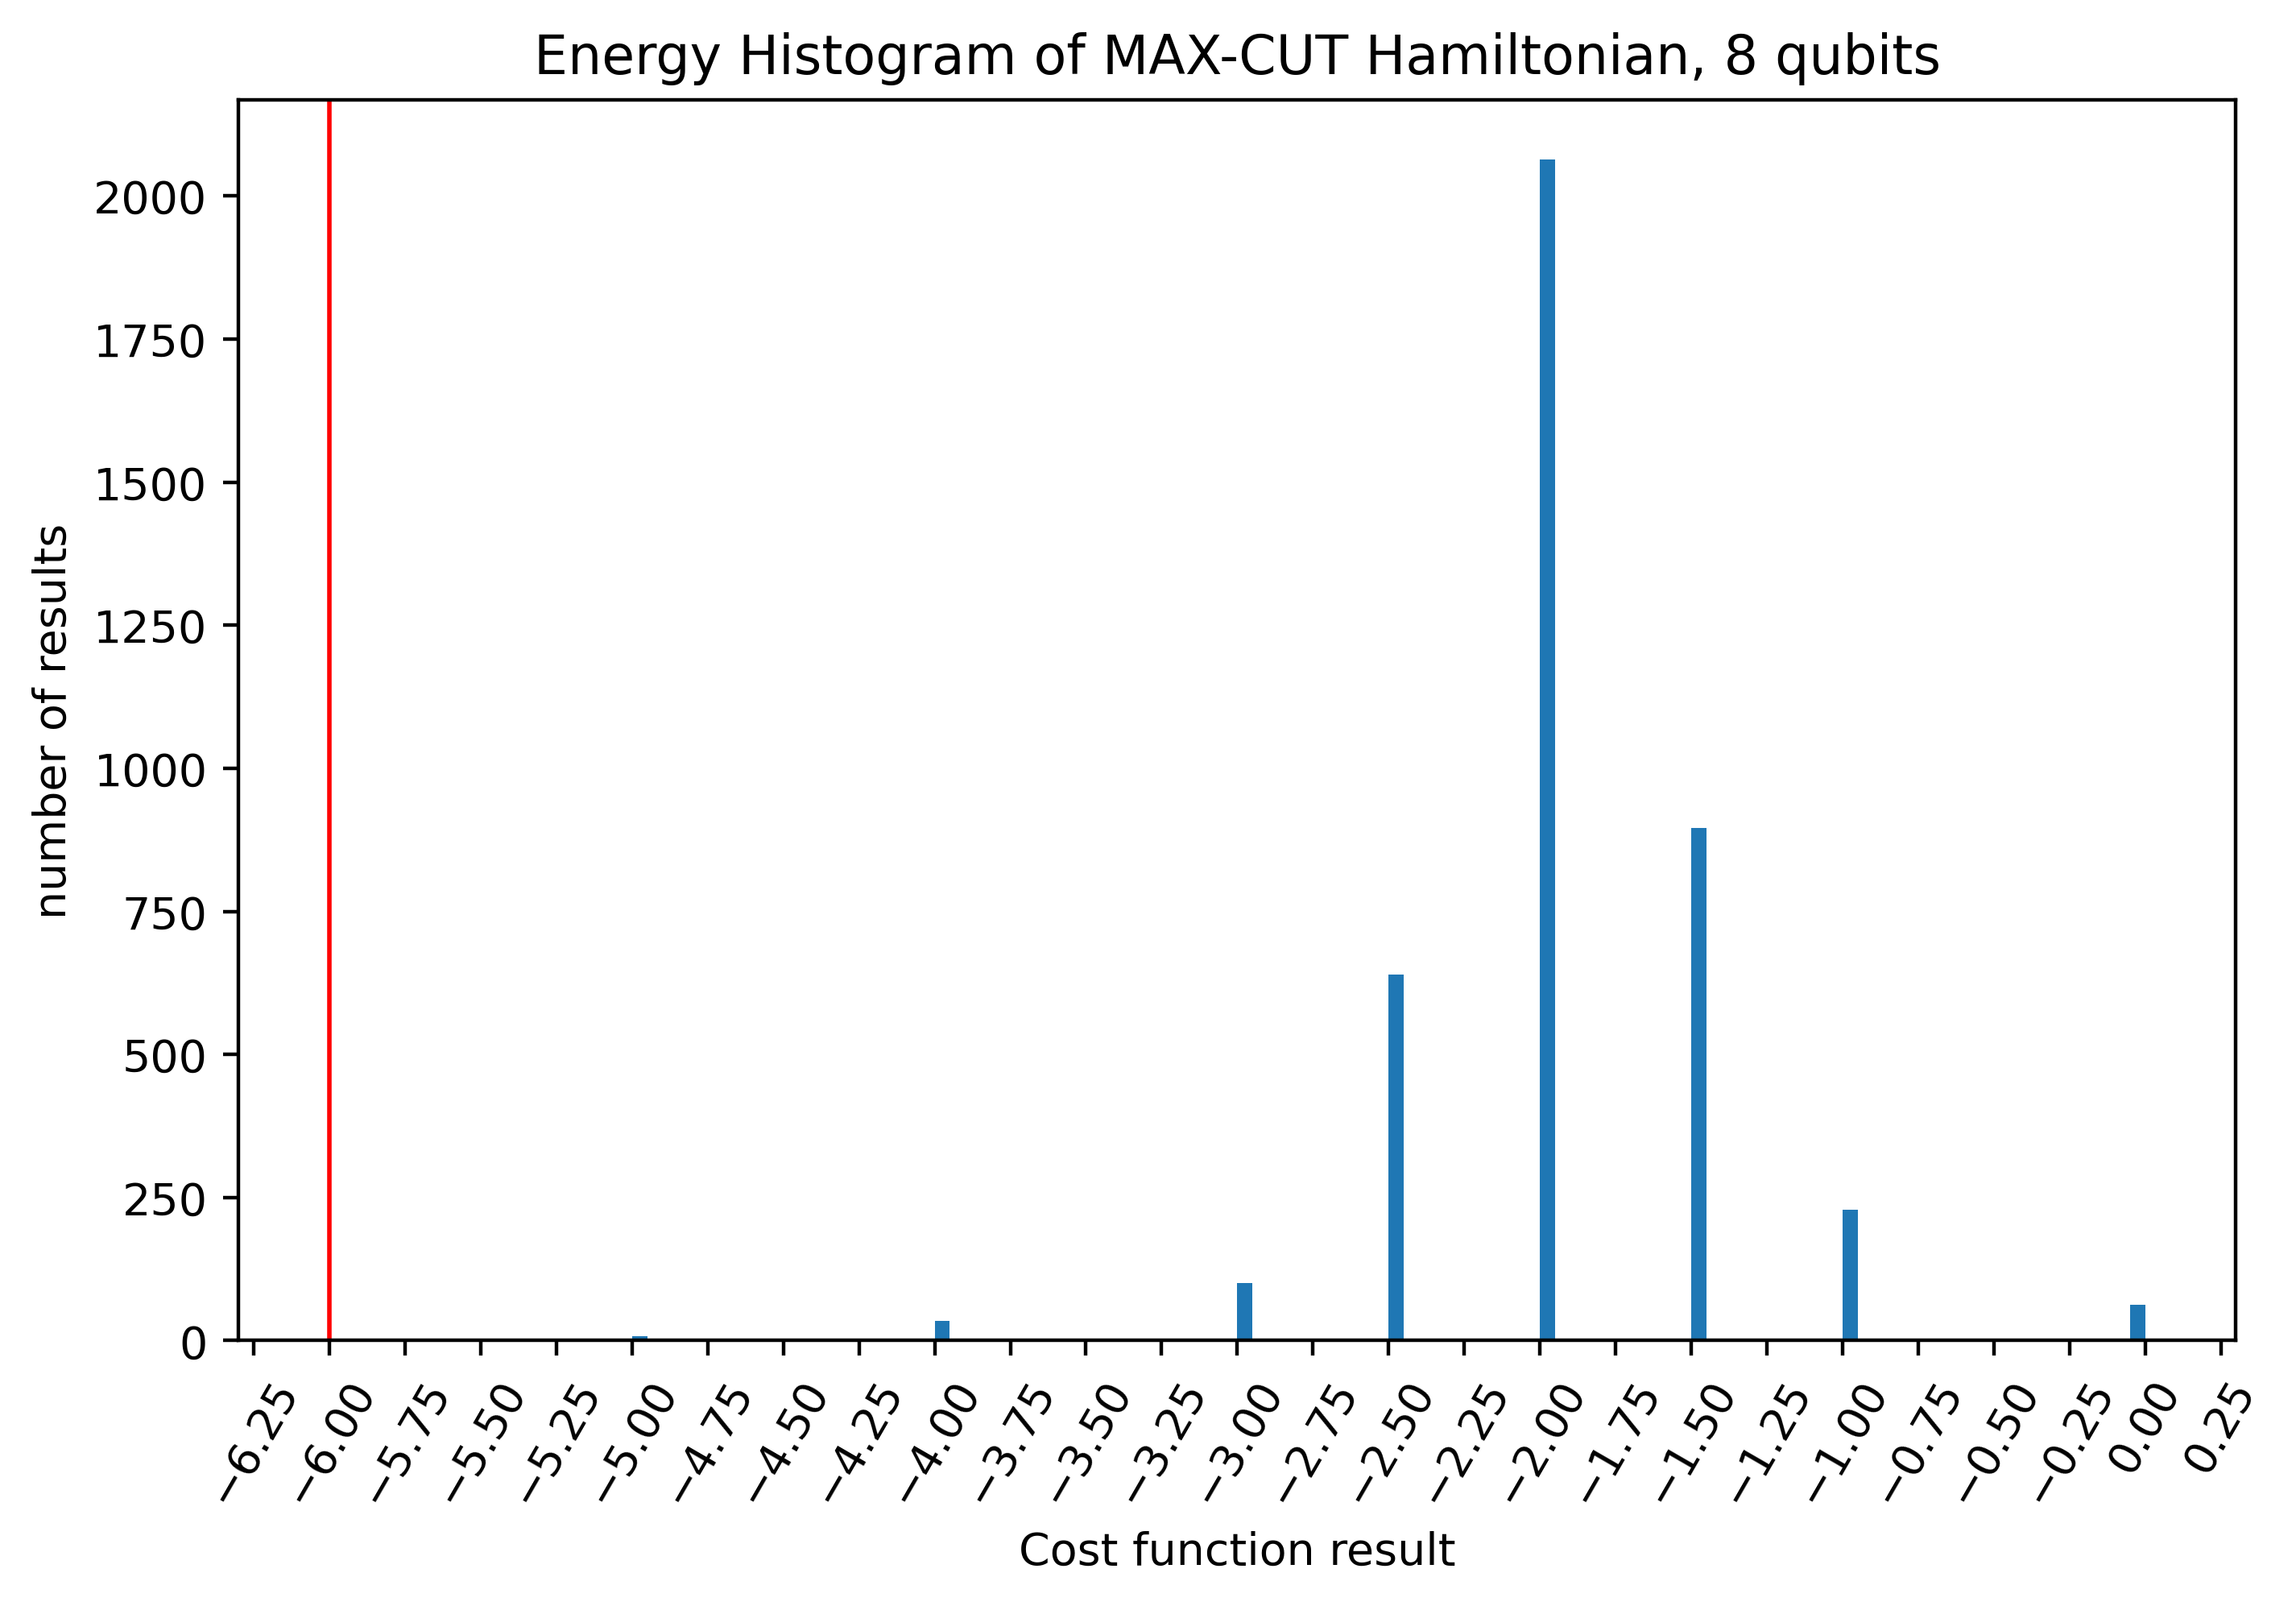

In [10]:
print("===Calculating Molecular Landscape===")
LiH_landscape_8q = run_and_record_landscape(LiH_ham_1_5_8q, n_mub_qubits, desc="LiH, 1.5A, 8 qubits")

print("===Calculating Transverse Landscape===")
transverse_landscape_8q = run_and_record_landscape(transverse_ham_8q, n_mub_qubits, desc="Transverse Ising Hamiltonian, 8 qubits")

print("===Calculating Maxcut Landscape===")
maxcut_landscape_8q = run_and_record_landscape(maxcut_ham_8q, n_mub_qubits, desc="MAX-CUT Hamiltonian, 8 qubits")

# VQE Execution

For each of the Hamiltonians we want to check, we define 3 graphs:
-   show the VQE evolution from the best $m$ MUB landscape points.
-   show the VQE evolution from the best $k$ and worst $k$ MUB landscape points.
-   show the VQE evolution from the best $k$ MUB landscape points and best $k$ random theta vector samples. (theta vector pool the same size as landscaping pool size)

### 2 qubits: Molecular Example

The operator SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ', 'XX'],
              coeffs=[-1.06324002+0.j,  0.38913654+0.j, -0.38913654+0.j, -0.01121274+0.j,
  0.18206025+0.j]) has the exact value -1.851311285646772.
Now trying to reach the value from the best and worst landscape points.
20: -1.8404198601162125
40: -1.8509294001100383
20: -1.645752678672896
40: -1.84360264852992
60: -1.8500795114494717
80: -1.8507906892954742
20: -1.4785885831588912
40: -1.835894116455512
60: -1.8497672561218703
80: -1.8509310684725484
100: -1.8511522945404213
20: -1.832550336244683
40: -1.8503603981220644
60: -1.8512017751794545
20: -1.760117294067573
40: -1.8308417786742266
60: -1.835130844553523
80: -1.8391369225196708
100: -1.8455500869842087
20: -1.8439674549750025
40: -1.8491264560459502
60: -1.8508076567837408
80: -1.8510282799783362


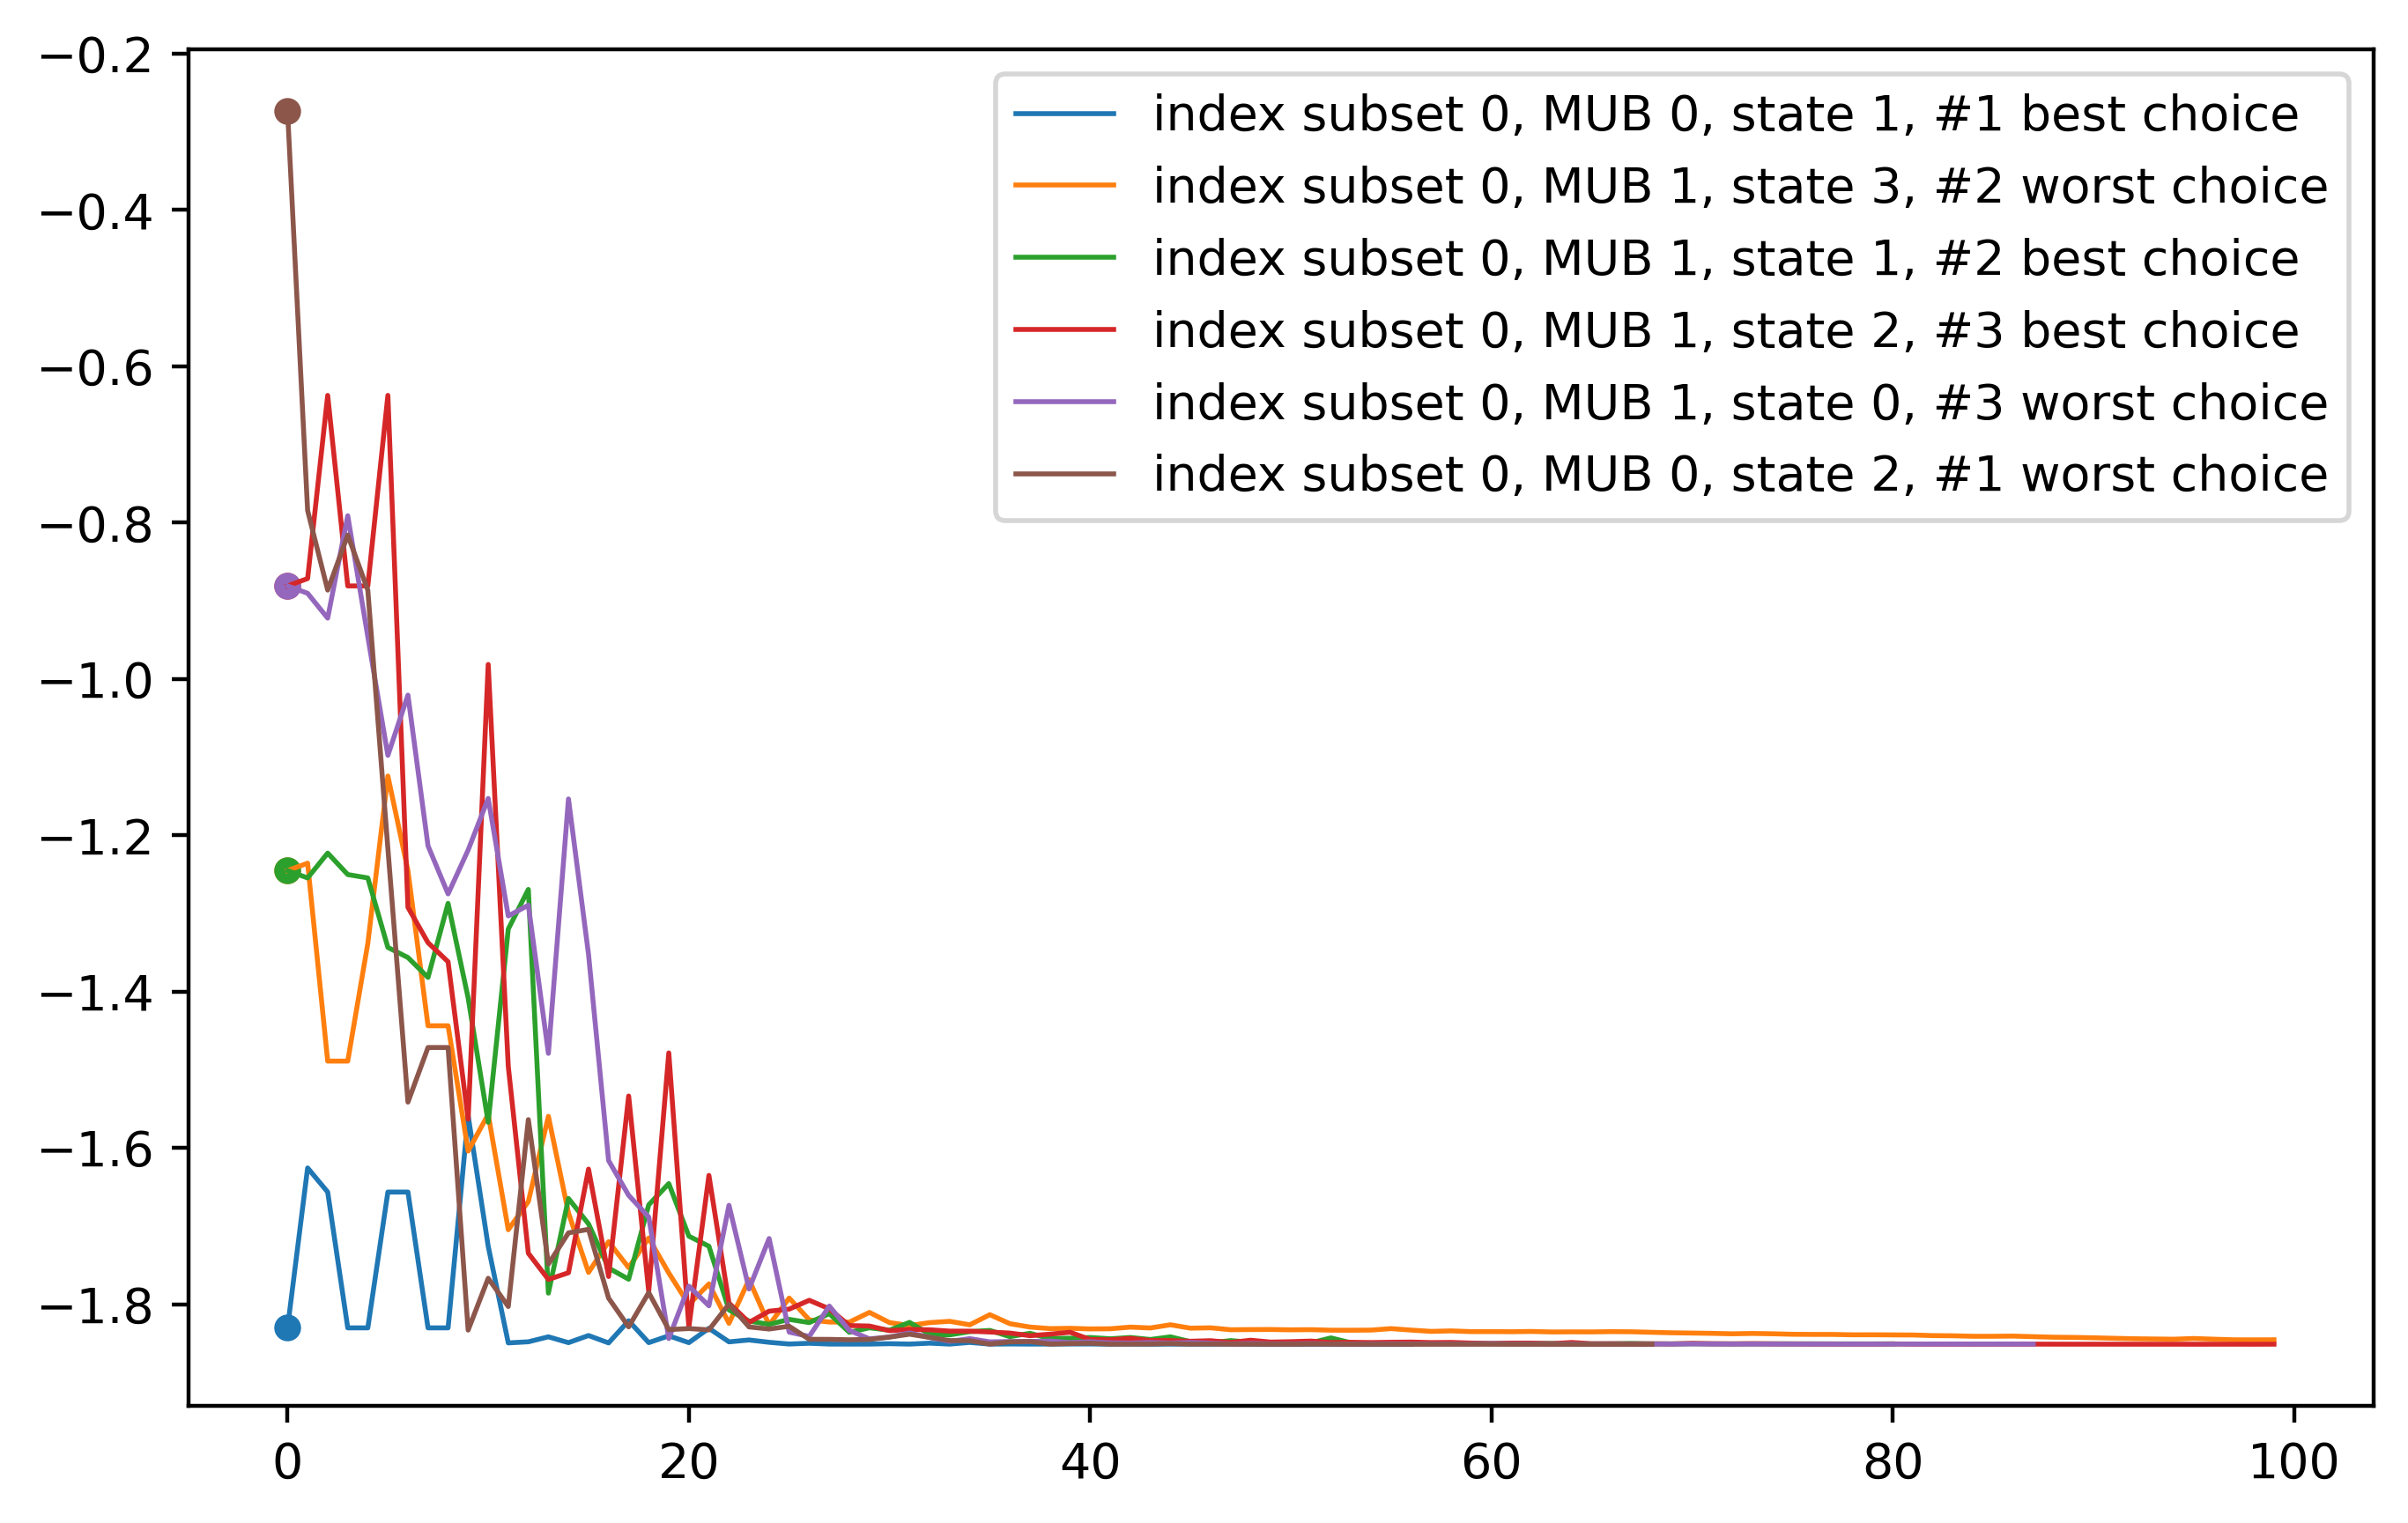

The operator SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ', 'XX'],
              coeffs=[-1.06324002+0.j,  0.38913654+0.j, -0.38913654+0.j, -0.01121274+0.j,
  0.18206025+0.j]) has the exact value -1.851311285646772.
Now trying to reach the value from the best and worst landscape points.
20: -1.8404198601162125
40: -1.8509294001100383
20: -1.645752678672896
40: -1.84360264852992
60: -1.8500795114494717
80: -1.8507906892954742
20: -1.4785885831588912
40: -1.835894116455512
60: -1.8497672561218703
80: -1.8509310684725484
100: -1.8511522945404213
20: -1.832550336244683
40: -1.8503603981220644
60: -1.8512017751794545
20: -1.760117294067573
40: -1.8308417786742266
60: -1.835130844553523
80: -1.8391369225196708
100: -1.8455500869842087
20: -1.8439674549750025
40: -1.8491264560459502
60: -1.8508076567837408
80: -1.8510282799783362


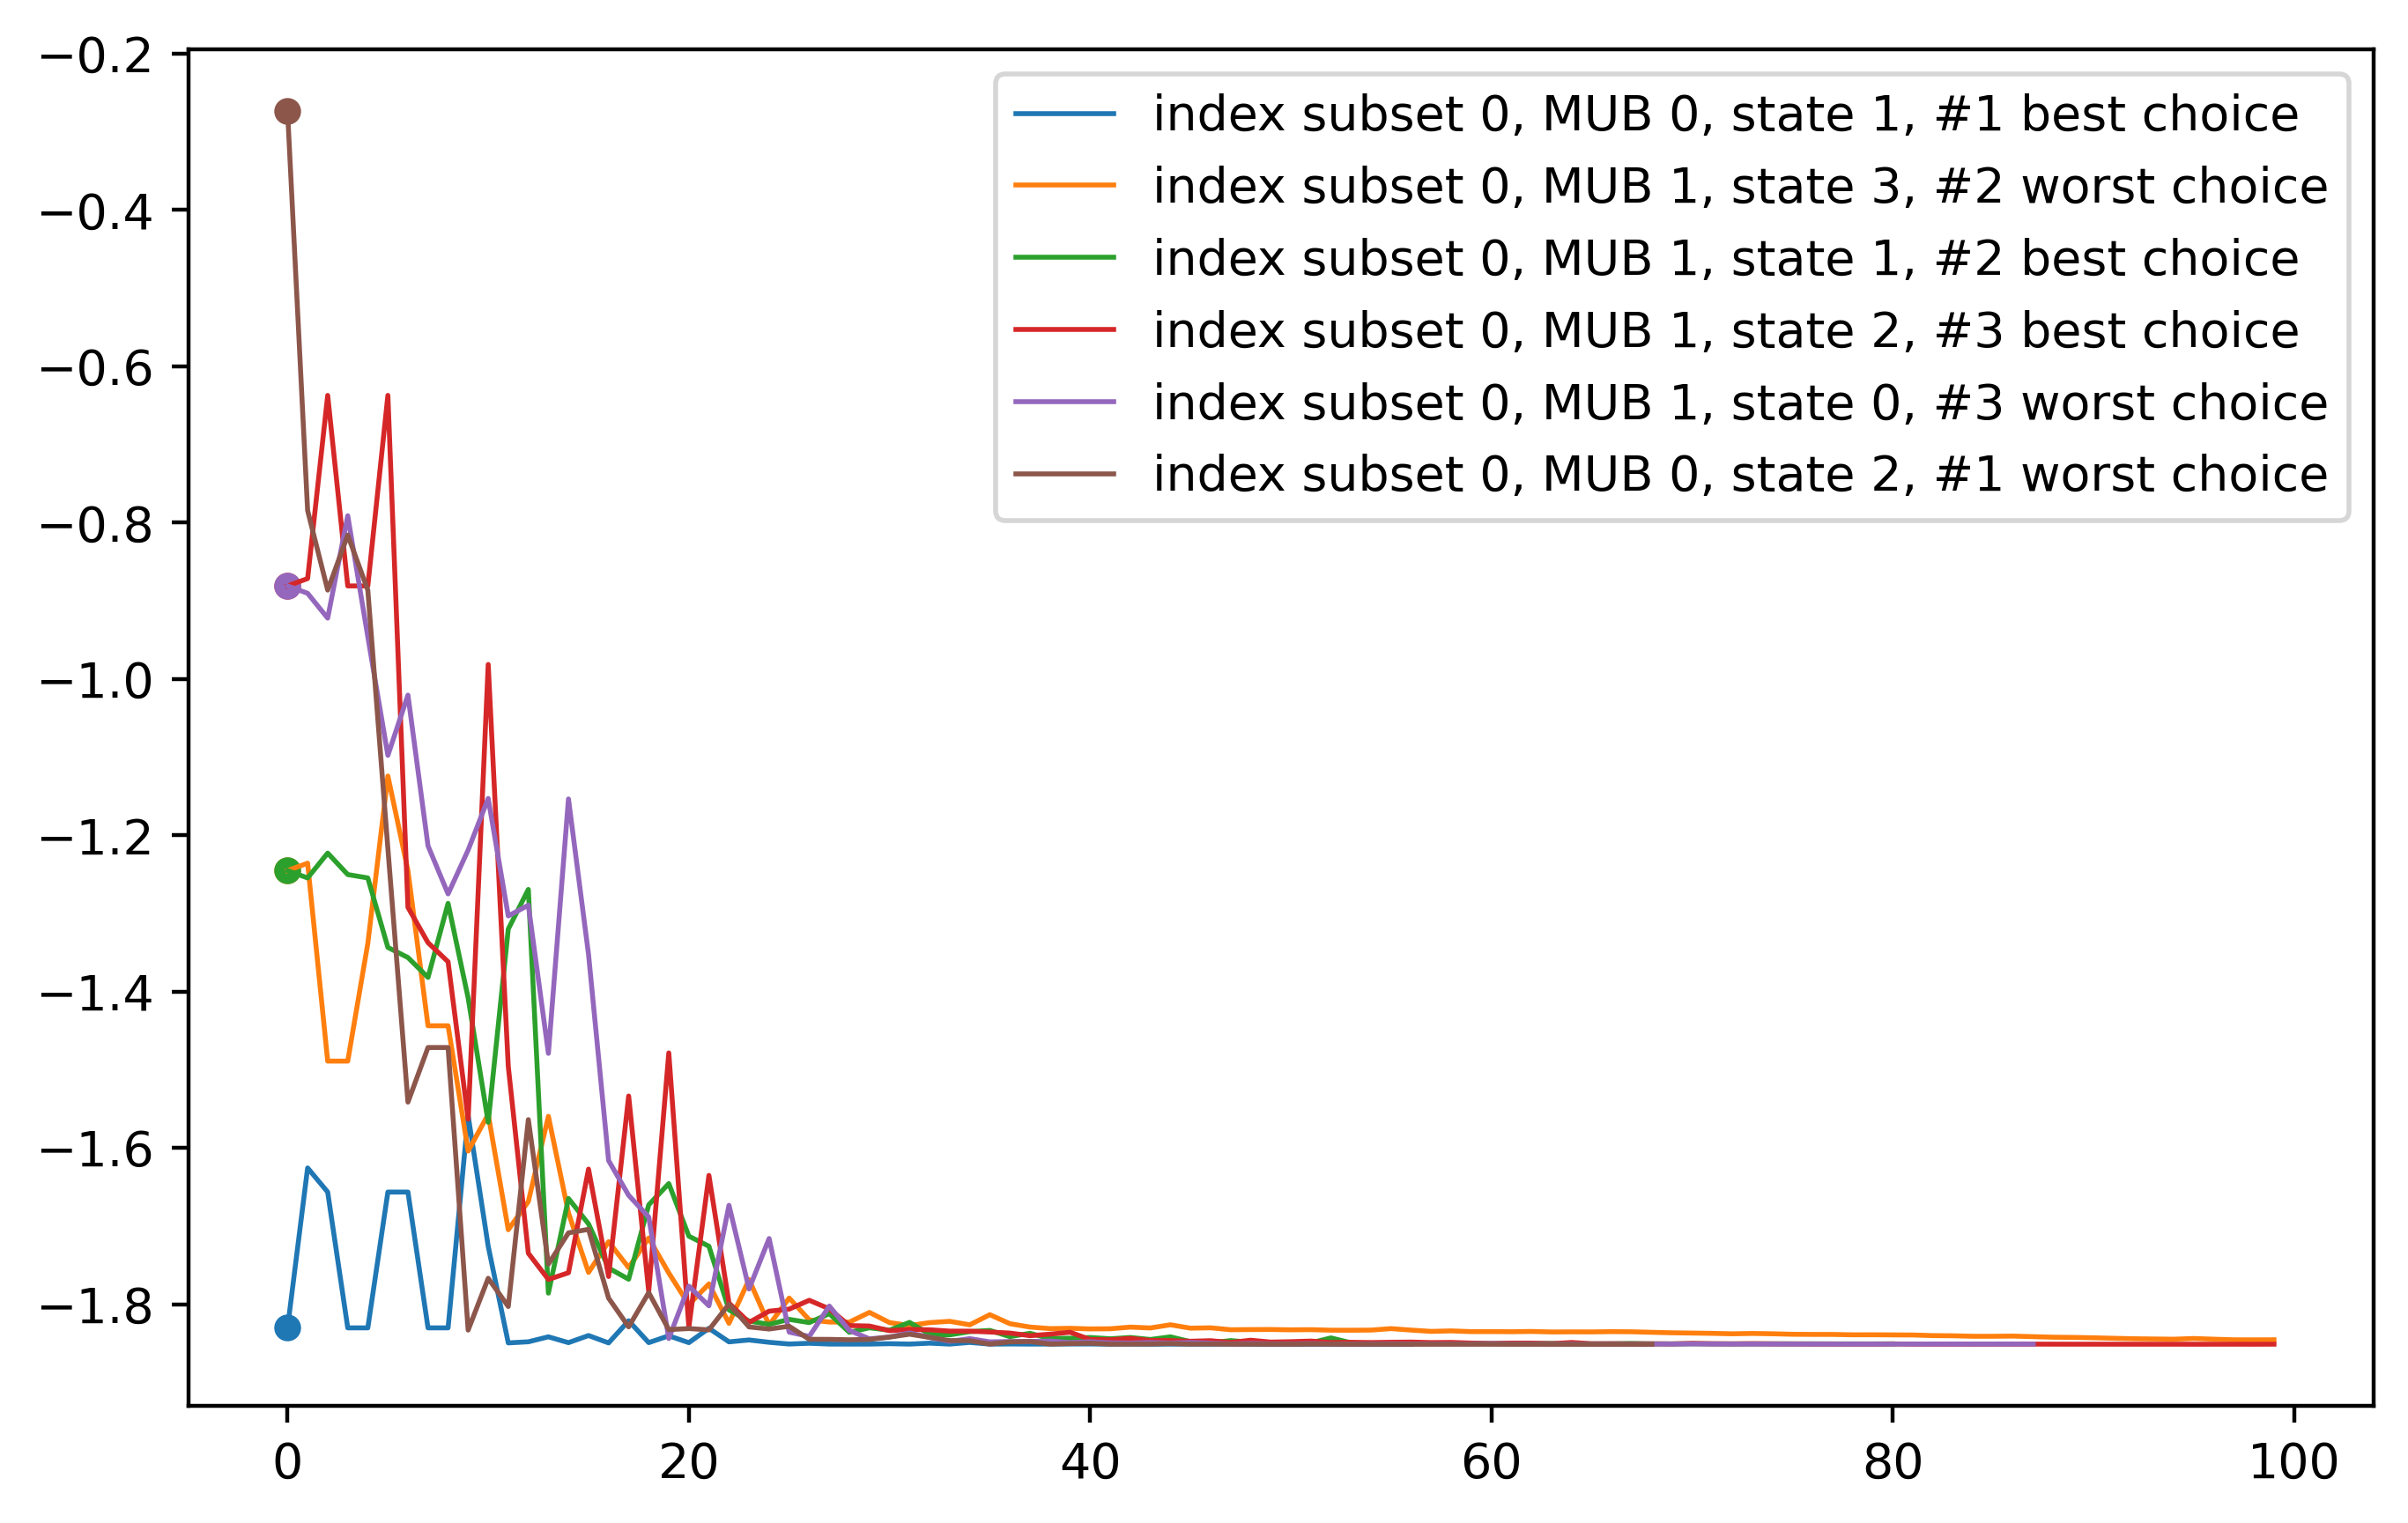

In [11]:
ham = molecular_hams_2q[0]
landscape = molecular_landscapes_2q[0]
best_vs_worst_runs = run_and_display_vqe_best_and_worst_expressive_2q(landscape, k=3)
best_vs_random_runs = run_and_display_vqe_best_and_worst_expressive_2q(landscape, k=3)


### 3 Qubits: Transverse Ising Example

The operator SparsePauliOp(['ZZI', 'IZZ', 'XII', 'IXI', 'IIX'],
              coeffs=[0.62290169+0.j, 0.62290169+0.j, 0.74178699+0.j, 0.74178699+0.j,
 0.74178699+0.j]) has the exact value -2.485200284005004.
Now trying to reach the value from the best and worst landscape points.
200: -2.4591124197274046
400: -2.484950059302359
200: -2.3827379696178106
400: -2.478929810138348
600: -2.4841651603028545
200: -2.4668396353074815
400: -2.4848852056247477
200: -2.397134676153402
400: -2.4809254987708353
600: -2.4848767317253273


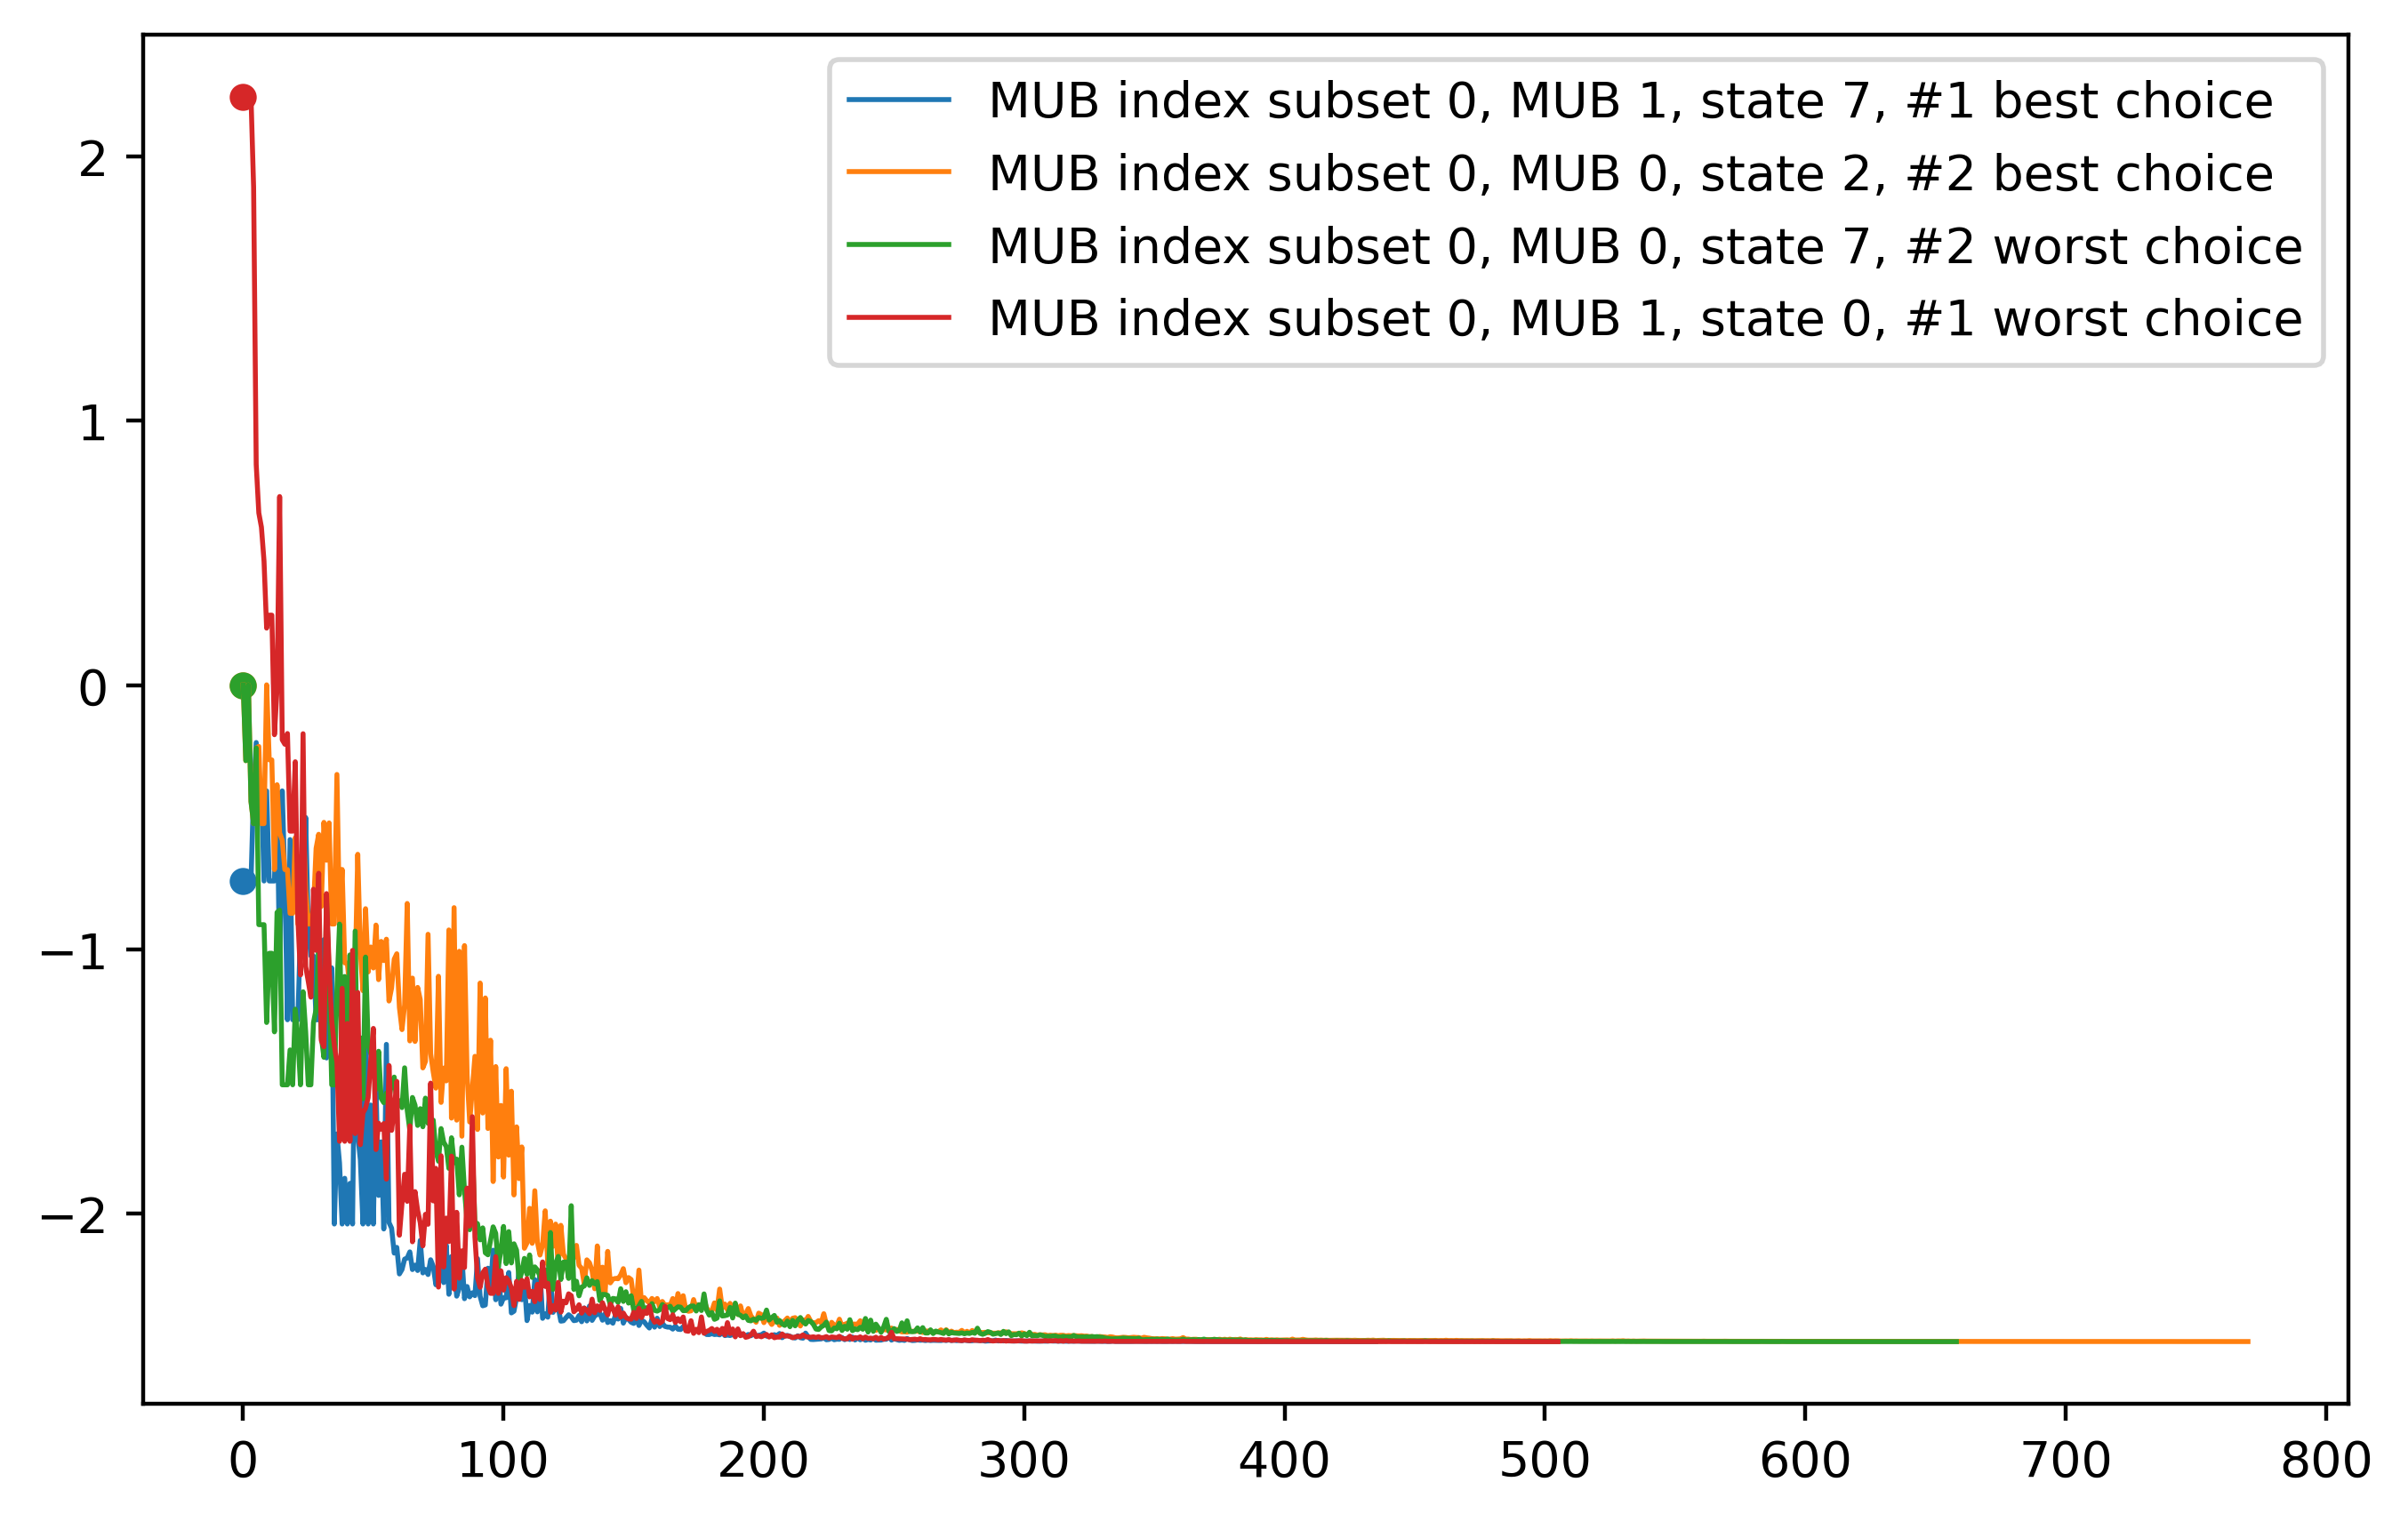

200: -2.4591124197274046
400: -2.484950059302359
200: -2.3827379696178106
400: -2.478929810138348
600: -2.4841651603028545
200: -2.327761425677754
400: -2.4692377304556734
600: -2.4802792393762374
800: -2.484539703655746
200: -2.410270238960832
400: -2.481139870508705


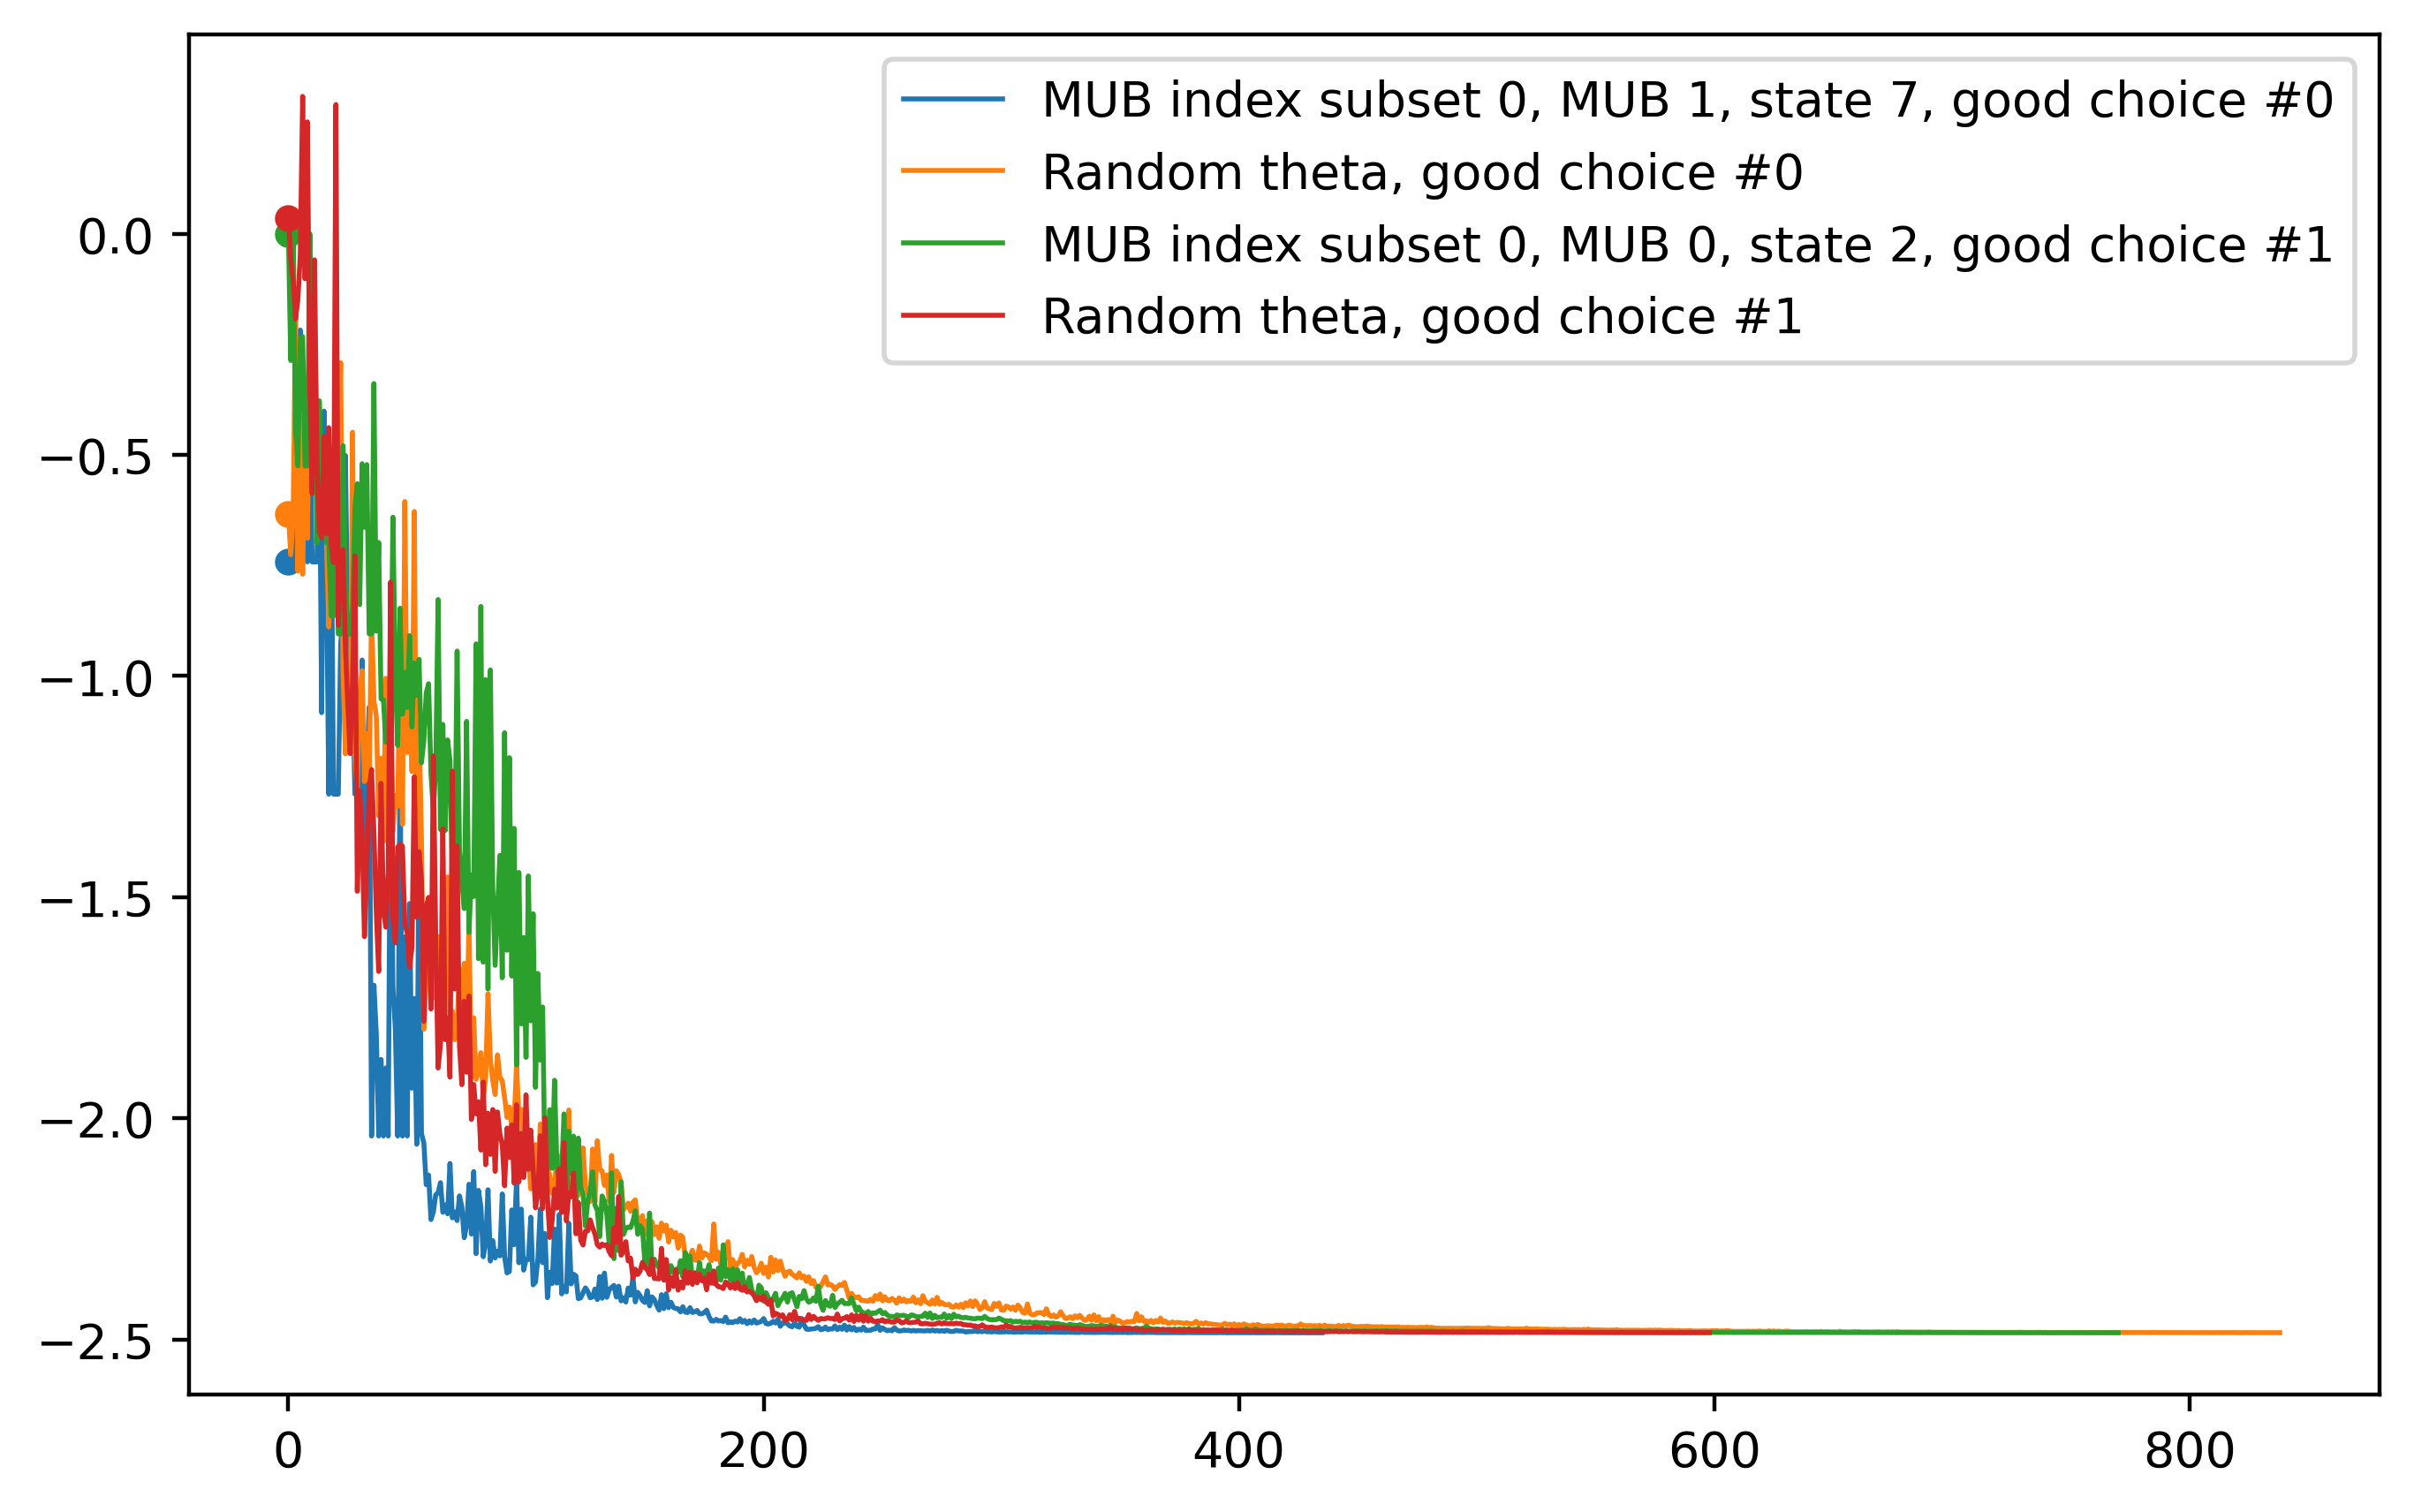

In [12]:
ham = transverse_ham_3q
landscape = transverse_landscape_3q
ansatz = ansatz_3q
best_vs_worst_runs = run_and_display_vqe_best_and_worst_shifted(landscape, ansatz, k=2)
best_vs_random_runs = run_and_display_vqe_best_vs_random_shifted(landscape, ansatz, k=2)


### 4 Qubits: Molecular Example

The operator SparsePauliOp(['IIII', 'IIIZ', 'IIZX', 'IIIX', 'IIXX', 'IIYY', 'IIZZ', 'IIXZ', 'IIXI', 'IIZI', 'IZII', 'ZXII', 'IXII', 'XXII', 'YYII', 'ZZII', 'XZII', 'XIII', 'ZIII', 'IZIZ', 'IZZX', 'IZIX', 'IZXX', 'IZYY', 'ZXIZ', 'IXIZ', 'ZXZX', 'IXZX', 'ZXIX', 'IXIX', 'ZXXX', 'IXXX', 'ZXYY', 'IXYY', 'XXIZ', 'YYIZ', 'XXZX', 'YYZX', 'XXIX', 'YYIX', 'XXXX', 'YYXX', 'XXYY', 'YYYY', 'ZZIZ', 'ZZZX', 'ZZIX', 'ZZXX', 'ZZYY', 'XZIZ', 'XIIZ', 'XZZX', 'XIZX', 'XZIX', 'XIIX', 'XZXX', 'XIXX', 'XZYY', 'XIYY', 'ZIIZ', 'ZIZX', 'ZIIX', 'ZIXX', 'ZIYY', 'IZZZ', 'IZXZ', 'IZXI', 'ZXZZ', 'IXZZ', 'ZXXZ', 'IXXZ', 'ZXXI', 'IXXI', 'XXZZ', 'YYZZ', 'XXXZ', 'YYXZ', 'XXXI', 'YYXI', 'ZZZZ', 'ZZXZ', 'ZZXI', 'XZZZ', 'XIZZ', 'XZXZ', 'XIXZ', 'XZXI', 'XIXI', 'ZIZZ', 'ZIXZ', 'ZIXI', 'IZZI', 'ZXZI', 'IXZI', 'XXZI', 'YYZI', 'ZZZI', 'XZZI', 'XIZI', 'ZIZI'],
              coeffs=[-1.99754128e-01+0.j, -9.17966069e-02+0.j, -2.73410751e-03+0.j,
  2.73410751e-03+0.j, -3.09895035e-04+0.j,  3.09895035e-04+0.j,
 -2.11959340e-01+0.j, 

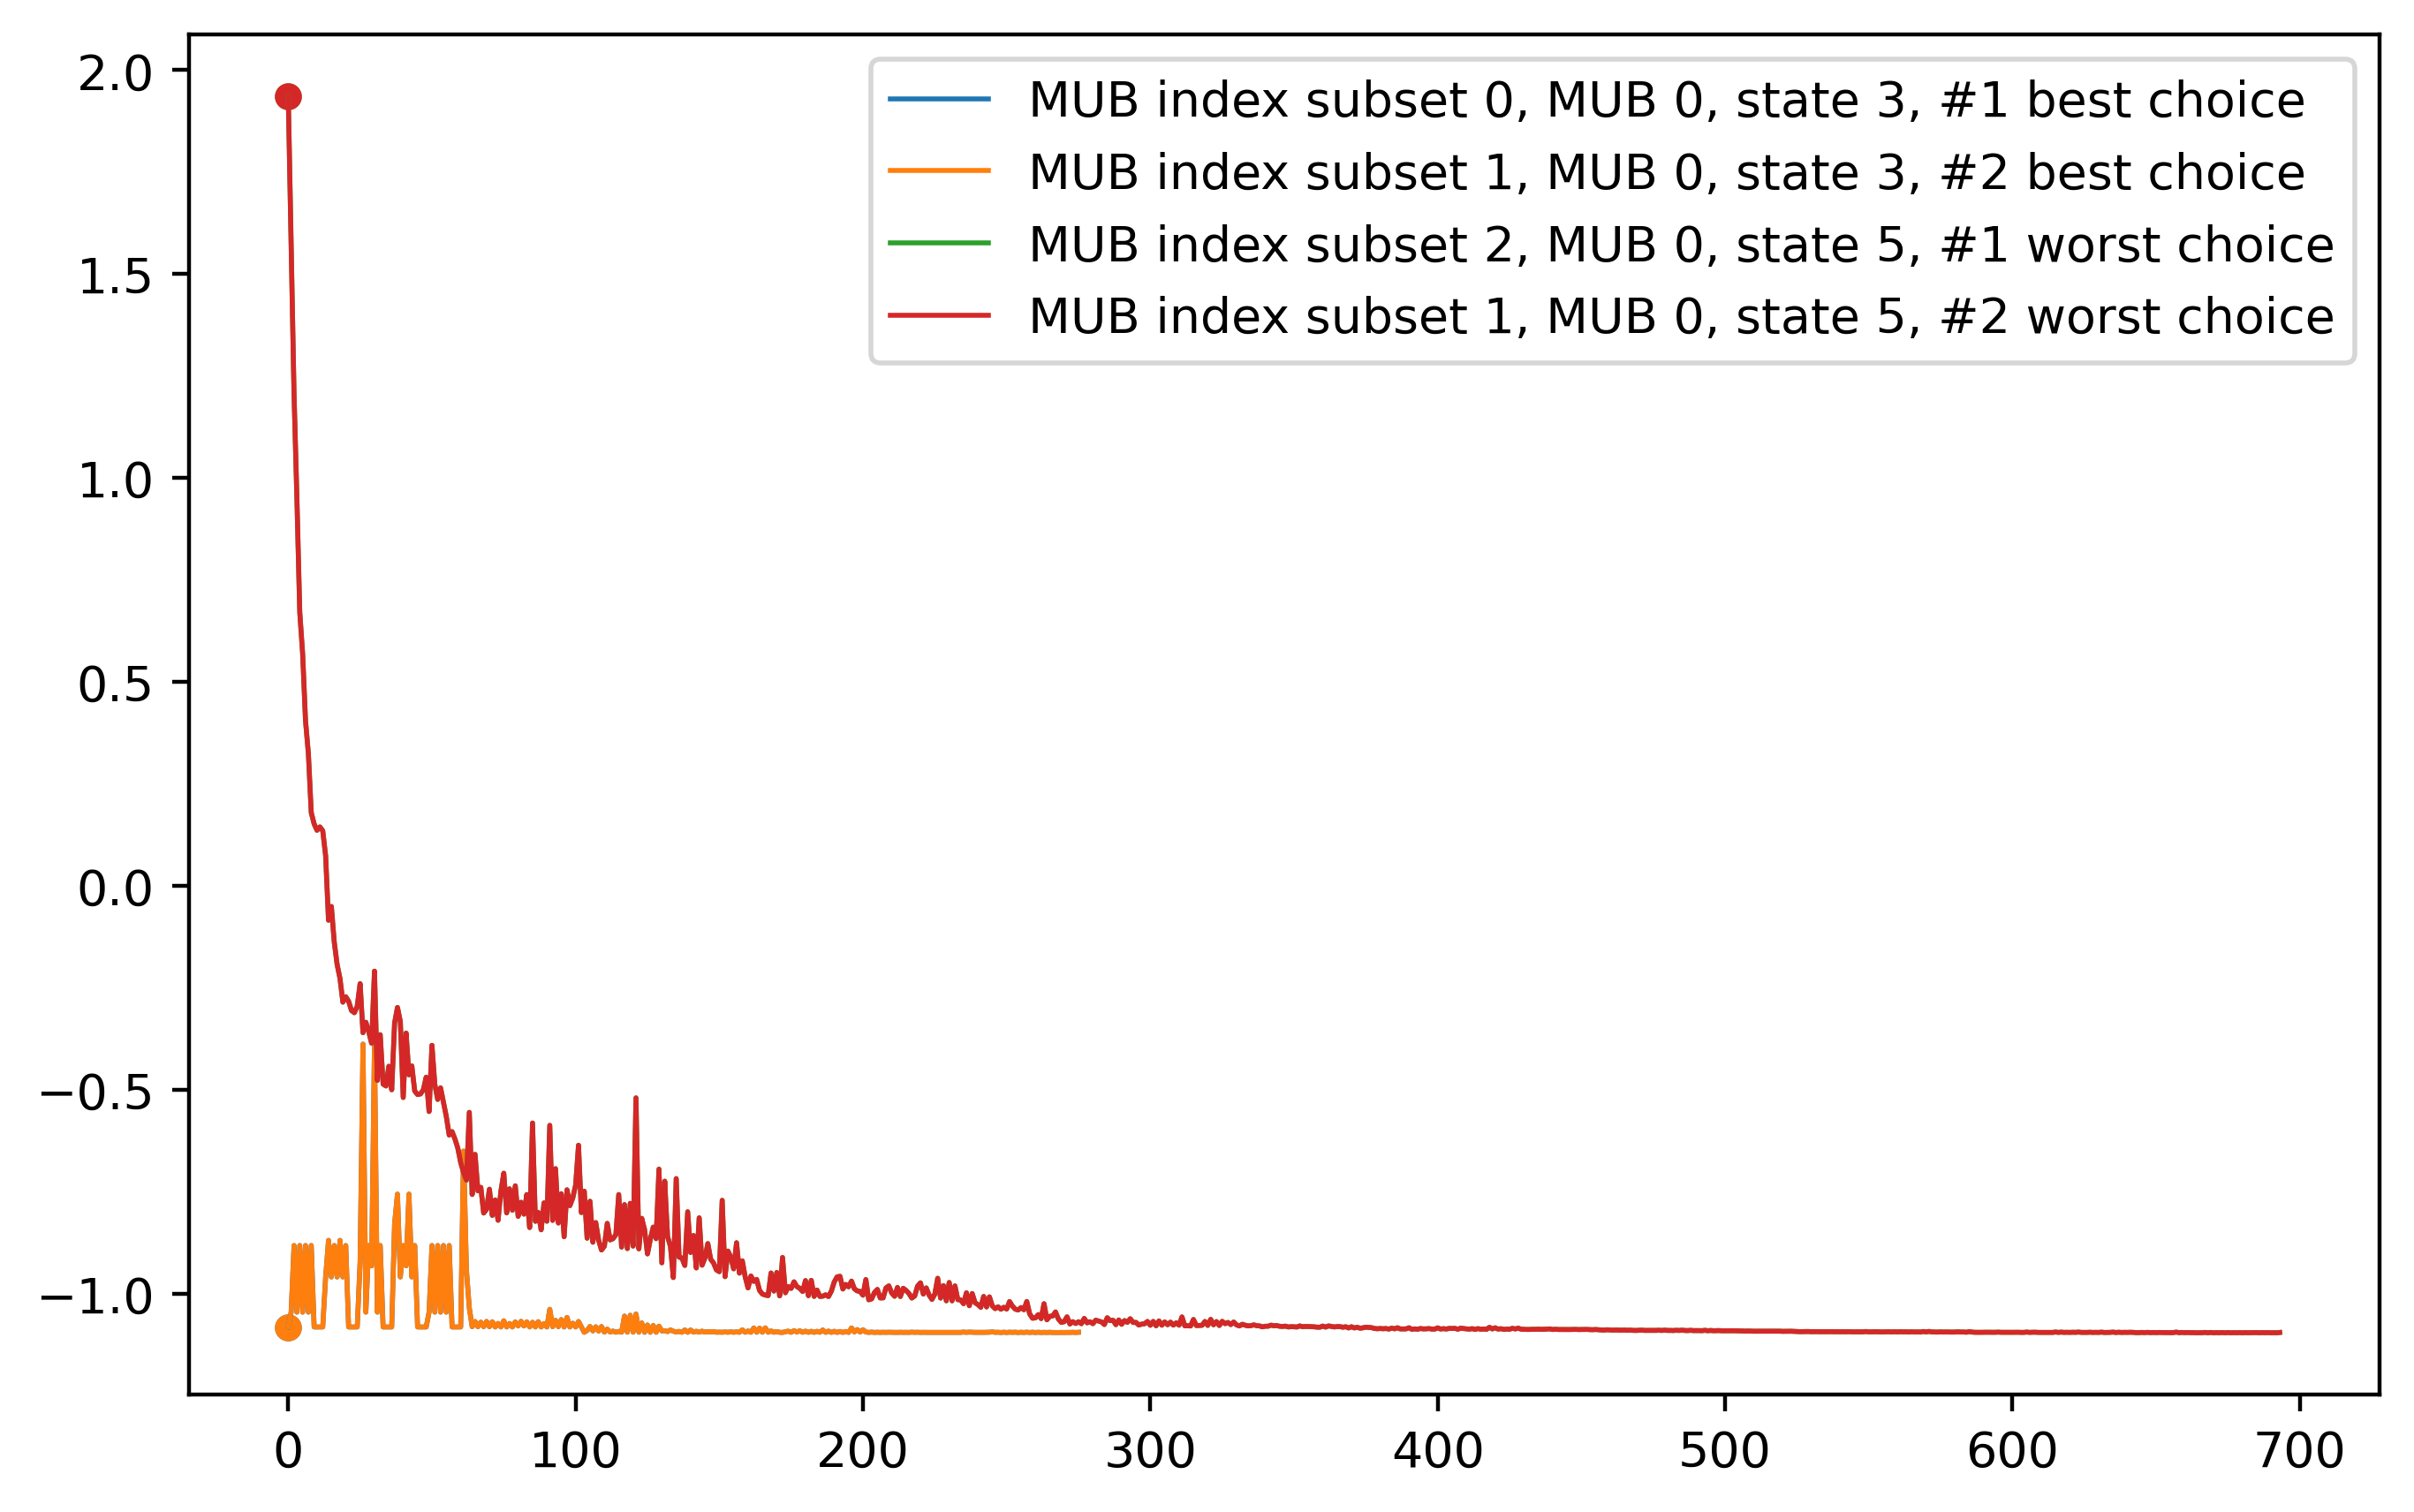

200: -1.0938375541311813
200: -1.0938375541311813
200: -0.9904880991019074
400: -1.0344498675743508
600: -1.0732246140416062
800: -1.0836025812802674
1000: -1.0905496380654123
200: -0.9490870182733314
400: -1.069736771033
600: -1.0864049452610158


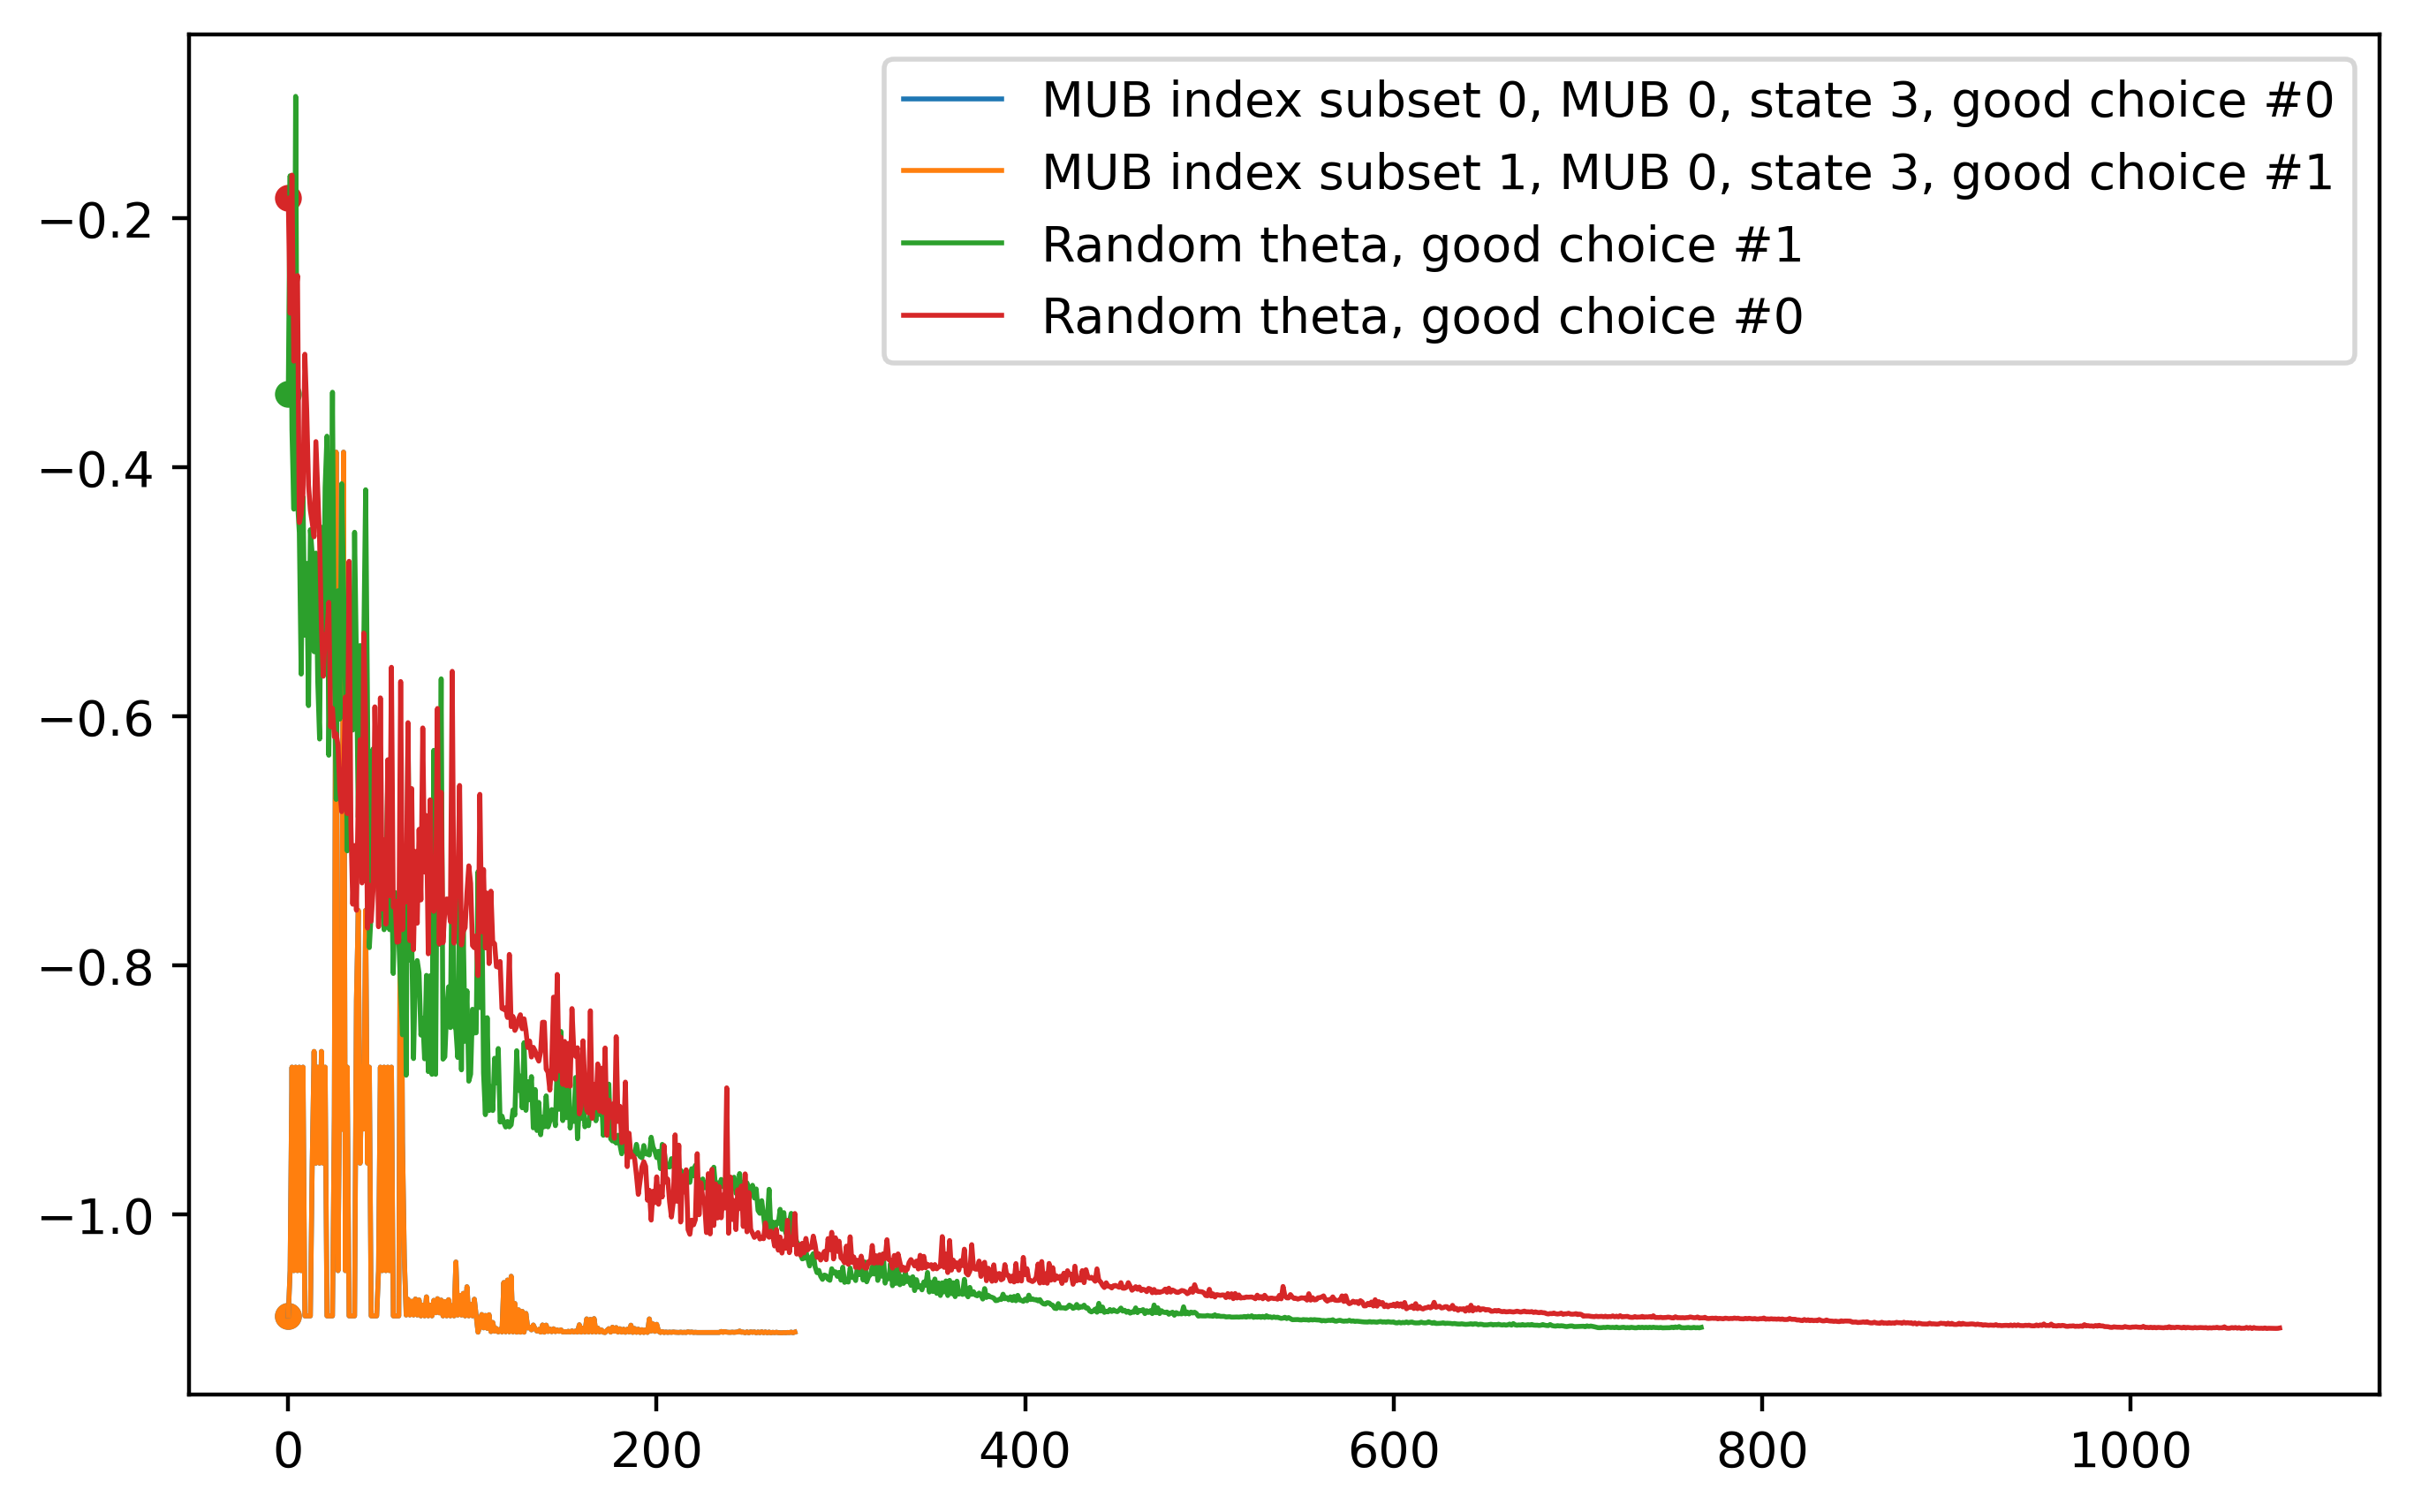

In [13]:
ham = LiH_ham_1_5
landscape = LiH_landscape_4q
ansatz = ansatz_4q
best_vs_worst_runs = run_and_display_vqe_best_and_worst_shifted(landscape, ansatz, k=2)
best_vs_random_runs = run_and_display_vqe_best_vs_random_shifted(landscape, ansatz, k=2)


### 8 Qubits: MAXCUT Example

The operator SparsePauliOp(['IIIZIIIZ', 'ZIIIIIIZ', 'IIZIIIZI', 'IIIZIZII', 'IZIIIZII', 'ZIIIZIII', 'IIIIIIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j, -3. +0.j]) has the exact value -6.0.
Now trying to reach the value from the best and worst landscape points.
200: -5.545323559445359
400: -5.903237533518059
600: -5.913406579259726
800: -5.929542377024671
1000: -5.936717705086242
1200: -5.938375060873586
1400: -5.943336816931421
1600: -5.948408190827685
1800: -5.954216973770736
2000: -5.955914128763401
2200: -5.960425650916665
2400: -5.971044564820819
2600: -5.972821879959238
2800: -5.98170180070411
3000: -5.986101818454155
3200: -5.98625446644132
3400: -5.988237900224393
3600: -5.991776920513572
3800: -5.993355751345552
4000: -5.994082067550927
200: -5.504840563125231
400: -5.826925475088995
600: -5.898829477049384
800: -5.9125078884185776
1000: -5.906686082334986
1200: -5.902490939990084
1400: -5.924775017128587
1600: -5.959025155980006
1800:

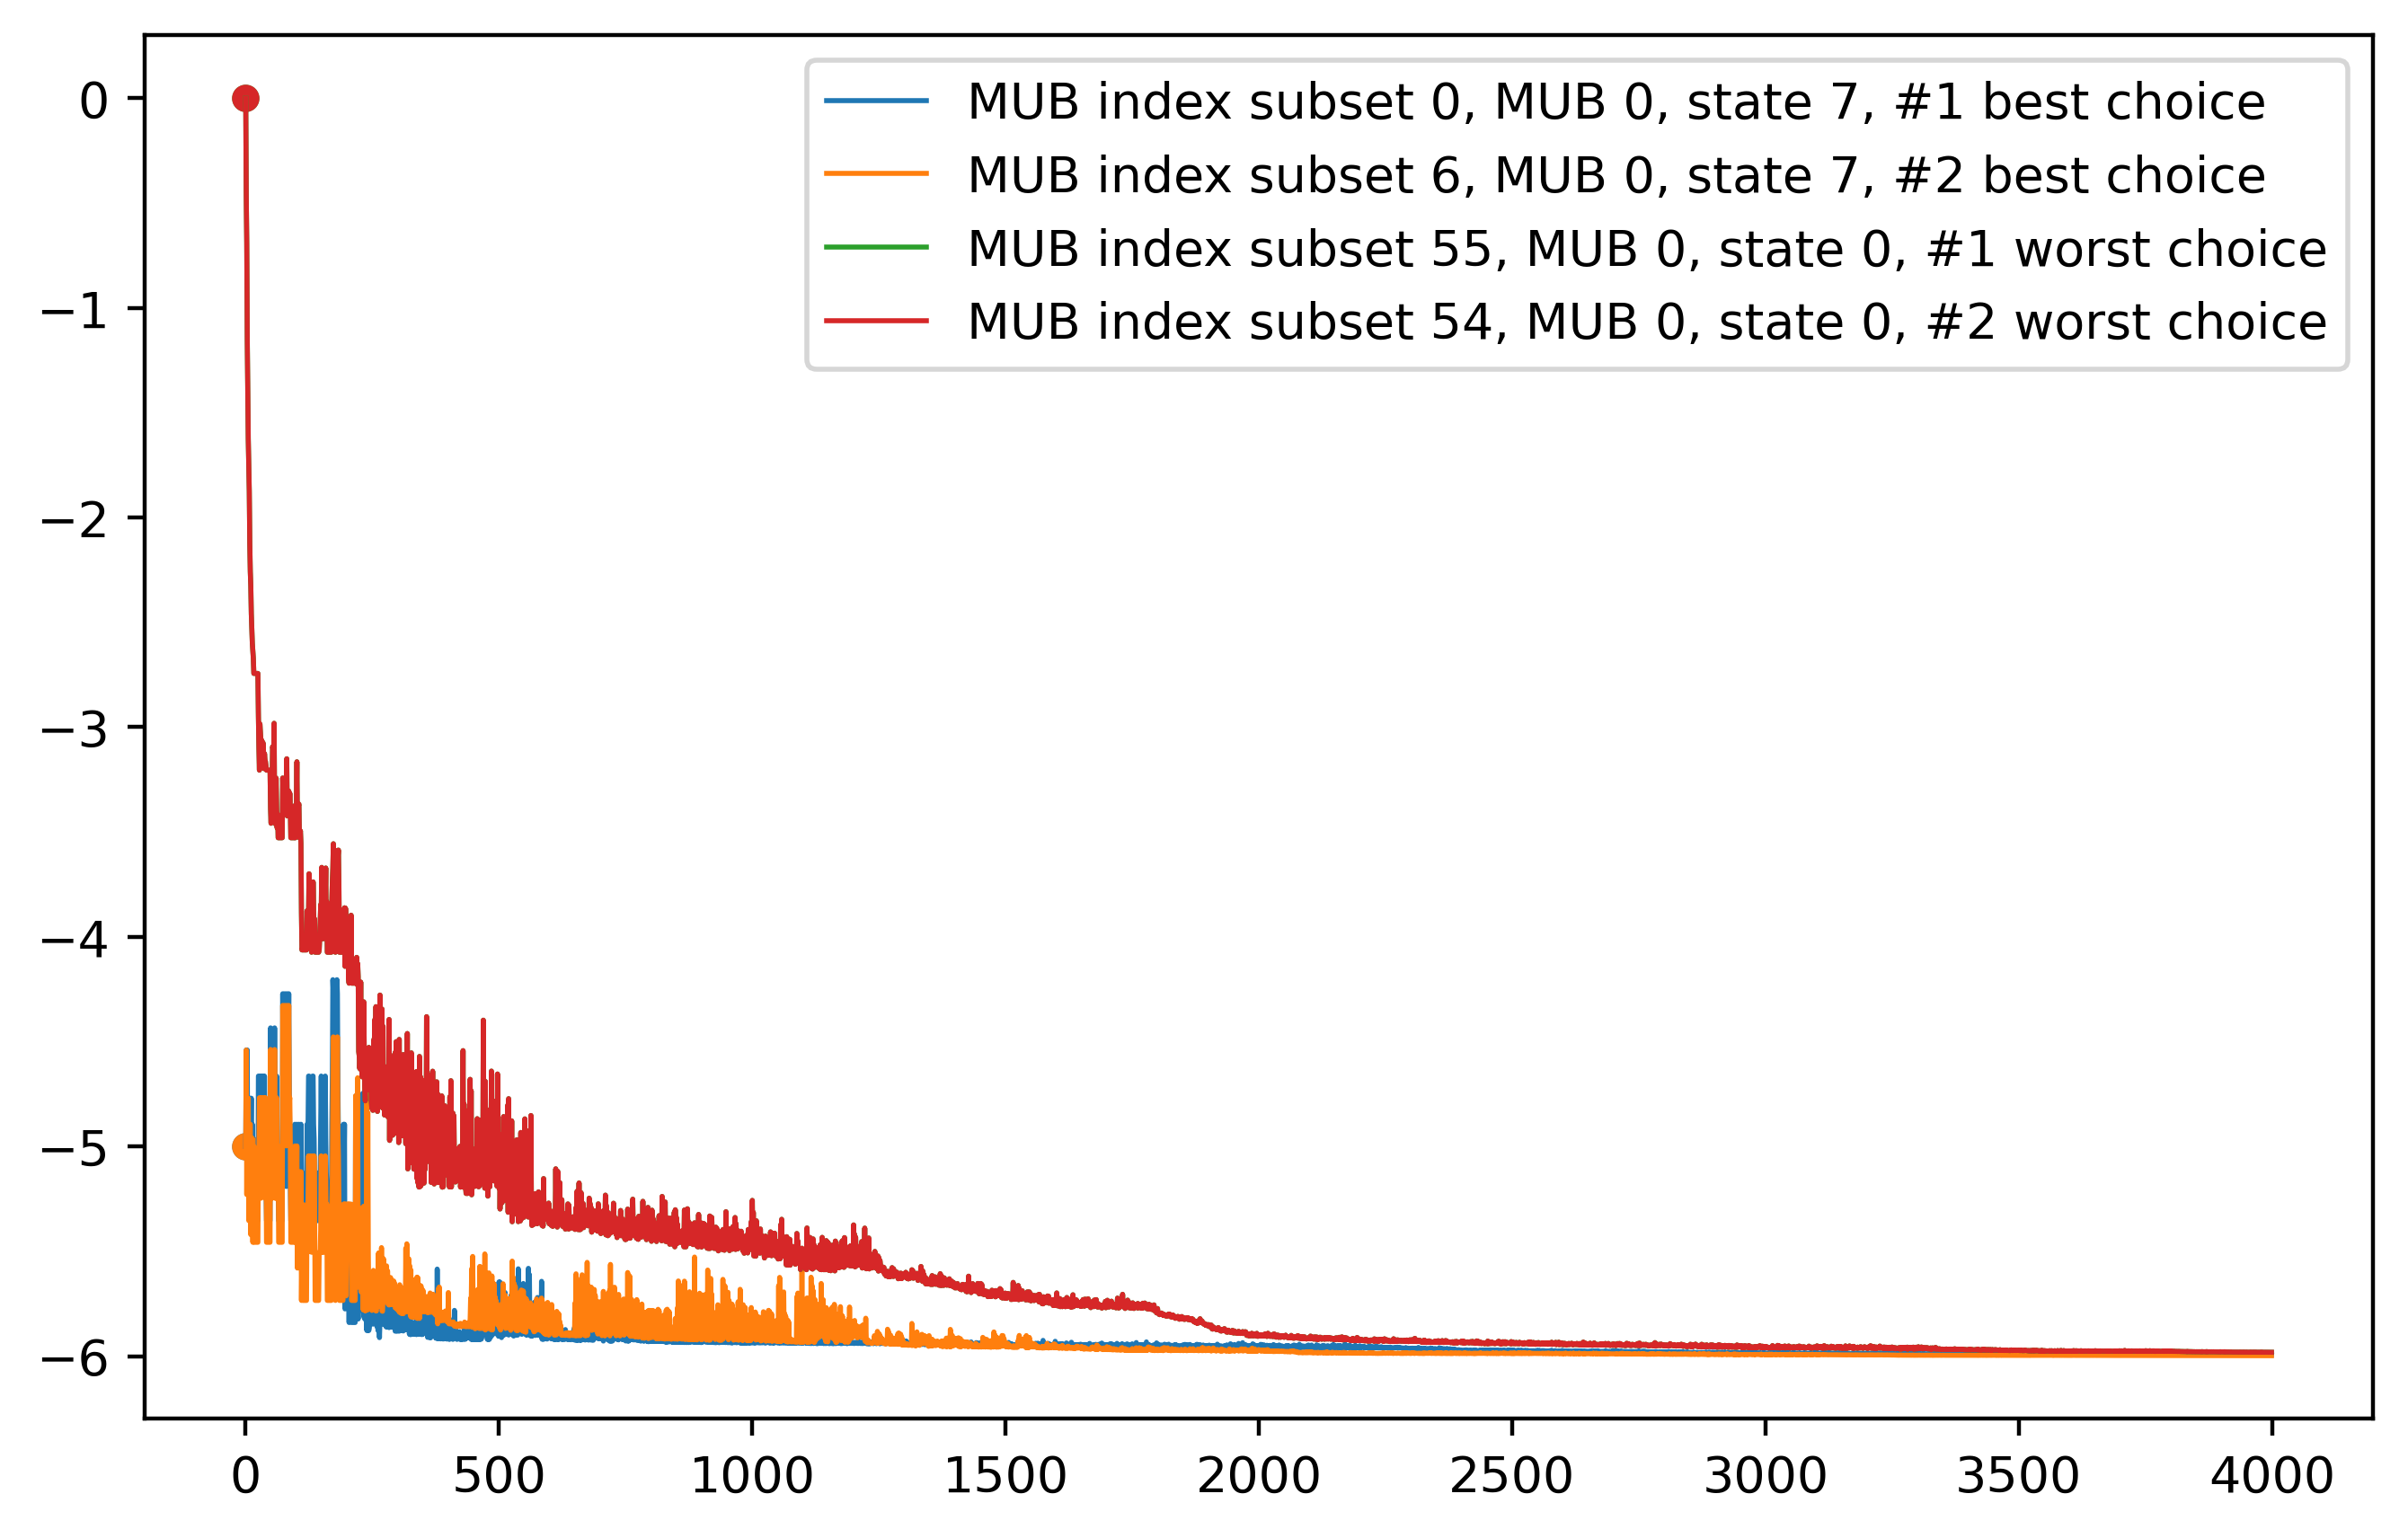

200: -5.545323559445359
400: -5.903237533518059
600: -5.913406579259726
800: -5.929542377024671
1000: -5.936717705086242
1200: -5.938375060873586
1400: -5.943336816931421
1600: -5.948408190827685
1800: -5.954216973770736
2000: -5.955914128763401
2200: -5.960425650916665
2400: -5.971044564820819
2600: -5.972821879959238
2800: -5.98170180070411
3000: -5.986101818454155
3200: -5.98625446644132
3400: -5.988237900224393
3600: -5.991776920513572
3800: -5.993355751345552
4000: -5.994082067550927
200: -5.504840563125231
400: -5.826925475088995
600: -5.898829477049384
800: -5.9125078884185776
1000: -5.906686082334986
1200: -5.902490939990084
1400: -5.924775017128587
1600: -5.959025155980006
1800: -5.971296412893899
2000: -5.97277856352472
2200: -5.984360511871428
2400: -5.986769115487647
2600: -5.987918067003953
2800: -5.989978543199499
3000: -5.991871991866674
3200: -5.994710977283436
3400: -5.99627607883662
3600: -5.996717033828457
3800: -5.997635993962665
4000: -5.998190202659722
200: -3.464

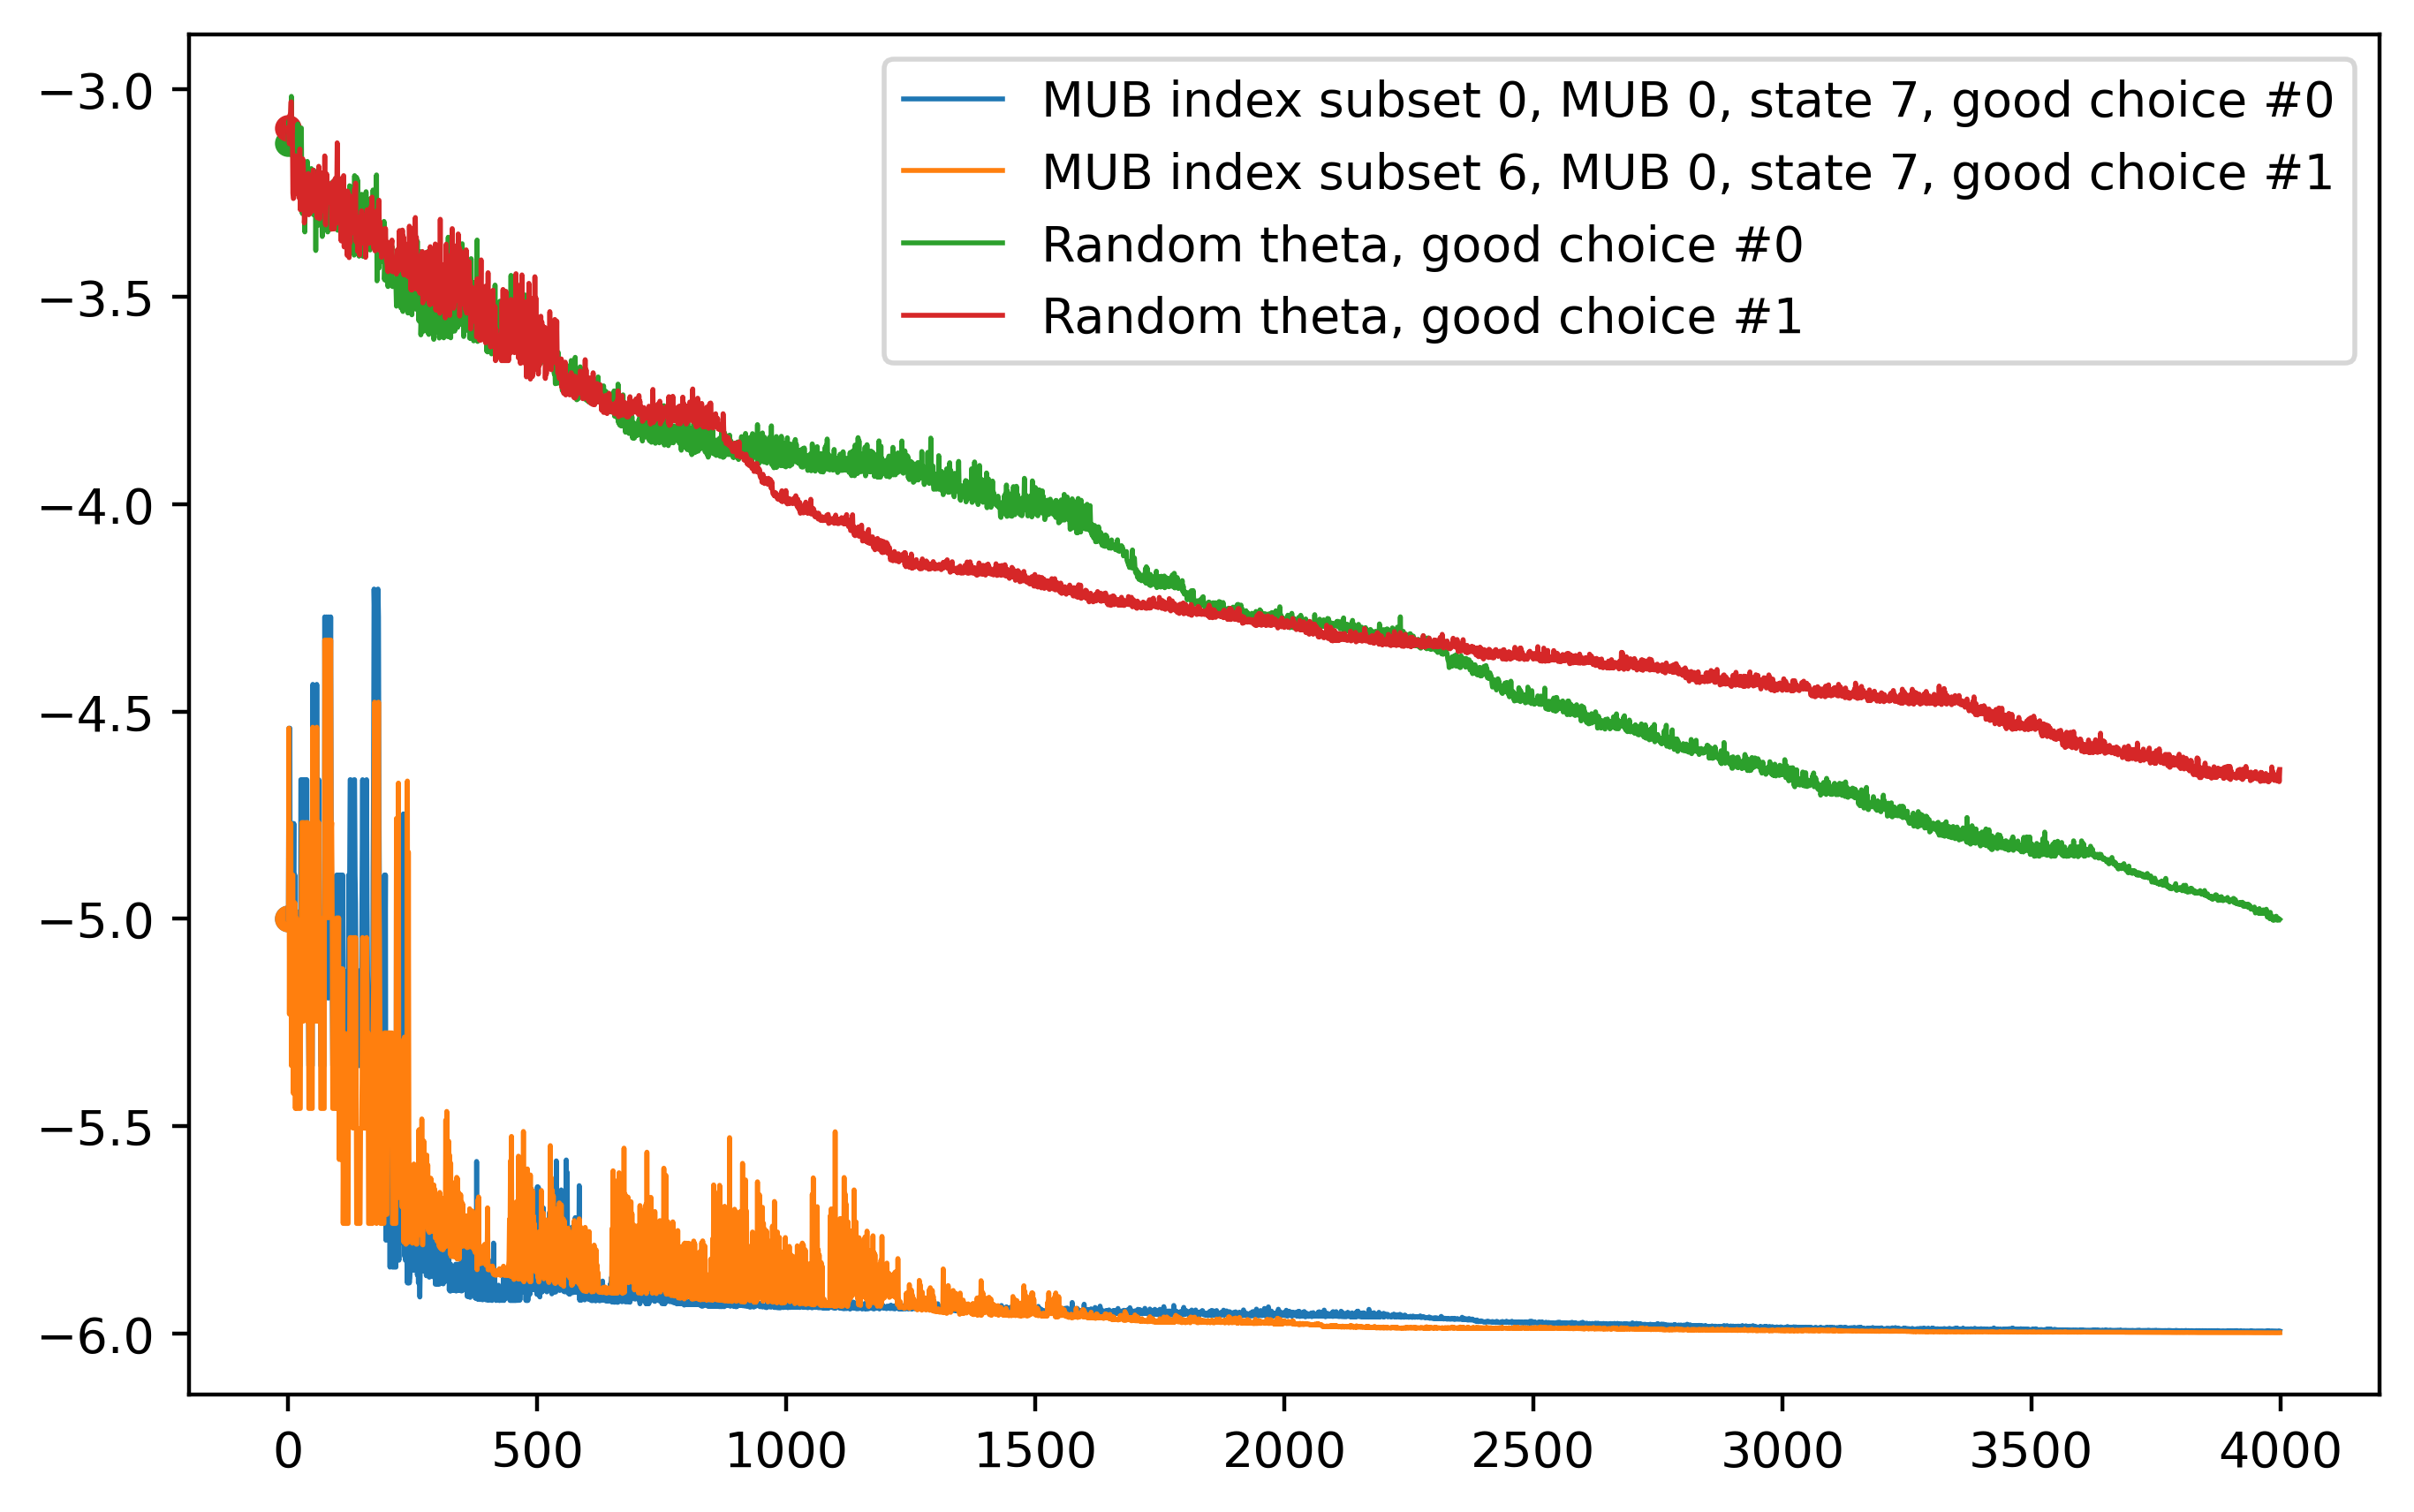

In [14]:
ham = maxcut_ham_8q
landscape = maxcut_landscape_8q
ansatz = ansatz_8q
best_vs_worst_runs = run_and_display_vqe_best_and_worst_shifted(landscape, ansatz, k=2)
best_vs_random_runs = run_and_display_vqe_best_vs_random_shifted(landscape, ansatz, k=2)
